In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code goes here

In [2]:
import numpy as np
import os
# import pyedflib
import argparse
import statistics
import numpy as np
import scipy.signal 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
import scipy.interpolate
import pandas as pd
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import copy
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random 
from torch.optim.lr_scheduler import MultiStepLR



file_nn = np.load("file_nn.npy")
label_nn = np.load("label_nn.npy")
    
    
    
# Define the transform to be applied to each image #######################################
def transform_array_image(Images_, lbl):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0 ,0, 0], std=[1, 1, 1])
    ])
    Images__ = []
    lbls = []
    for idx, img in enumerate(Images_):
        img = (img * 1).astype(np.uint8)
#         print(img.shape)  
        img = transforms.ToPILImage()(img)
        img = transform(img)
        Images__.append(img)

        # Assign a random label to the image
    #     label = np.random.randint(num_classes, )
        lbls.append(lbl[idx])
        
    return Images__, lbls

############################################################################

import random
import numpy as np
from PIL import Image

def random_translate(img, translation_range, seed):
    random.seed(seed)
    # Define the maximum translation in pixels
    max_translate_x, max_translate_y = translation_range

    # Generate random translation values
    translate_x = random.randint(-max_translate_x, max_translate_x)
    translate_y = random.randint(-max_translate_y, max_translate_y)

    # Apply translation
    img = img.transform(
        img.size, 
        Image.AFFINE, 
        (1, 0, translate_x, 0, 1, translate_y)
    )
    return img

def add_small_noise(img, noise_level, seed):
#     np.random.seed(seed)
#     noise = np.random.normal(0, noise_level, img.shape).astype(np.uint8)
#     noisy_img = np.clip(img + noise, 0, 255)
    noisy_img = img  
    return noisy_img

def transform_array_image(Images_, lbl, translation_range=(10, 10), noise_level=5, seed=None):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0 ,0, 0], std=[1, 1, 1])
    ])
    
    Images__ = []
    lbls = []
    for idx, img in enumerate(Images_):
        img = (img * 1).astype(np.uint8)
        img = transforms.ToPILImage()(img)
        
        # Randomly translate the image
#         img = random_translate(img, translation_range, seed)
        
        # Add small noise to the image
#         img = add_small_noise(np.array(img), noise_level, seed)
        
        img = transform(img)
        Images__.append(img)
        lbls.append(lbl[idx])
        
    return Images__, lbls


In [3]:
def Custom_ROC(y_prob, y_test):
    from sklearn.metrics import confusion_matrix
    import numpy as np
    scores = y_prob
    from sklearn .metrics import roc_curve, auc, roc_auc_score
    # Decrease the threshold step size to 0.001
    step_size = .1
    new_thresholds = np.arange(0, 1 + step_size, step_size)

    # Compute the ROC curve with the new thresholds
    new_fpr = []
    new_tpr = []
    Sensitivity = []
    Specificity  = []
   
    for threshold in new_thresholds:
        y_pred = (scores >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        new_fpr.append(fp / (fp + tn))
        new_tpr.append(tp / (tp + fn))
        Sensitivity.append(tp / (tp + fn))
        Specificity.append(tn / (tn + fp))
       
#     print("Sensitivity", max(Sensitivity), np.mean(Sensitivity))
#     print("Specificity", max(Specificity), np.mean(Specificity))
    # Plot the ROC curve with the new thresholds
   
#     auc = roc_auc_score(y_test, y_prob)
   
#     print("AUC: ", auc)
#     # Example usage
#     best_threshold, sensitivity, specificity = find_best_threshold(y_prob, y_test)
#     print("Best Threshold:", best_threshold)
#     print("Sensitivity:", sensitivity)
#     print("Specificity:", specificity)
#     plt.plot(new_fpr, new_tpr)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.show()
   
   
def find_best_threshold(y_prob, y_test):
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = None
    best_sensitivity = 0
    best_specificity = 0
   
    for threshold in thresholds:
        sensitivity, specificity = calculate_sensitivity_specificity(y_prob, y_test, threshold)
       
        if sensitivity + specificity > best_sensitivity + best_specificity:
            best_sensitivity = sensitivity
            best_specificity = specificity
            best_threshold = threshold
   
    return best_threshold, best_sensitivity, best_specificity

def calculate_sensitivity_specificity(y_prob, y_test, threshold):
    from sklearn.metrics import confusion_matrix
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

In [4]:
##################################################################################
def Confusion_pic(actual, y_pred_test, y_probs):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc,roc_auc_score

    # cf1 = confusion_matrix(y_train, y_pred_train)
    
    cf1 = confusion_matrix(actual, y_pred_test)
    import seaborn as sns

#     ax = sns.heatmap(cf1, annot=True, cmap='Blues')

#     ax.set_title('Seaborn Confusion Matrix with labels\n\n');
#     ax.set_xlabel('\nPredicted Values')
#     ax.set_ylabel('Actual Values ');

#     ## Ticket labels - List must be in alphabetical order
#     ax.xaxis.set_ticklabels(['False','True'])
#     ax.yaxis.set_ticklabels(['False','True'])

#     ## Display the visualization of the Confusion Matrix.
#     plt.show()
#     print("len(y_probs), len(actual)", len(y_probs), len(actual))
    new_fpr, new_tpr, auc, best_threshold, sensitivity, specificity = Custom_ROC(y_probs, actual)
    
    return new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity


In [5]:
def Custom_ROC(y_prob, y_test):
    from sklearn.metrics import confusion_matrix
    import numpy as np
    scores = y_prob
    from sklearn .metrics import roc_curve, auc, roc_auc_score
    # Decrease the threshold step size to 0.001
    step_size = .1
    new_thresholds = np.arange(0, 1 + step_size, step_size)

    # Compute the ROC curve with the new thresholds
    new_fpr = []
    new_tpr = []
    Sensitivity = []
    Specificity  = []
   
    for threshold in new_thresholds:
        y_pred = (scores >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        new_fpr.append(fp / (fp + tn))
        new_tpr.append(tp / (tp + fn))
        Sensitivity.append(tp / (tp + fn))
        Specificity.append(tn / (tn + fp))

    auc = roc_auc_score(y_test, y_prob)
   
#     print("AUC: ", auc)
    # Example usage
    best_threshold, sensitivity, specificity = find_best_threshold(y_prob, y_test)
#     print("Best Threshold:", best_threshold)
#     print("Sensitivity:", sensitivity)
#     print("Specificity:", specificity)
#     plt.plot(new_fpr, new_tpr)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.show()
   
    return new_fpr, new_tpr, auc, best_threshold, sensitivity, specificity
   
def find_best_threshold(y_prob, y_test):
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = None
    best_sensitivity = 0
    best_specificity = 0
   
    for threshold in thresholds:
        sensitivity, specificity = calculate_sensitivity_specificity(y_prob, y_test, threshold)
       
        if sensitivity + specificity > best_sensitivity + best_specificity:
            best_sensitivity = sensitivity
            best_specificity = specificity
            best_threshold = threshold
   
    return best_threshold, best_sensitivity, best_specificity

def calculate_sensitivity_specificity(y_prob, y_test, threshold):
    from sklearn.metrics import confusion_matrix
    y_pred = (y_prob >= threshold).astype(int)
#     print("len(y_test), len(y_pred)", len(y_test), len(y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

In [6]:
def Considered_AHI_restriction(AHI):
    import pandas as pd

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('shhs1- 2.csv')

    # Filter the rows where the "ahi_a0h3a.csv" column is greater than or equal to 5
    # and the "htnderv_s1" column is 1
   
    
#     AHI_base = AHI
    AHI_base = AHI
    filtered_df = df[(df["ahi_a0h3a"] >= AHI_base) & (df["htnderv_s1"] == 0) & (df["htnderv_s2"].notnull())]
    
#     filtered_df = df[((df["ahi_a0h3a"] < LOW_AHI) | (df["ahi_a0h3a"] > High_AHI)) & (df["htnderv_s1"] == 0) & (df["htnderv_s2"].notnull())]
    selected_basedonAHI = [str(x[0]) for x in filtered_df[["nsrrid"]].values]
    AHI_considered = []
    for patient in file_nn:
        if patient[6:-7] in selected_basedonAHI:
            AHI_considered.append(1)
        else:
            AHI_considered.append(0)

    AHI_considered = np.array(AHI_considered)
#     print("percentage of accepted data", sum(AHI_considered)/len(AHI_considered))
    Consider = [np.array(AHI_considered)==1][0]

    return(Consider)

In [7]:
def Considered_AHI_restriction_2(LOW_AHI, High_AHI):
    import pandas as pd


    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('shhs1- 2.csv')

    # Filter the rows where the "ahi_a0h3a.csv" column is greater than or equal to 5
    # and the "htnderv_s1" column is 1
   
    
#     AHI_base = AHI
    AHI_base = LOW_AHI
#     filtered_df = df[(df["ahi_a0h3a"] >= AHI_base) & (df["htnderv_s1"] == 0) & (df["htnderv_s2"].notnull())]
    
    filtered_df = df[((df["ahi_a0h3a"] < LOW_AHI) | (df["ahi_a0h3a"] > High_AHI)) & (df["htnderv_s1"] == 0) & (df["htnderv_s2"].notnull())]
    selected_basedonAHI = [str(x[0]) for x in filtered_df[["nsrrid"]].values]
    AHI_considered = []
    for patient in file_nn:
        if patient[6:-7] in selected_basedonAHI:
            AHI_considered.append(1)
        else:
            AHI_considered.append(0)

    AHI_considered = np.array(AHI_considered)
#     print("percentage of accepted data", sum(AHI_considered)/len(AHI_considered))
    Consider = [np.array(AHI_considered)==1][0]

    return(Consider)

In [8]:
def convert_to_numy(loss_list_train):
    loss_values = [t.item() for t in loss_list_train]
    return loss_values

In [9]:
def rocandconfusio_plot(fpr,tpr,cf, location):
    import seaborn as sns
    if cf == []:
        
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.savefig(location+"roc.png")
        plt.show()
        

    elif fpr == [] and tpr == []:
        total = sum(sum(row) for row in cf)
        percentages = [[f"{(val/total)*100:.1f}%" for val in row] for row in cf]

        # Create the heatmap with percentage annotations
        sns.heatmap(cf, annot=percentages, fmt='', cmap='Blues')

#         # Add labels and title
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.title('Confusion Matrix')

        # Modify tick labels to display "False" and "True"
        tick_labels = ['HTN-', 'HTN+']
        plt.gca().set_xticklabels(tick_labels)
        plt.gca().set_yticklabels(tick_labels)

        # Add '%' to the plot
        plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)
        plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)
        plt.gca().yaxis.tick_left()
        plt.gca().xaxis.tick_bottom()
        plt.savefig(location+"cf.png")
        plt.show()
        #########################################
        # Calculate the percentages


        #########################################

    else:
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.savefig(location+"best_roc.png")
        plt.show()
        
        total = sum(sum(row) for row in cf)
        percentages = [[f"{(val/total)*100:.1f}%" for val in row] for row in cf]

        # Create the heatmap with percentage annotations
        sns.heatmap(cf, annot=percentages, fmt='', cmap='Blues')

#         # Add labels and title
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.title('Confusion Matrix')

        # Modify tick labels to display "False" and "True"
        tick_labels = ['HTN-', 'HTN+']
        plt.gca().set_xticklabels(tick_labels)
        plt.gca().set_yticklabels(tick_labels)

        # Add '%' to the plot
        plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)
        plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)
        plt.gca().yaxis.tick_left()
        plt.gca().xaxis.tick_bottom()
        plt.savefig(location+"best_cf.png")
        plt.show()

In [10]:
def ress_averaging(ress, location):
    names = ["new_fpr", "new_tpr", "cf1","accuracy",  "auc", "best_threshold", "sensitivity", "specificity"]
    dic_ress = {}
    dic_ress_final = {}
    for num in range(len(names)):
        # seperation and put in different part in dictionary 
        dic_ress[names[num]] = [i[num] for i in ress]
        # averaging
        if names[num] in ["accuracy" , "auc" , "best_threshold", "sensitivity", "specificity"]:
            dic_ress_final[names[num]] = np.mean(dic_ress[names[num]])
            if names[num] != "best_threshold":
                print("average", names[num], ":", round(dic_ress_final[names[num]],2))
        if names[num] in ["new_fpr" , "new_tpr"]:
            dic_ress_final[names[num]] = [sum(items) / len(items) for items in zip(*dic_ress[names[num]])]
            if 'new_fpr' in dic_ress_final.keys() and 'new_tpr' in dic_ress_final.keys():
                rocandconfusio_plot(dic_ress_final["new_fpr"], dic_ress_final["new_tpr"],[], location)
        if names[num] in ["cf1"]:
            import seaborn as sns
            dic_ress_final[names[num]] = [[sum(items)/len(items) for items in zip(*sublist)] for sublist in zip(*dic_ress[names[num]])]
            rocandconfusio_plot([],[],dic_ress_final[names[num]], location)
            
    # the best res plot:
    print("------------------------------")
    print("THE BEST IN ENTIRE FOLDS: ")
    
    thebest_index = np.argmax(dic_ress["accuracy"])
    rocandconfusio_plot(dic_ress["new_fpr"][thebest_index],dic_ress["new_tpr"][thebest_index],dic_ress["cf1"][thebest_index], location)
    print("The best Acc", round(dic_ress["accuracy"][thebest_index],2),
          "The best AUC", round(dic_ress["auc"][thebest_index],2),
         "The best sensitivity", round(dic_ress["sensitivity"][thebest_index],2),
         "The best specificity", round(dic_ress["specificity"][thebest_index],2))
    return dic_ress_final, round(dic_ress["accuracy"][thebest_index],2), round(dic_ress["auc"][thebest_index],2),round(dic_ress["sensitivity"][thebest_index],2),round(dic_ress["specificity"][thebest_index],2)

In [11]:
def model_load(train):
    model = models.efficientnet_b0(pretrained=True)
    model.classifier[-1] = nn.Sequential(nn.Linear(1280, 1), nn.Sigmoid())

    for param in model.parameters():
        if train == 0:
            param.requires_grad = False
        if train == 1:
            param.requires_grad = True
    for param in model.classifier[-30:].parameters():
        param.requires_grad = True

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model

In [15]:
model = model_load(0)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
a = torch.randn(16,3,1,1).to(device)
print(a.shape)
model(a).shape

torch.Size([16, 3, 1, 1])


torch.Size([16, 1])

In [12]:
def criterian_optimizer(lr, milestones, gamma, optimzer):
    
    criterion = nn.BCELoss()
    if optimzer == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0001)
    if optimzer == "adamW":
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.0001)
    if optimzer == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001)

    scheduler = MultiStepLR(optimizer, milestones, gamma)

    return criterion, optimizer, scheduler

In [13]:
A = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")

In [14]:
np.delete(A, np.s_[:2],axis=1).shape

(1741, 76, 54, 3)

# Trained _ adam _ 10 min

tuning auc based

seed 16

0 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


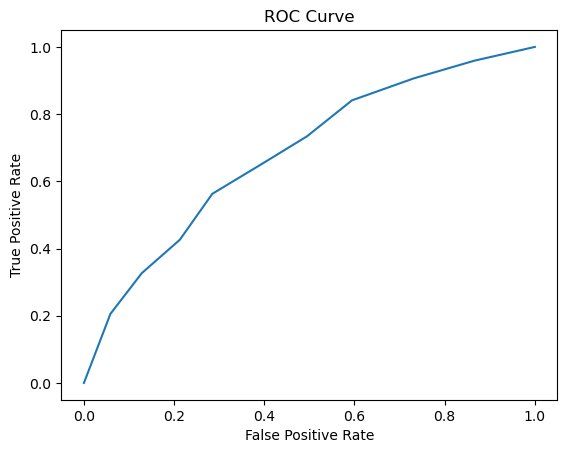

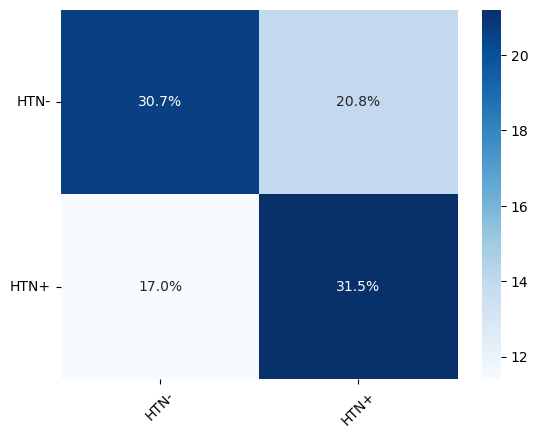

average accuracy : 0.62
average auc : 0.7
average sensitivity : 0.64
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


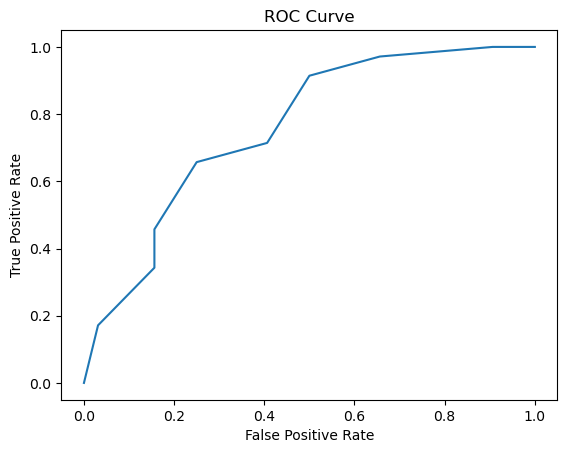

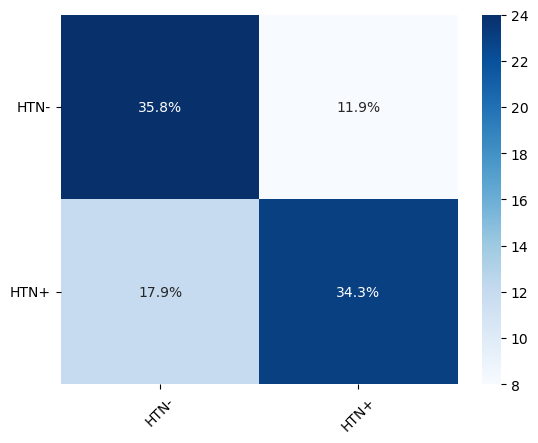

The best Acc 0.7 The best AUC 0.78 The best sensitivity 0.63 The best specificity 0.81
SEED 0 best_accc 0.7 best_aucc 0.78
FOLD enede
1 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


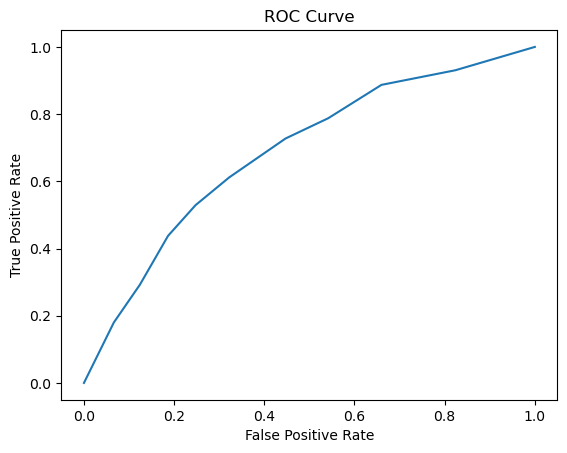

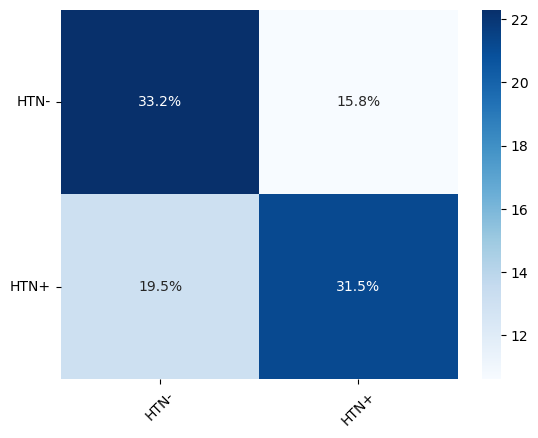

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.69
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


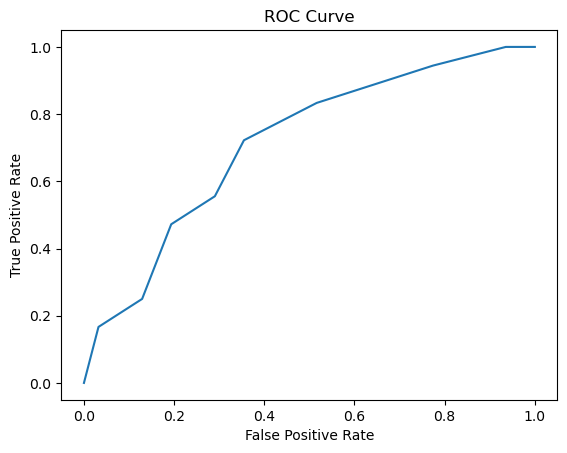

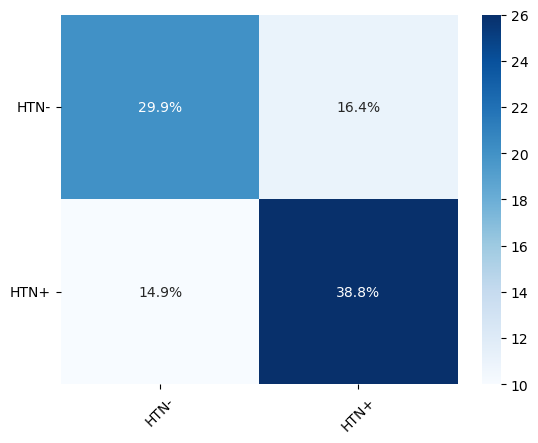

The best Acc 0.69 The best AUC 0.73 The best sensitivity 0.72 The best specificity 0.71
SEED 1 best_accc 0.69 best_aucc 0.73
FOLD enede
2 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


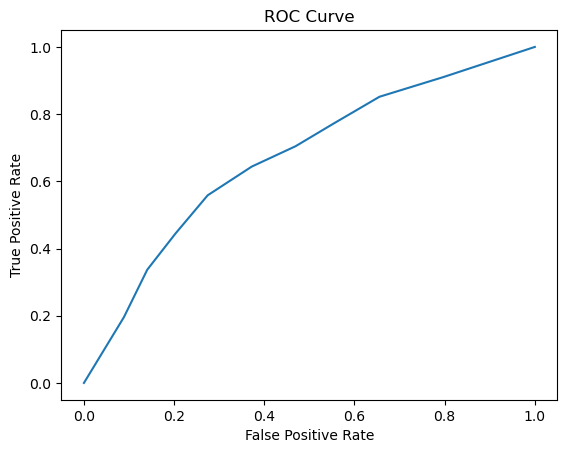

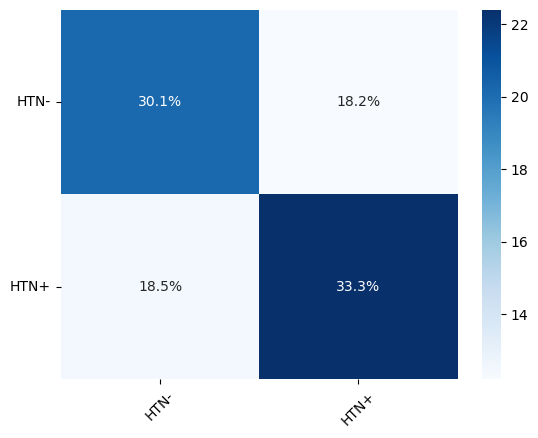

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.66
average specificity : 0.73
------------------------------
THE BEST IN ENTIRE FOLDS: 


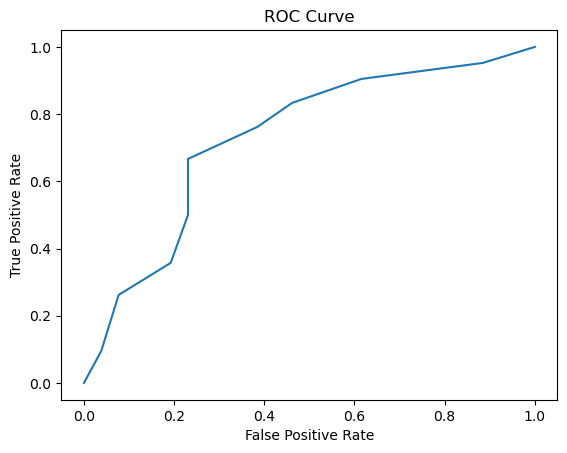

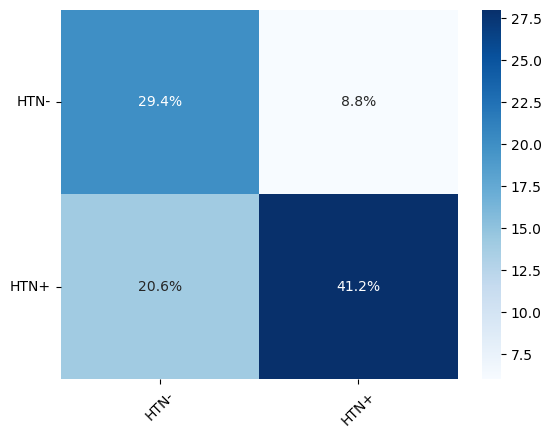

The best Acc 0.71 The best AUC 0.74 The best sensitivity 0.76 The best specificity 0.73
SEED 2 best_accc 0.71 best_aucc 0.74
FOLD enede
3 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


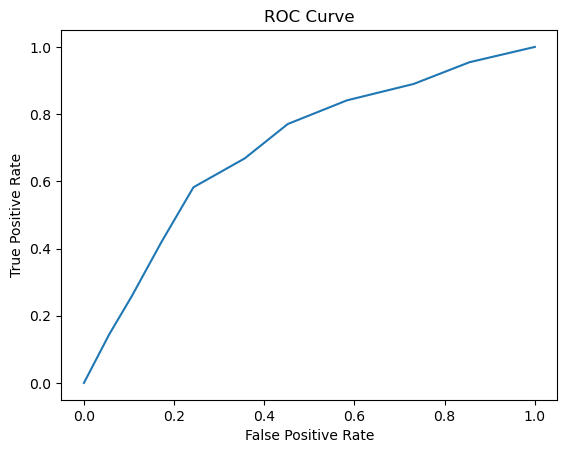

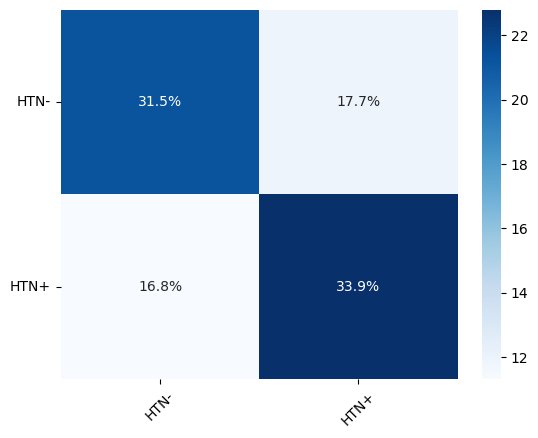

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.66
average specificity : 0.75
------------------------------
THE BEST IN ENTIRE FOLDS: 


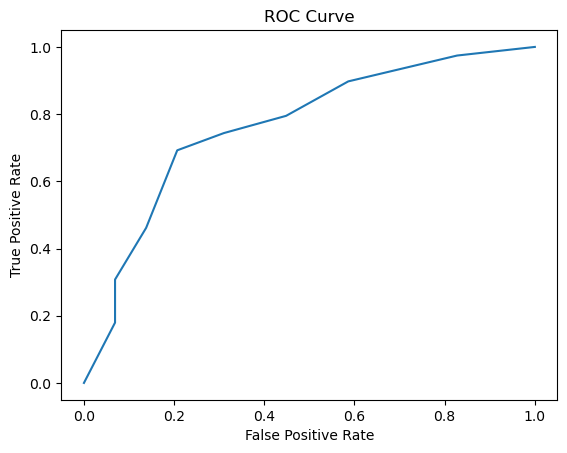

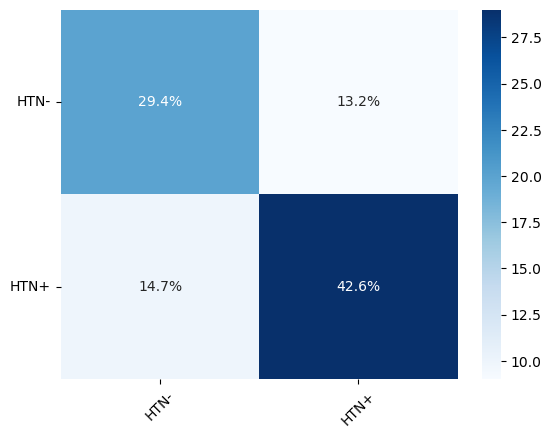

The best Acc 0.72 The best AUC 0.76 The best sensitivity 0.74 The best specificity 0.79
SEED 3 best_accc 0.72 best_aucc 0.76
FOLD enede
4 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


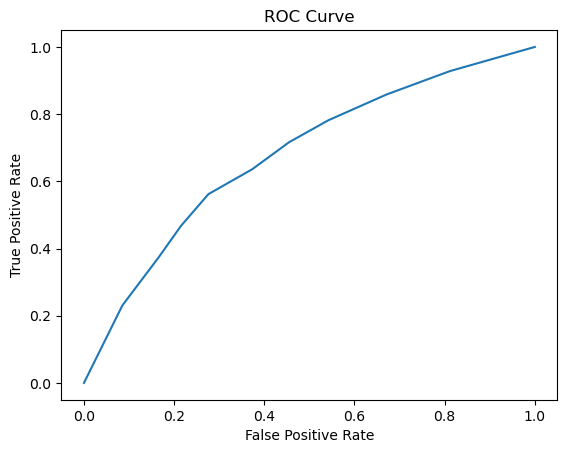

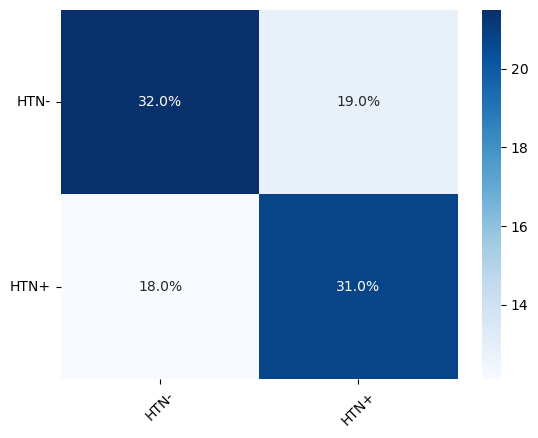

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.68
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


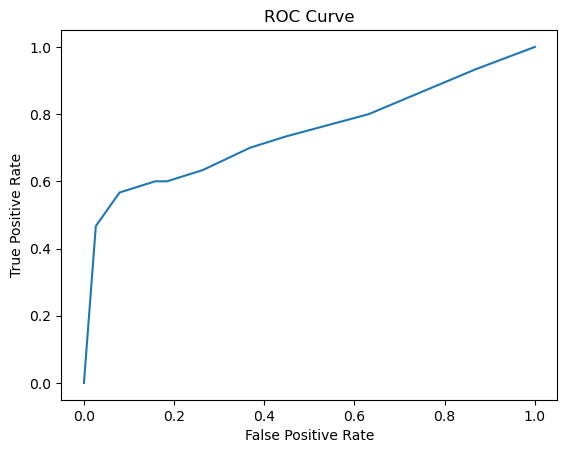

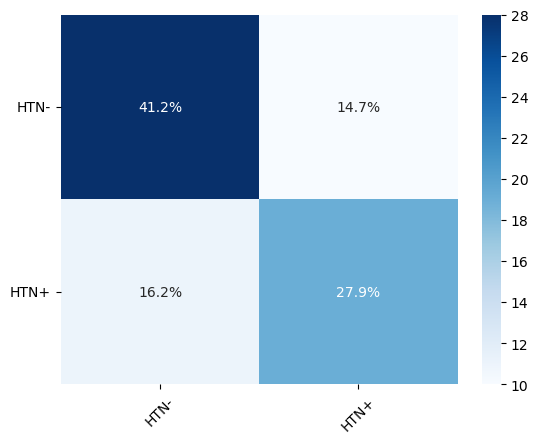

The best Acc 0.69 The best AUC 0.76 The best sensitivity 0.6 The best specificity 0.92
SEED 4 best_accc 0.69 best_aucc 0.76
FOLD enede
5 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


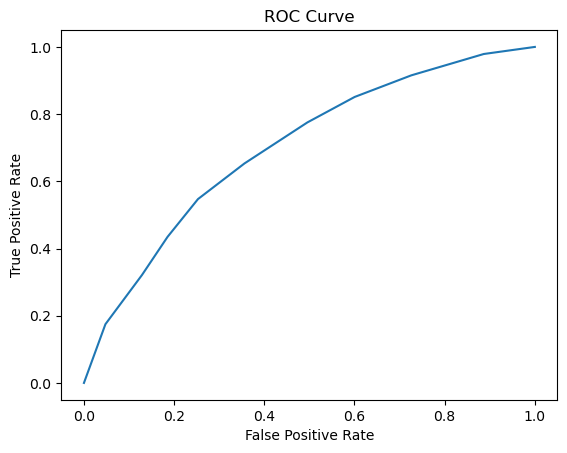

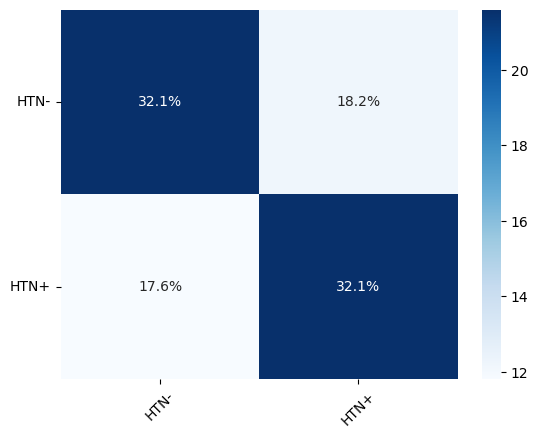

average accuracy : 0.64
average auc : 0.7
average sensitivity : 0.73
average specificity : 0.65
------------------------------
THE BEST IN ENTIRE FOLDS: 


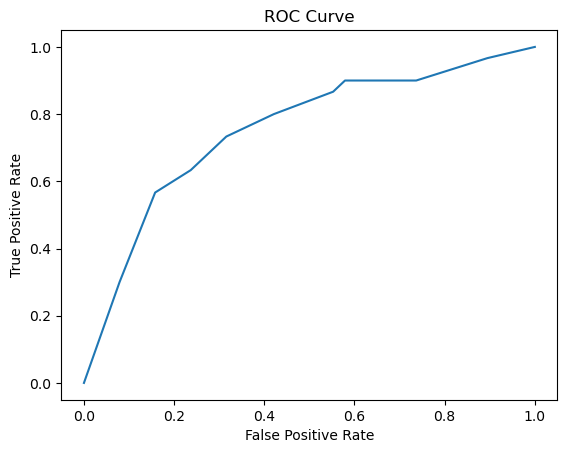

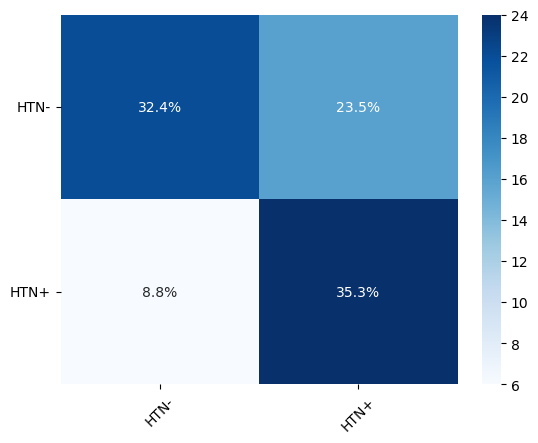

The best Acc 0.68 The best AUC 0.75 The best sensitivity 0.73 The best specificity 0.76
SEED 5 best_accc 0.68 best_aucc 0.75
FOLD enede
6 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


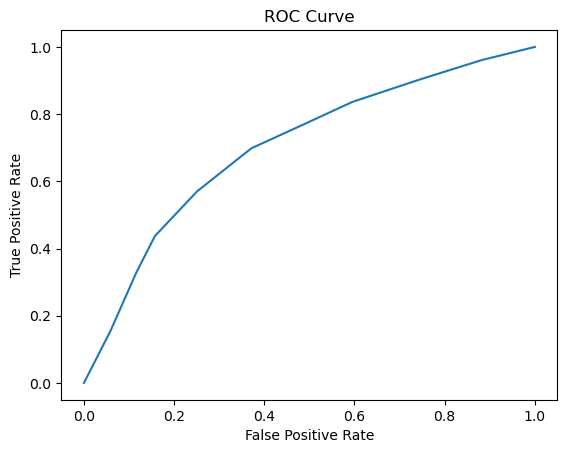

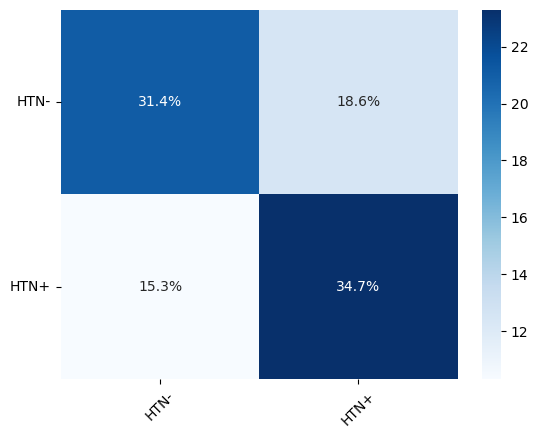

average accuracy : 0.66
average auc : 0.71
average sensitivity : 0.67
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


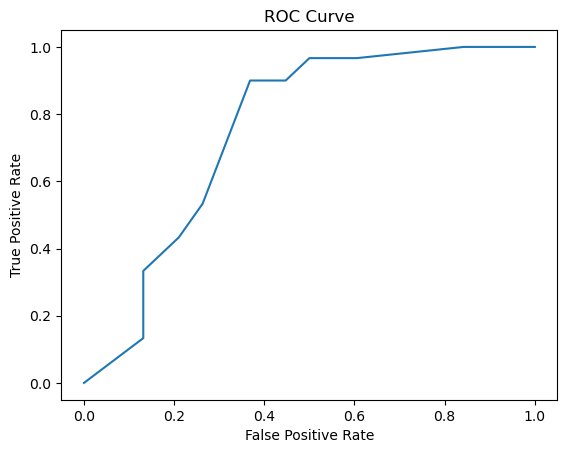

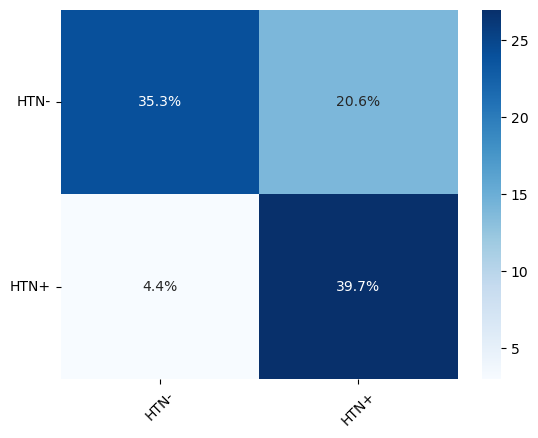

The best Acc 0.75 The best AUC 0.75 The best sensitivity 0.9 The best specificity 0.63
SEED 6 best_accc 0.75 best_aucc 0.75
FOLD enede
7 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


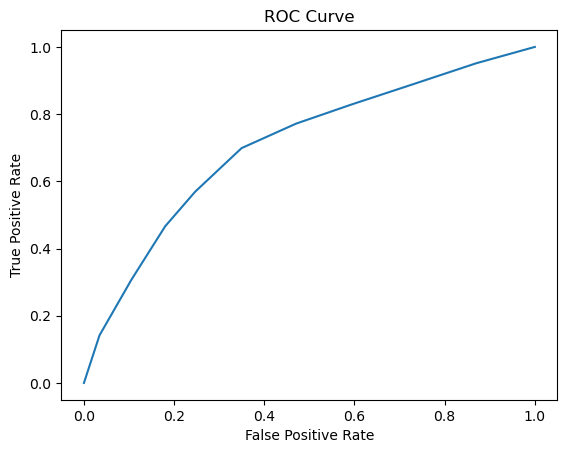

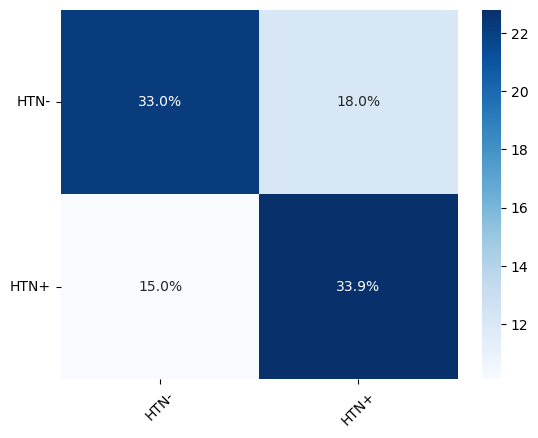

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.67
average specificity : 0.74
------------------------------
THE BEST IN ENTIRE FOLDS: 


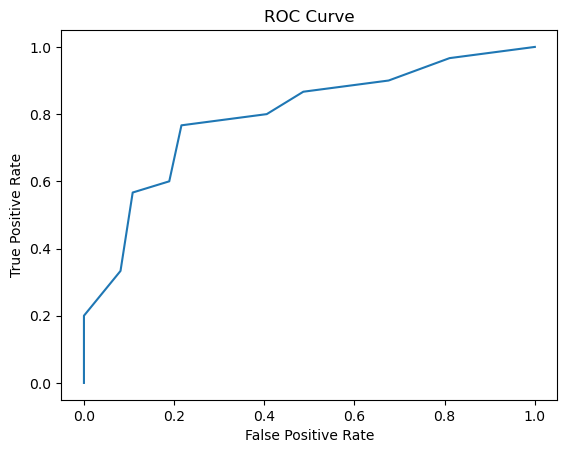

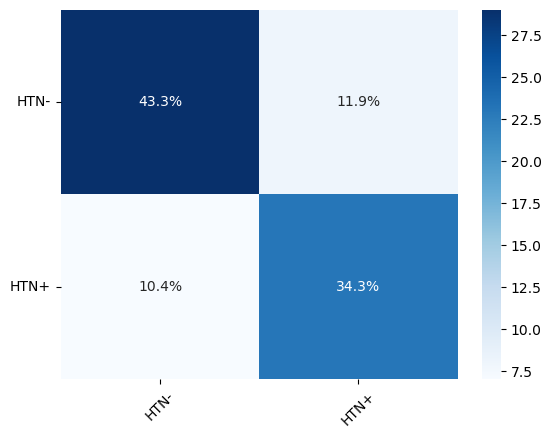

The best Acc 0.78 The best AUC 0.8 The best sensitivity 0.77 The best specificity 0.81
SEED 7 best_accc 0.78 best_aucc 0.8
FOLD enede
8 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


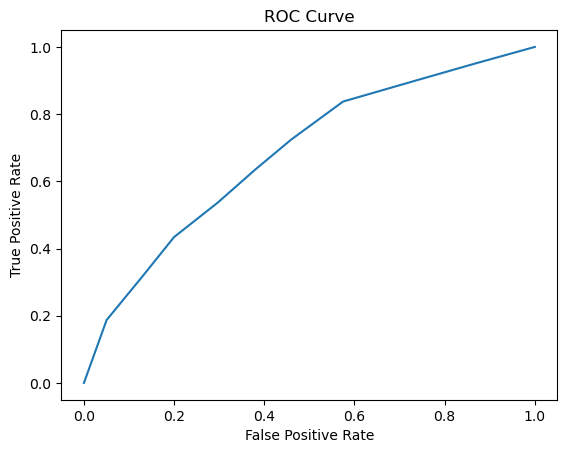

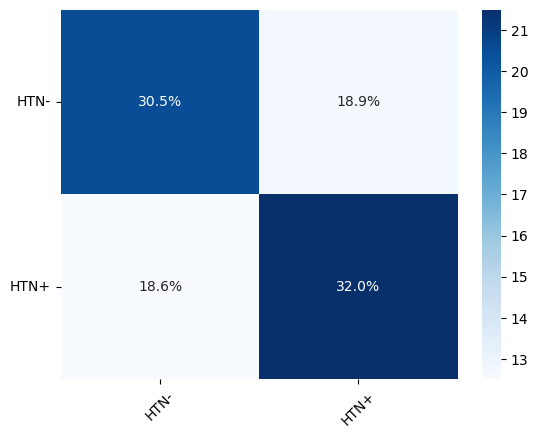

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.65
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


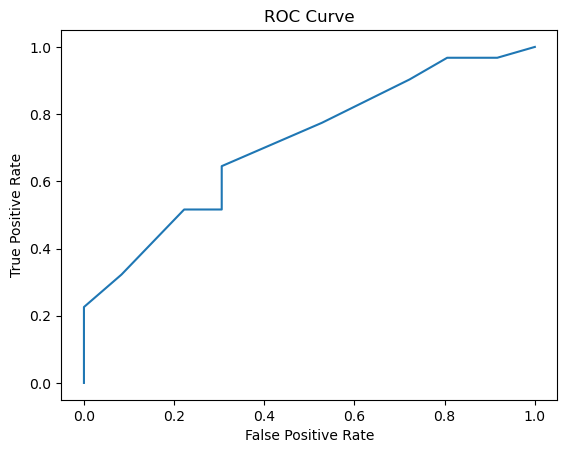

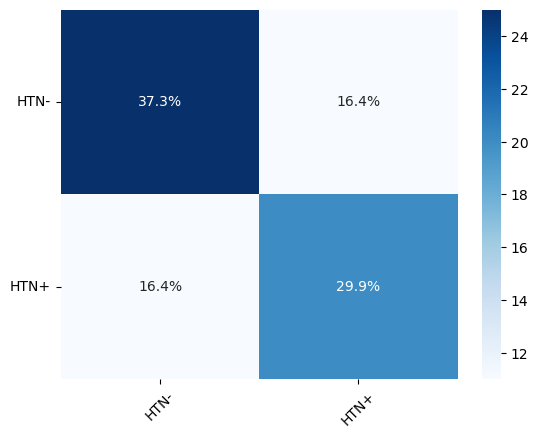

The best Acc 0.67 The best AUC 0.72 The best sensitivity 0.52 The best specificity 0.83
SEED 8 best_accc 0.67 best_aucc 0.72
FOLD enede
9 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


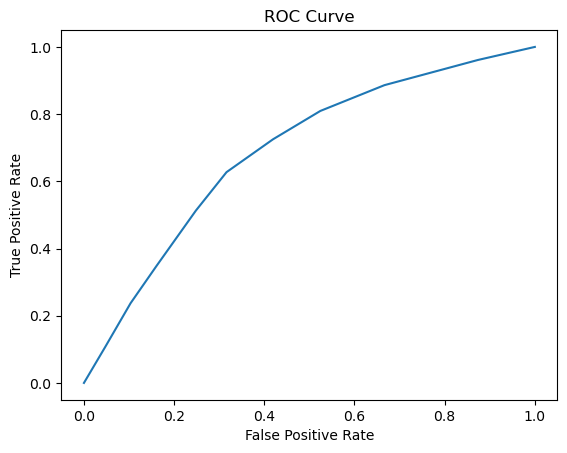

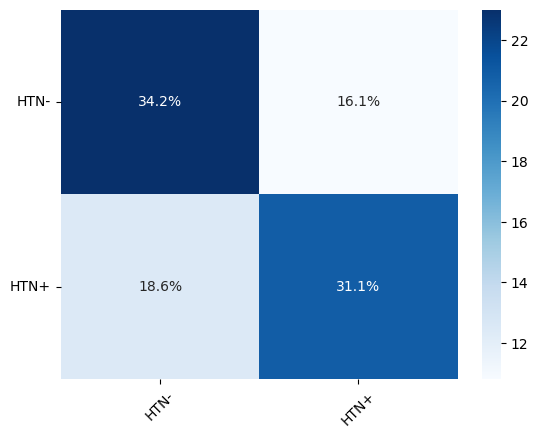

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.78
average specificity : 0.62
------------------------------
THE BEST IN ENTIRE FOLDS: 


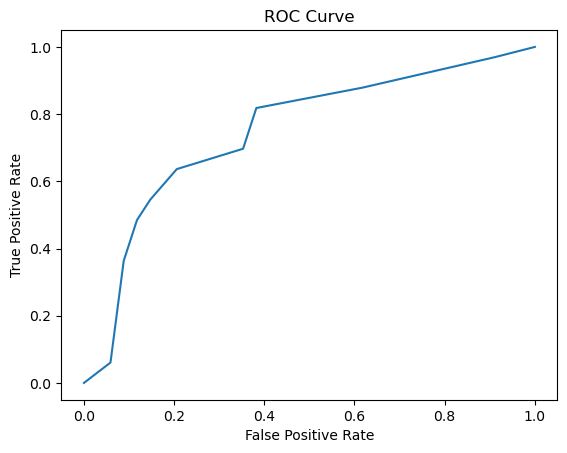

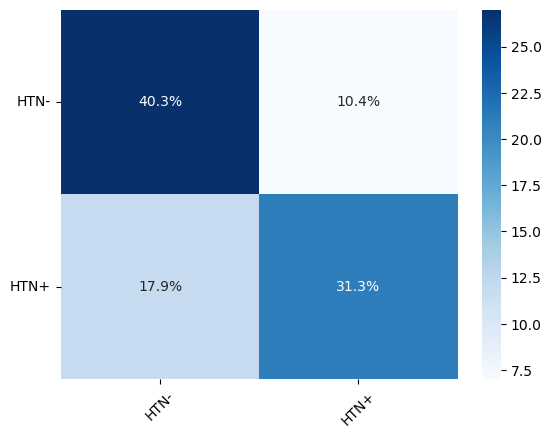

The best Acc 0.72 The best AUC 0.74 The best sensitivity 0.82 The best specificity 0.62
SEED 9 best_accc 0.72 best_aucc 0.74
FOLD enede
10 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


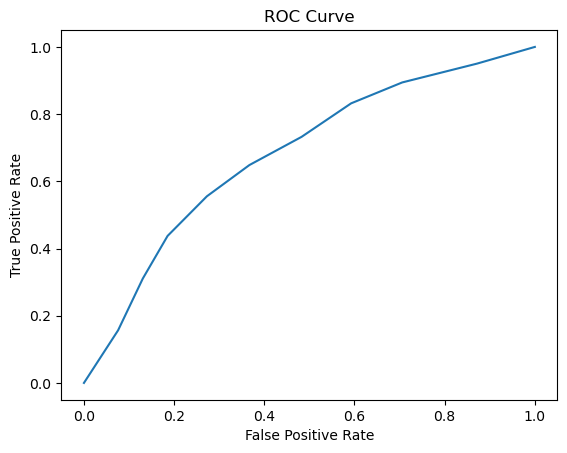

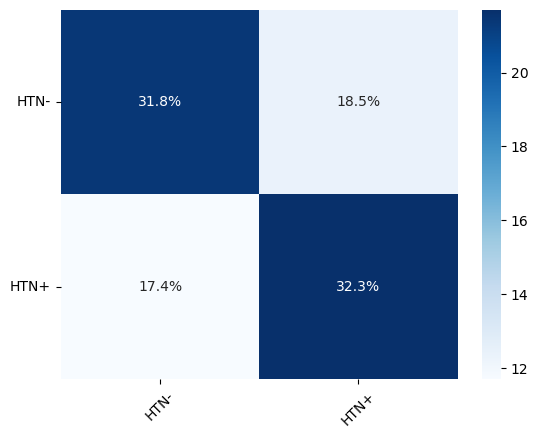

average accuracy : 0.64
average auc : 0.69
average sensitivity : 0.66
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


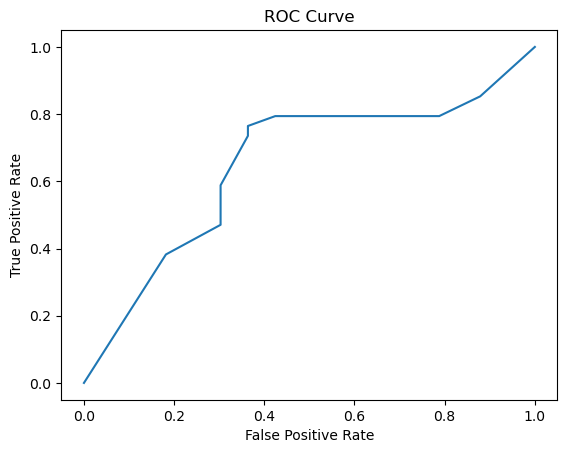

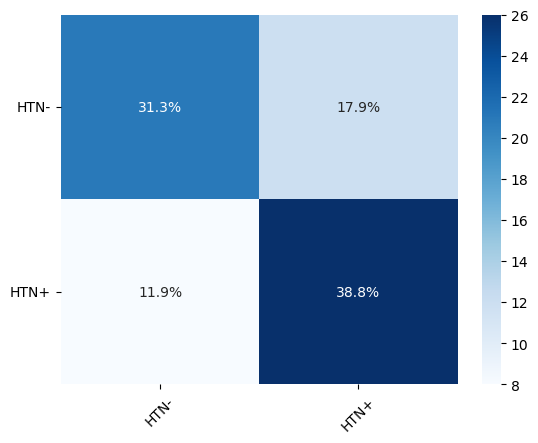

The best Acc 0.7 The best AUC 0.66 The best sensitivity 0.76 The best specificity 0.64
SEED 10 best_accc 0.7 best_aucc 0.66
FOLD enede
11 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


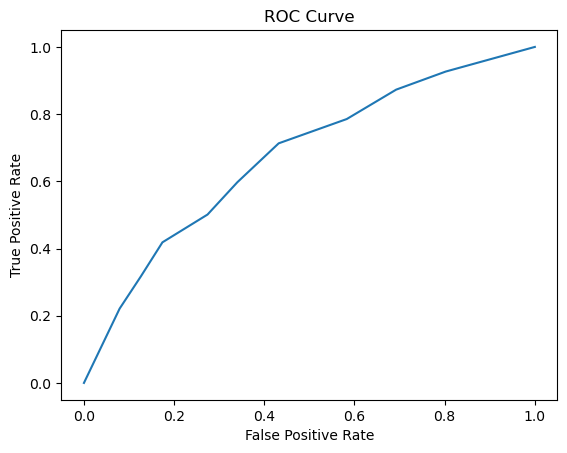

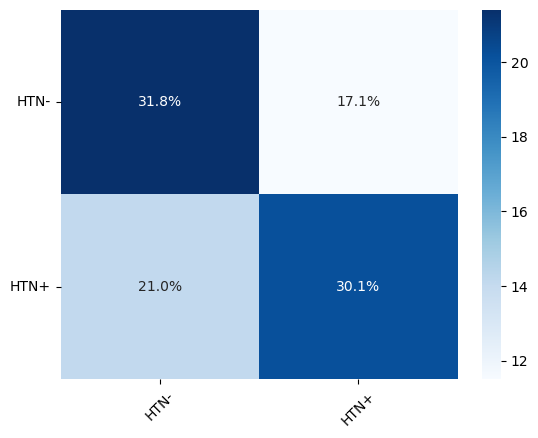

average accuracy : 0.62
average auc : 0.68
average sensitivity : 0.7
average specificity : 0.65
------------------------------
THE BEST IN ENTIRE FOLDS: 


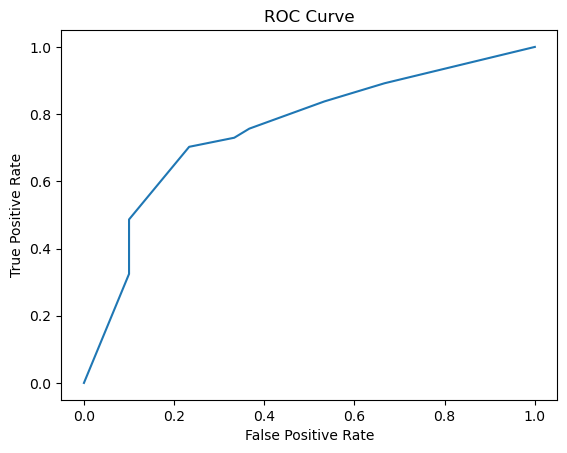

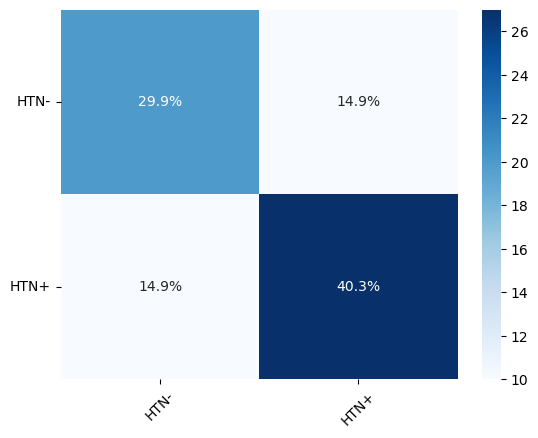

The best Acc 0.7 The best AUC 0.77 The best sensitivity 0.73 The best specificity 0.77
SEED 11 best_accc 0.7 best_aucc 0.77
FOLD enede
12 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


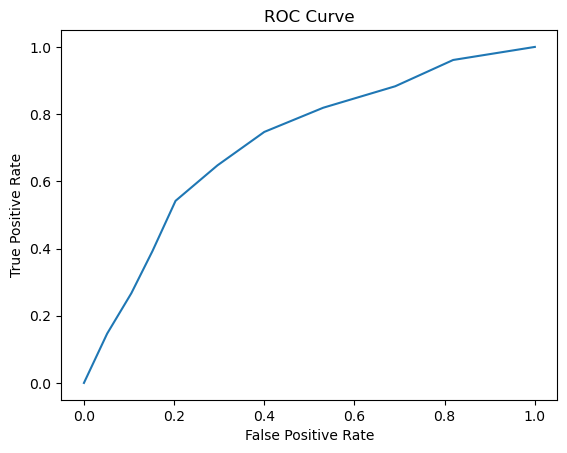

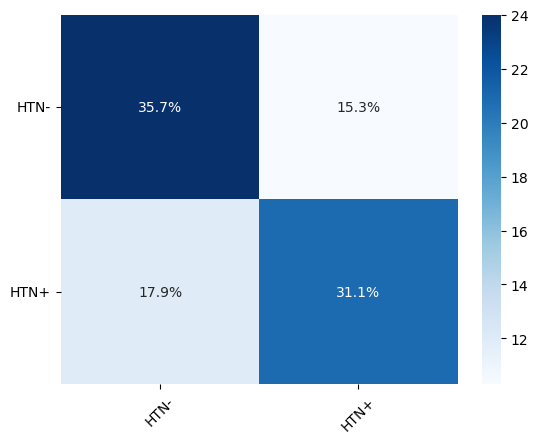

average accuracy : 0.67
average auc : 0.72
average sensitivity : 0.73
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


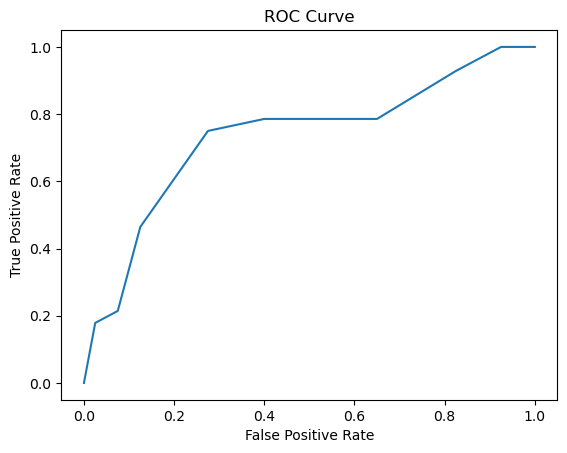

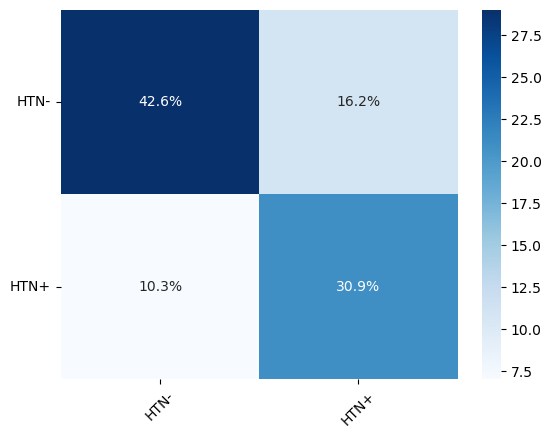

The best Acc 0.74 The best AUC 0.73 The best sensitivity 0.75 The best specificity 0.78
SEED 12 best_accc 0.74 best_aucc 0.73
FOLD enede
13 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


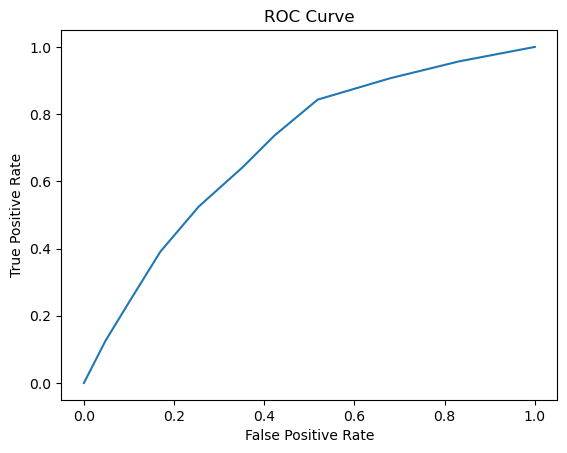

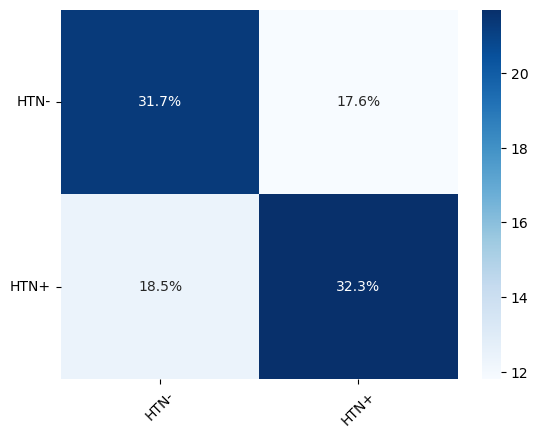

average accuracy : 0.64
average auc : 0.71
average sensitivity : 0.79
average specificity : 0.61
------------------------------
THE BEST IN ENTIRE FOLDS: 


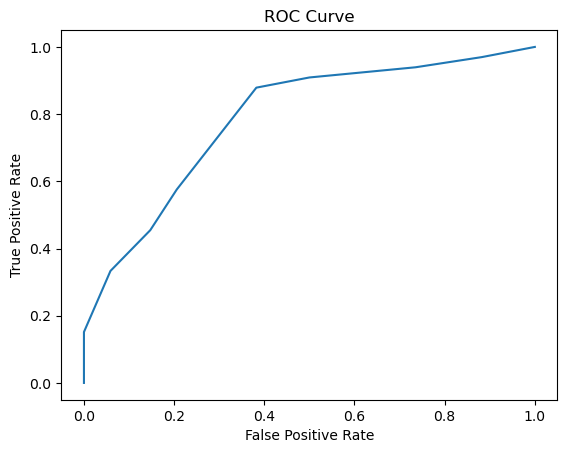

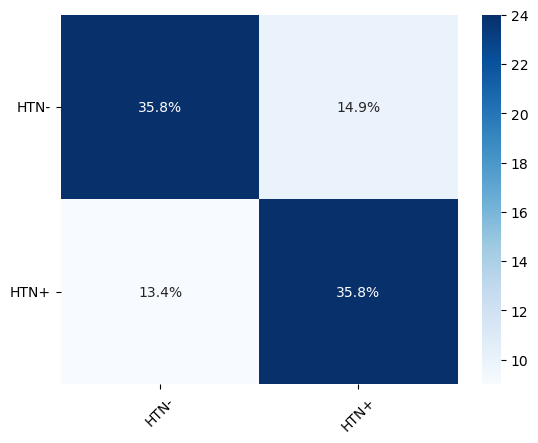

The best Acc 0.72 The best AUC 0.79 The best sensitivity 0.88 The best specificity 0.65
SEED 13 best_accc 0.72 best_aucc 0.79
FOLD enede
14 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


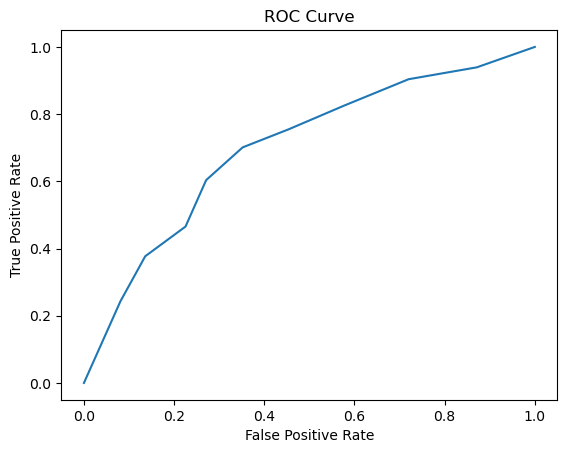

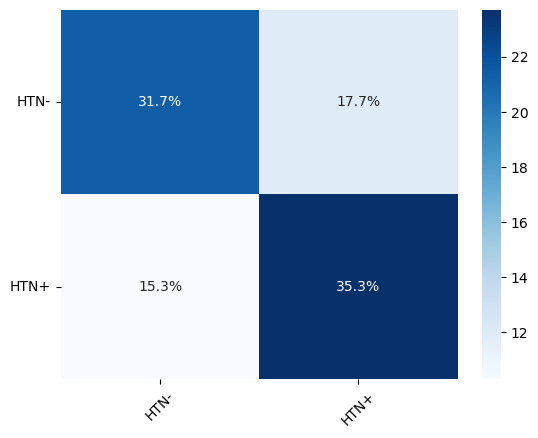

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.74
average specificity : 0.67
------------------------------
THE BEST IN ENTIRE FOLDS: 


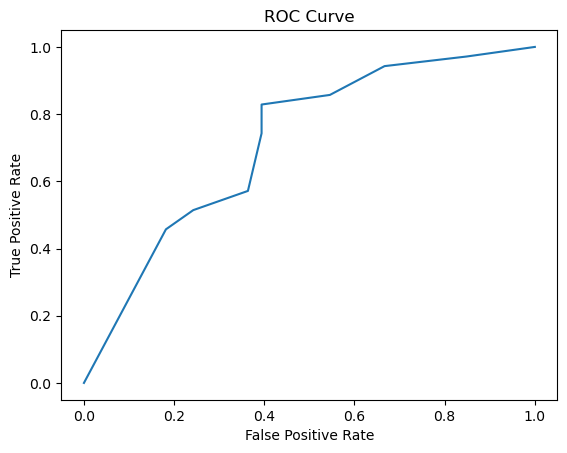

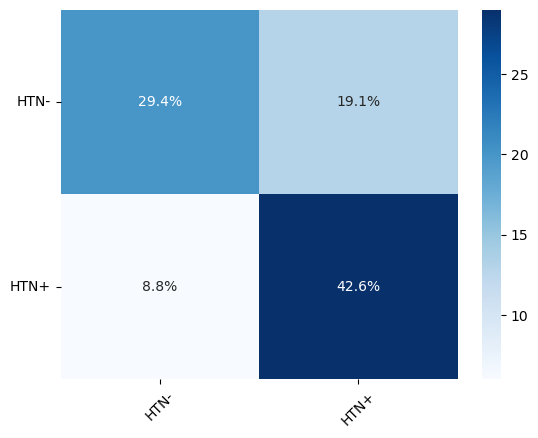

The best Acc 0.72 The best AUC 0.71 The best sensitivity 0.83 The best specificity 0.61
SEED 14 best_accc 0.72 best_aucc 0.71
FOLD enede
15 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


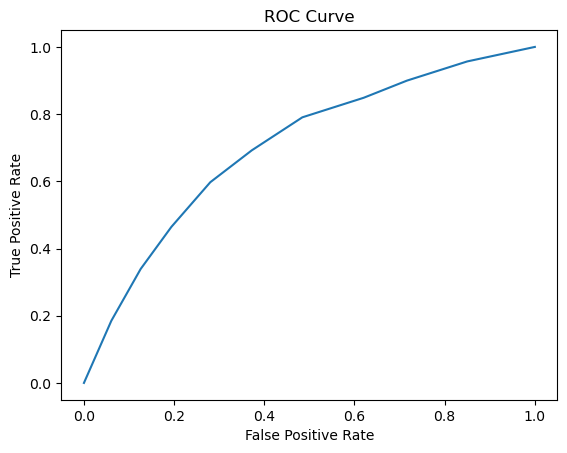

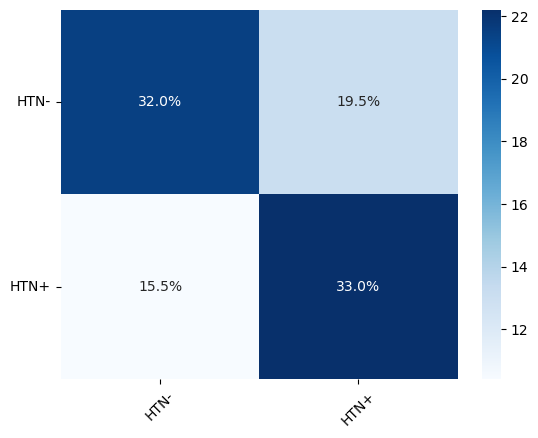

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.74
average specificity : 0.66
------------------------------
THE BEST IN ENTIRE FOLDS: 


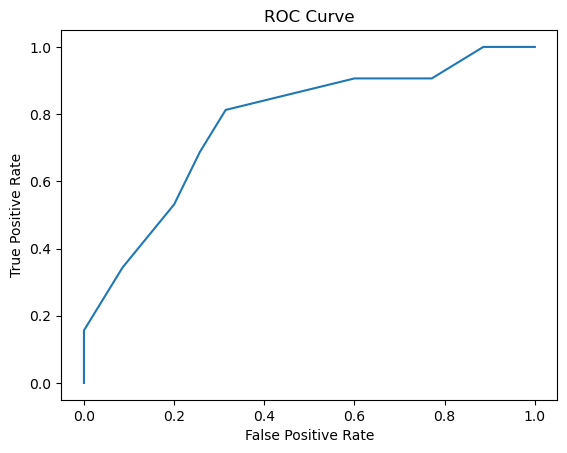

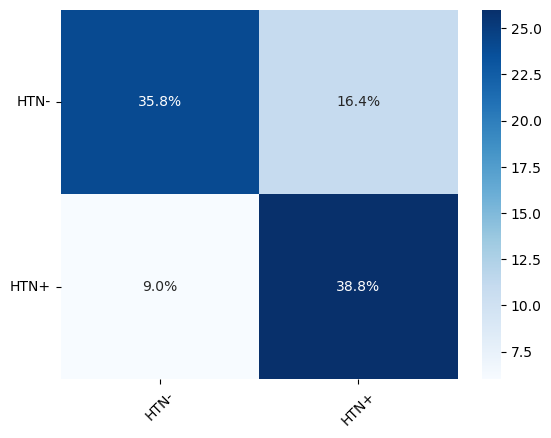

The best Acc 0.75 The best AUC 0.77 The best sensitivity 0.81 The best specificity 0.69
SEED 15 best_accc 0.75 best_aucc 0.77
FOLD enede
16 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


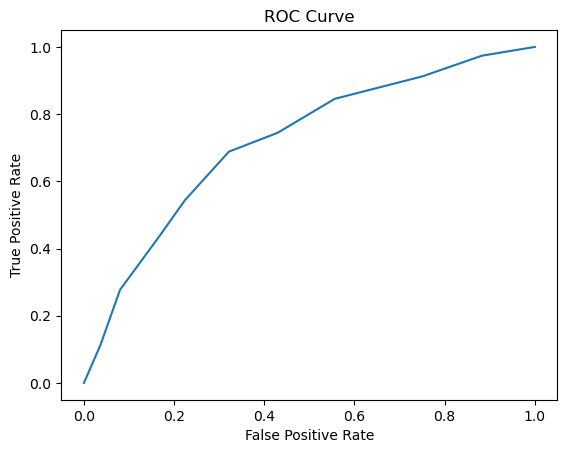

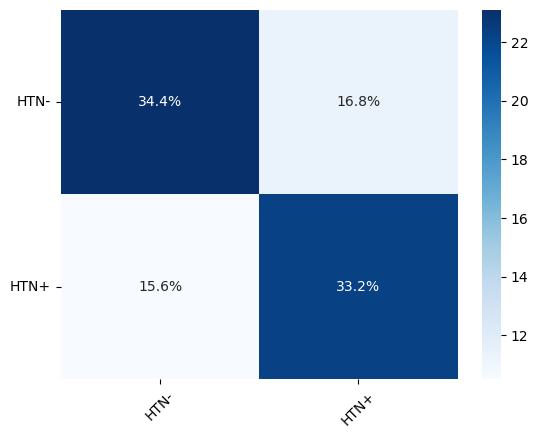

average accuracy : 0.68
average auc : 0.72
average sensitivity : 0.75
average specificity : 0.68
------------------------------
THE BEST IN ENTIRE FOLDS: 


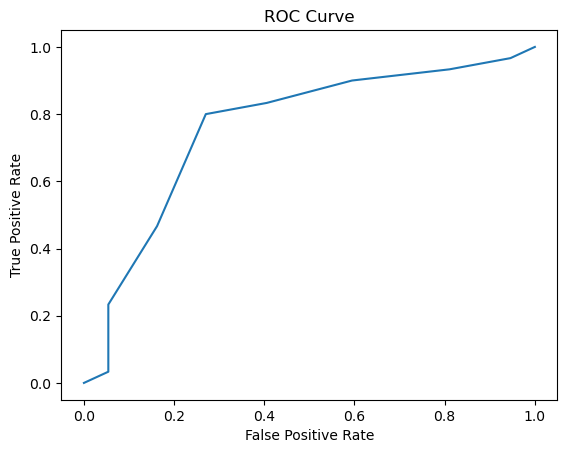

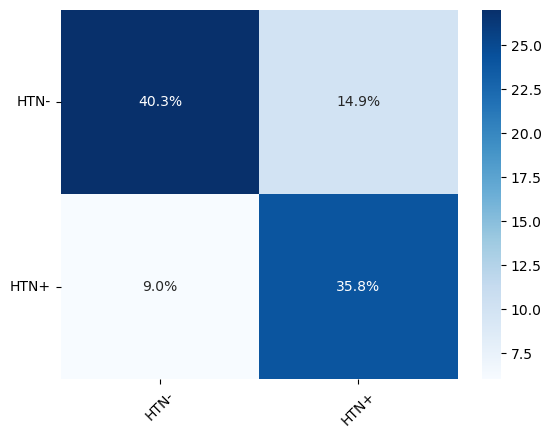

The best Acc 0.76 The best AUC 0.77 The best sensitivity 0.8 The best specificity 0.76
SEED 16 best_accc 0.76 best_aucc 0.77
FOLD enede
17 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


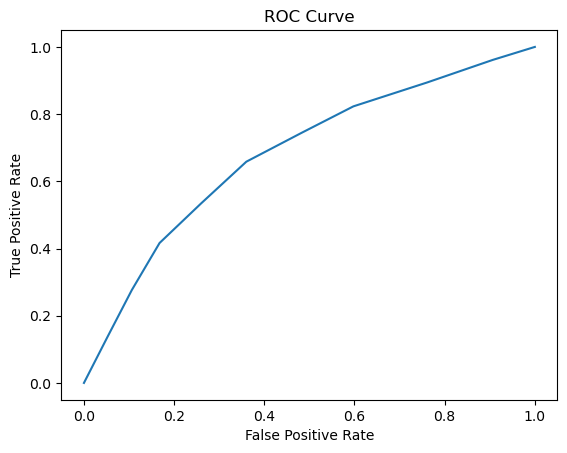

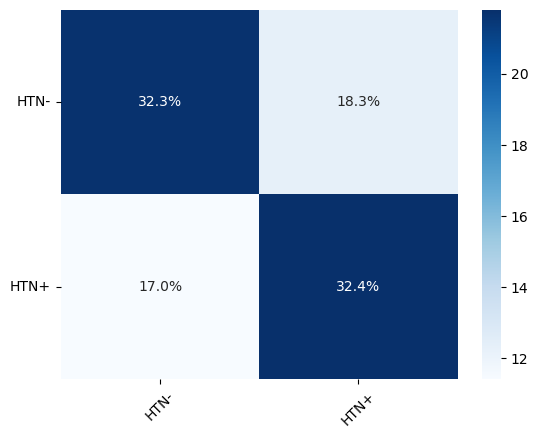

average accuracy : 0.65
average auc : 0.69
average sensitivity : 0.69
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


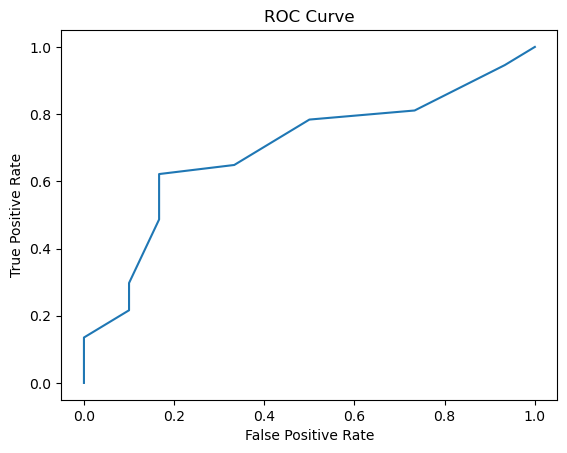

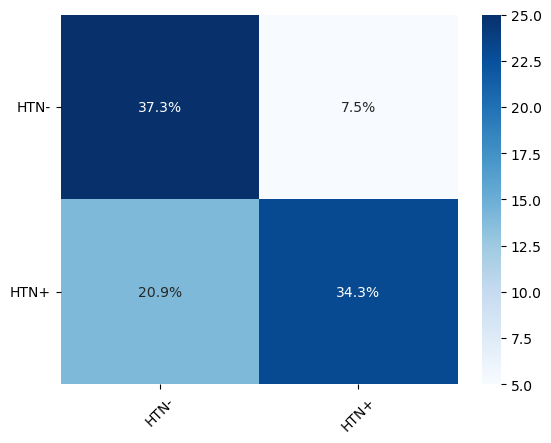

The best Acc 0.72 The best AUC 0.71 The best sensitivity 0.62 The best specificity 0.83
SEED 17 best_accc 0.72 best_aucc 0.71
FOLD enede
18 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


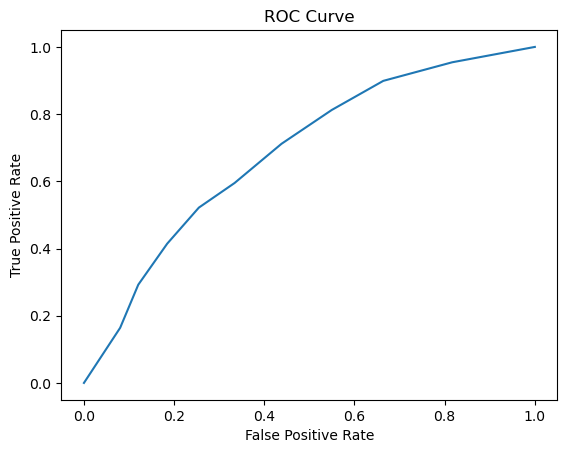

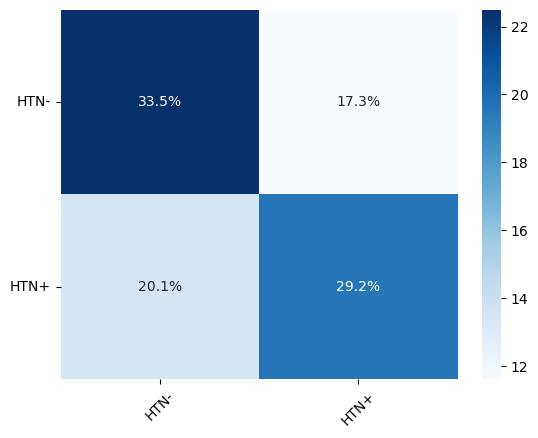

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.81
average specificity : 0.55
------------------------------
THE BEST IN ENTIRE FOLDS: 


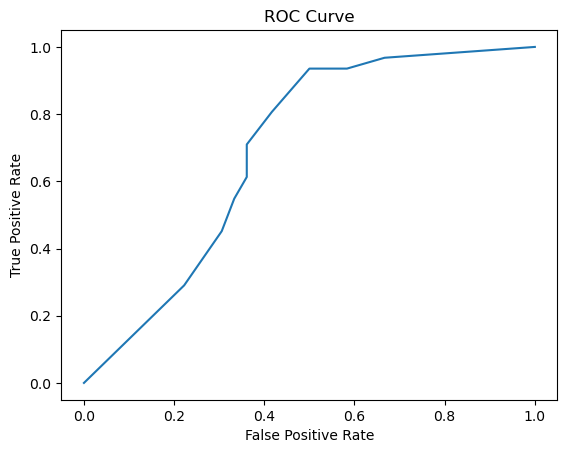

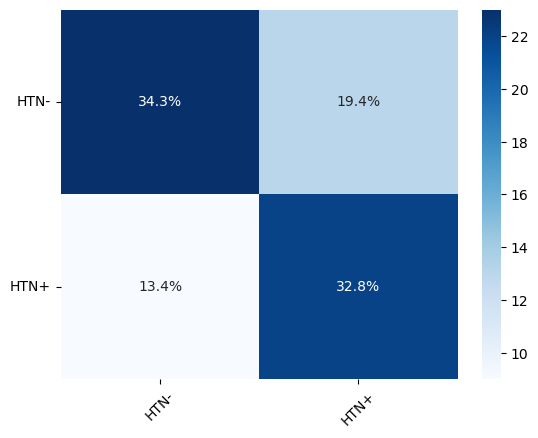

The best Acc 0.67 The best AUC 0.7 The best sensitivity 0.94 The best specificity 0.5
SEED 18 best_accc 0.67 best_aucc 0.7
FOLD enede
19 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


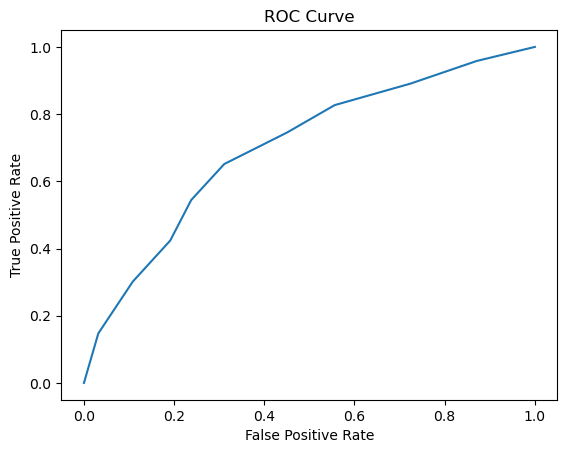

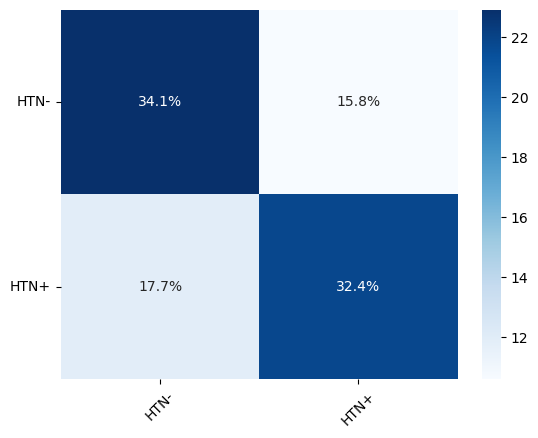

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.65
average specificity : 0.73
------------------------------
THE BEST IN ENTIRE FOLDS: 


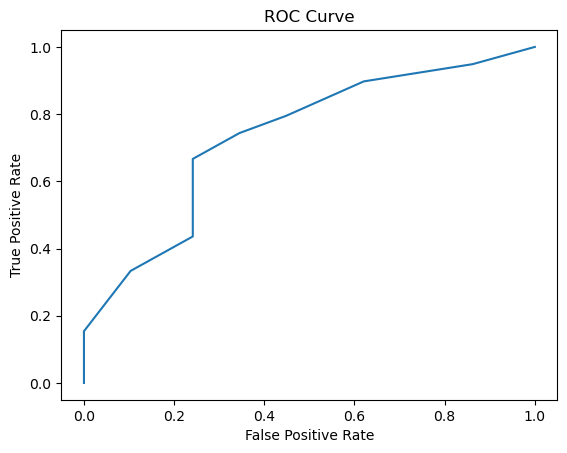

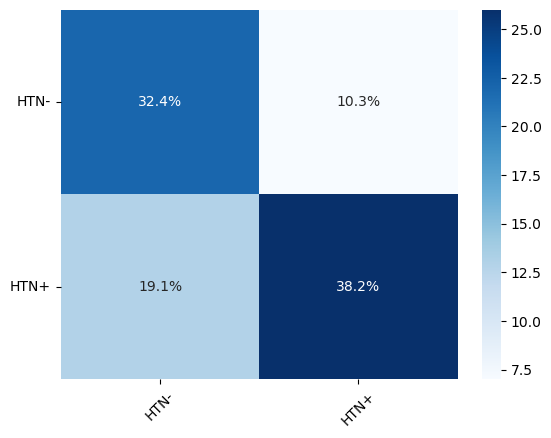

The best Acc 0.71 The best AUC 0.73 The best sensitivity 0.67 The best specificity 0.76
SEED 19 best_accc 0.71 best_aucc 0.73
FOLD enede
20 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


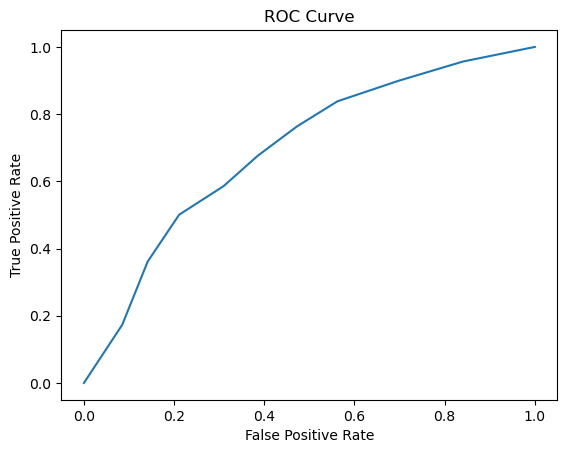

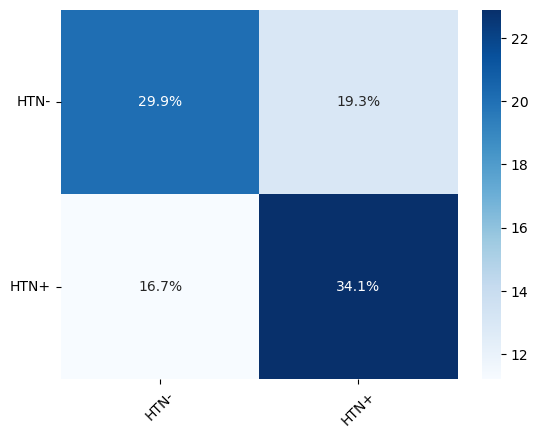

average accuracy : 0.64
average auc : 0.7
average sensitivity : 0.7
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


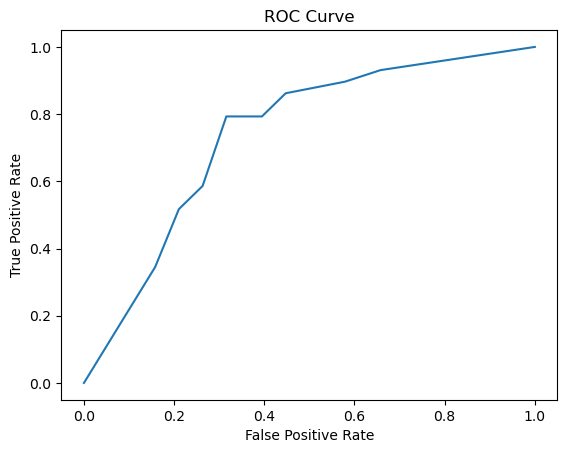

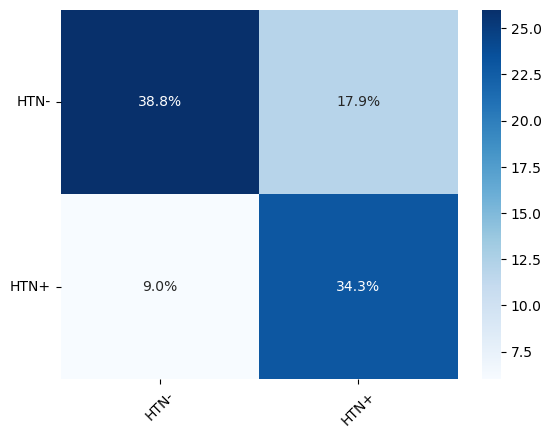

The best Acc 0.73 The best AUC 0.73 The best sensitivity 0.79 The best specificity 0.71
SEED 20 best_accc 0.73 best_aucc 0.73
FOLD enede
21 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


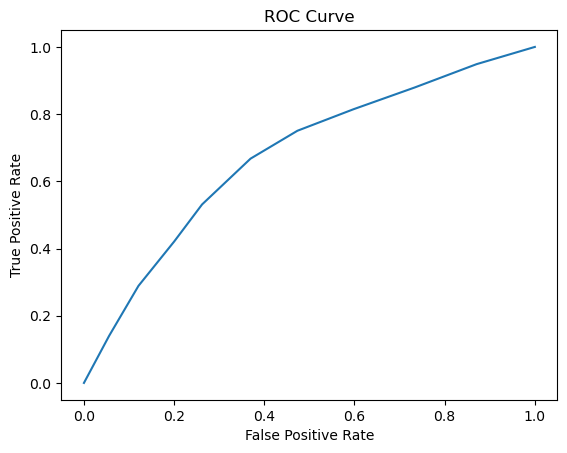

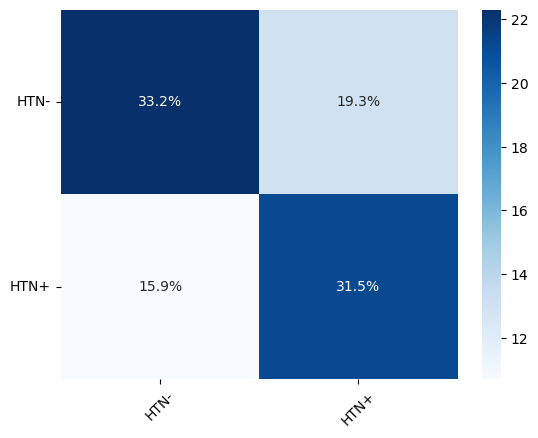

average accuracy : 0.65
average auc : 0.68
average sensitivity : 0.69
average specificity : 0.67
------------------------------
THE BEST IN ENTIRE FOLDS: 


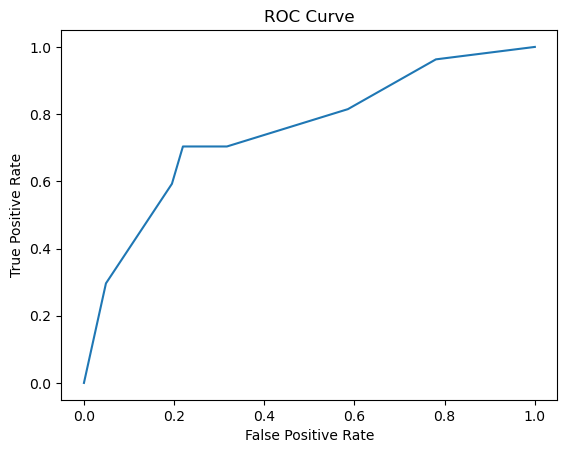

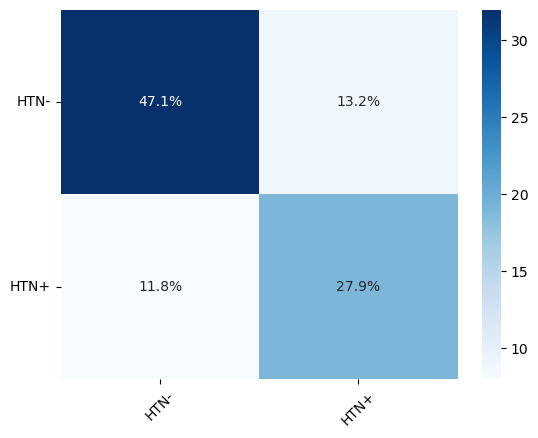

The best Acc 0.75 The best AUC 0.75 The best sensitivity 0.7 The best specificity 0.78
SEED 21 best_accc 0.75 best_aucc 0.75
FOLD enede
22 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


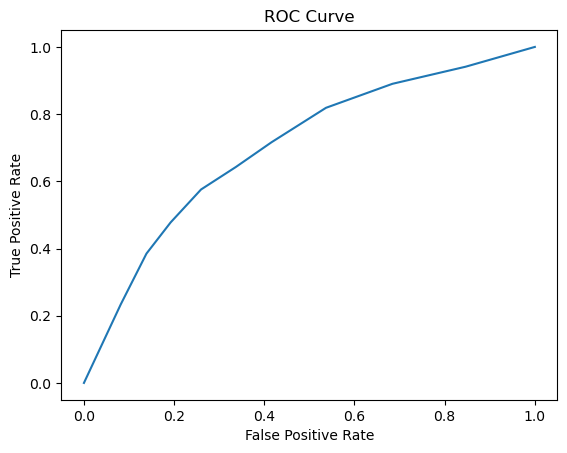

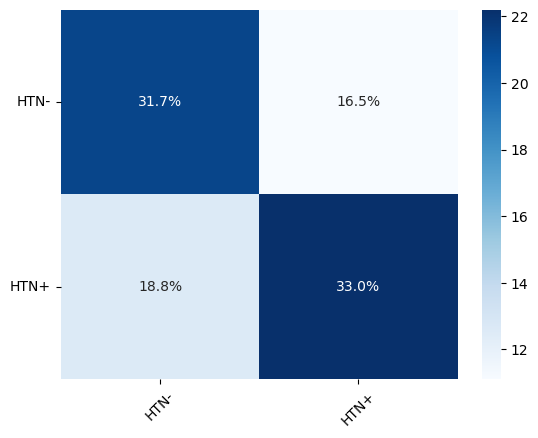

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.73
average specificity : 0.66
------------------------------
THE BEST IN ENTIRE FOLDS: 


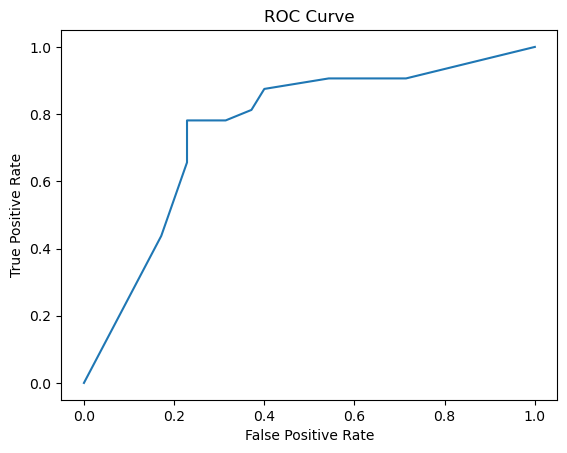

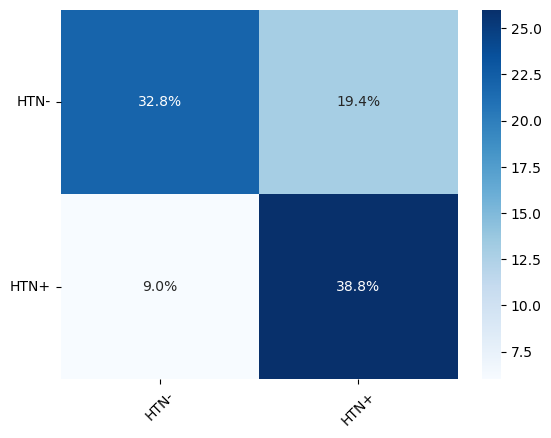

The best Acc 0.72 The best AUC 0.75 The best sensitivity 0.78 The best specificity 0.77
SEED 22 best_accc 0.72 best_aucc 0.75
FOLD enede
23 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


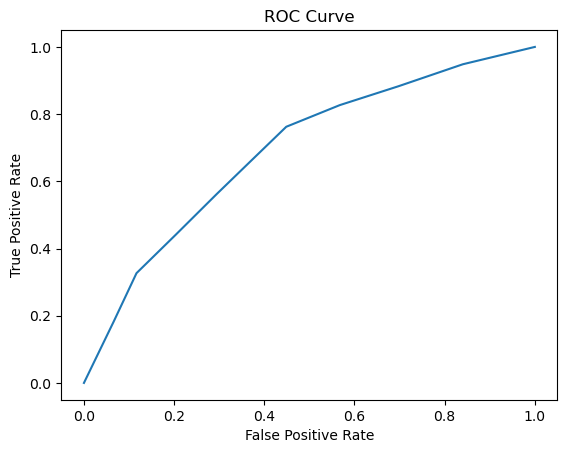

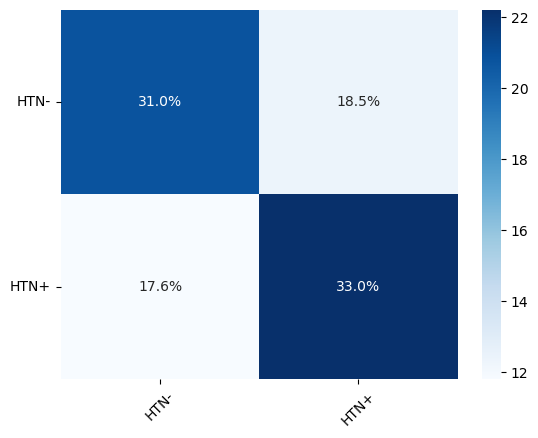

average accuracy : 0.64
average auc : 0.69
average sensitivity : 0.68
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


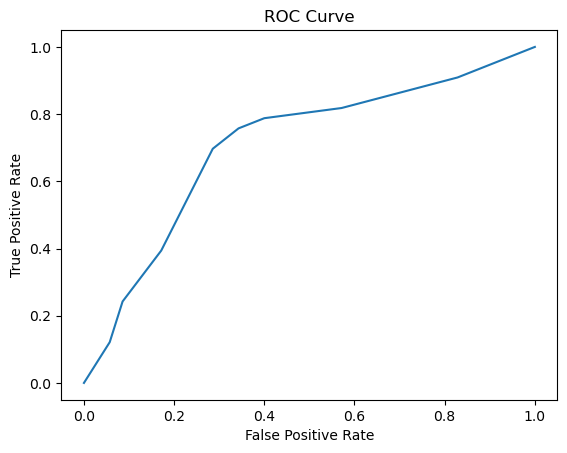

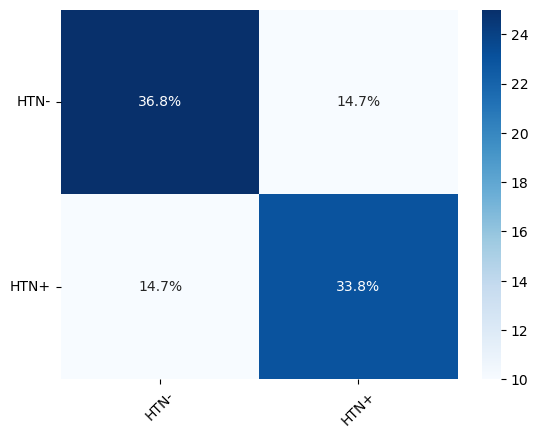

The best Acc 0.71 The best AUC 0.7 The best sensitivity 0.76 The best specificity 0.71
SEED 23 best_accc 0.71 best_aucc 0.7
FOLD enede
24 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


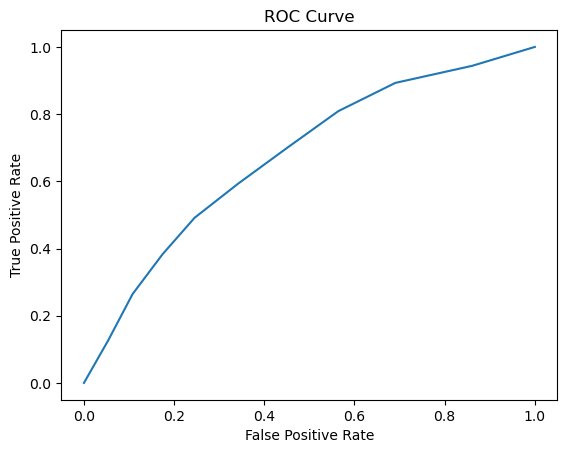

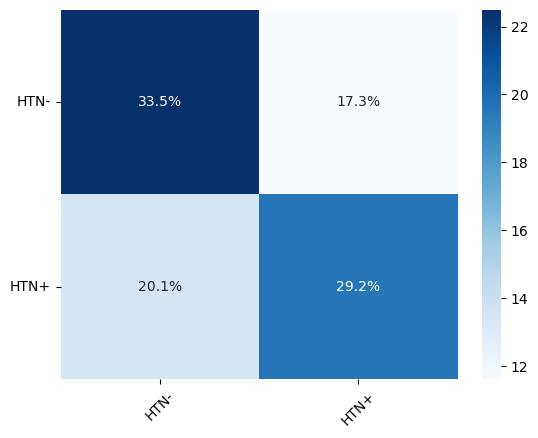

average accuracy : 0.63
average auc : 0.68
average sensitivity : 0.67
average specificity : 0.68
------------------------------
THE BEST IN ENTIRE FOLDS: 


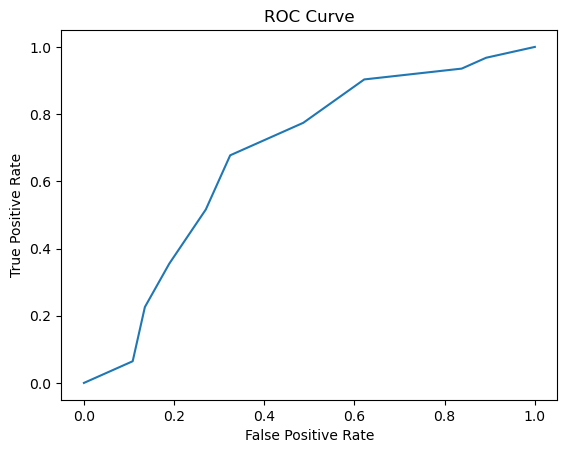

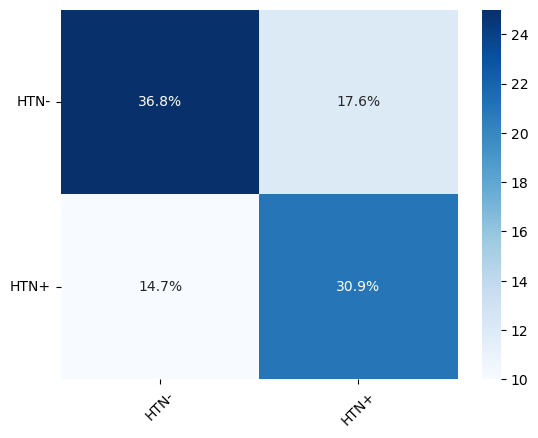

The best Acc 0.68 The best AUC 0.68 The best sensitivity 0.74 The best specificity 0.65
SEED 24 best_accc 0.68 best_aucc 0.68
FOLD enede
25 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


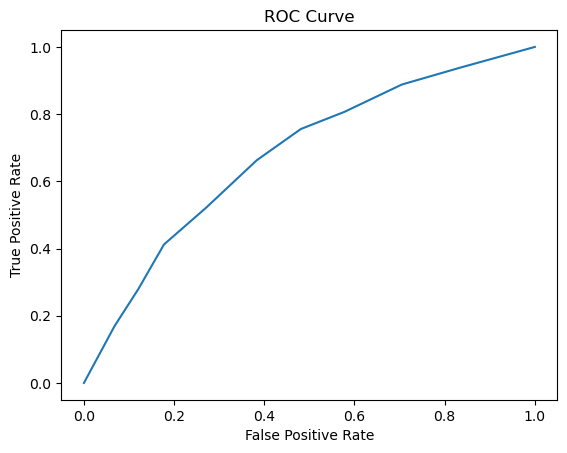

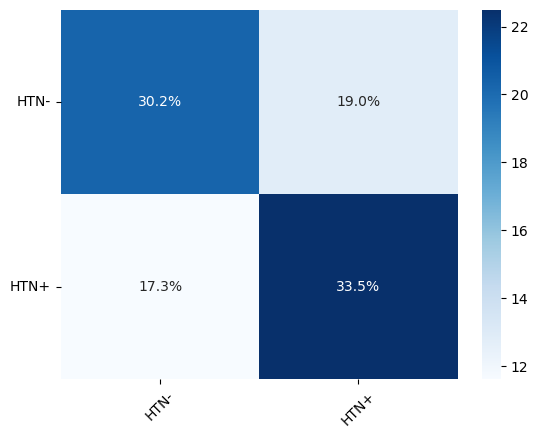

average accuracy : 0.64
average auc : 0.68
average sensitivity : 0.67
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


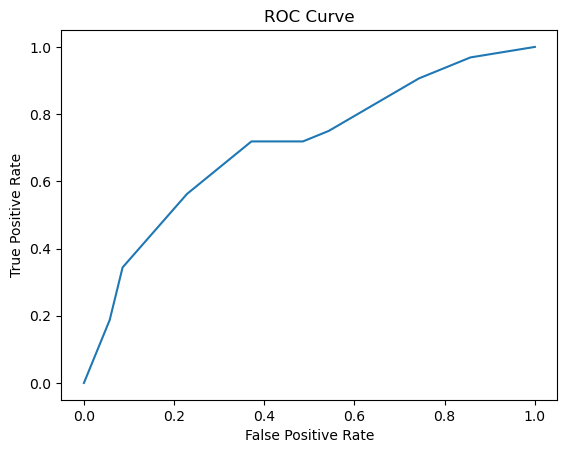

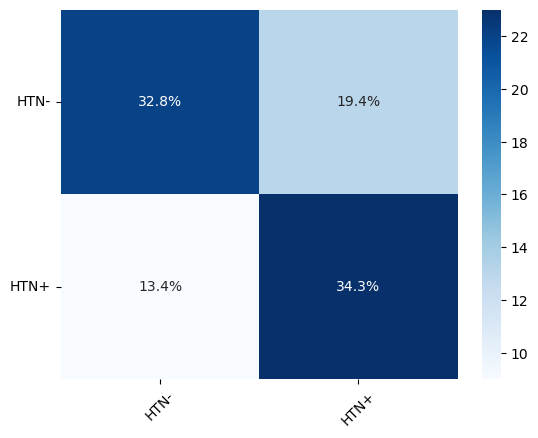

The best Acc 0.67 The best AUC 0.71 The best sensitivity 0.69 The best specificity 0.74
SEED 25 best_accc 0.67 best_aucc 0.71
FOLD enede
26 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


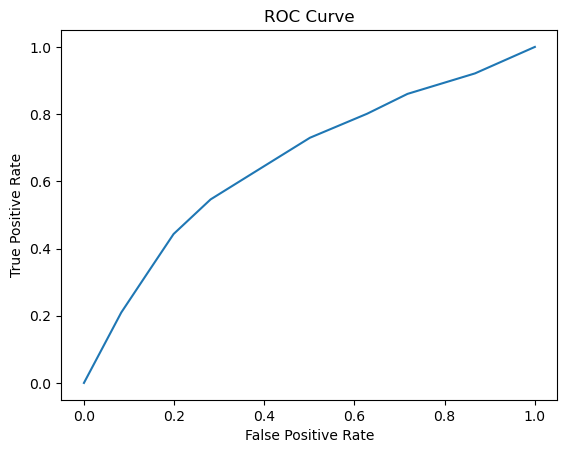

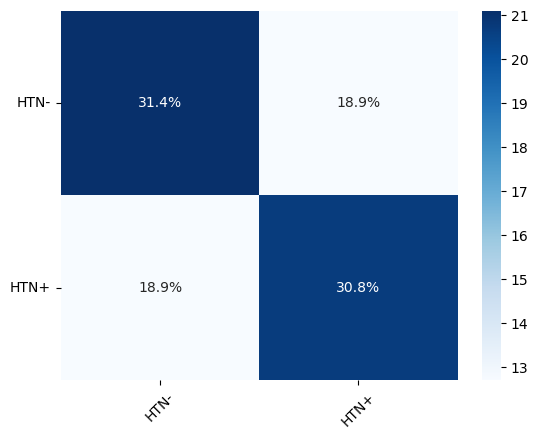

average accuracy : 0.62
average auc : 0.67
average sensitivity : 0.6
average specificity : 0.74
------------------------------
THE BEST IN ENTIRE FOLDS: 


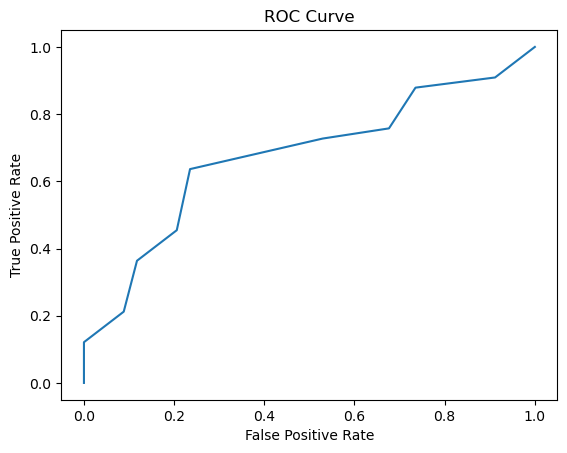

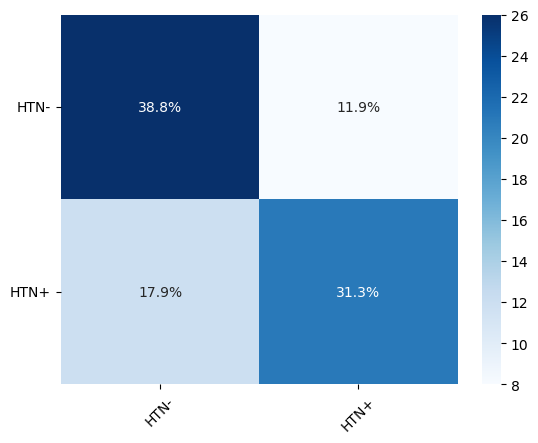

The best Acc 0.7 The best AUC 0.67 The best sensitivity 0.67 The best specificity 0.76
SEED 26 best_accc 0.7 best_aucc 0.67
FOLD enede
27 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


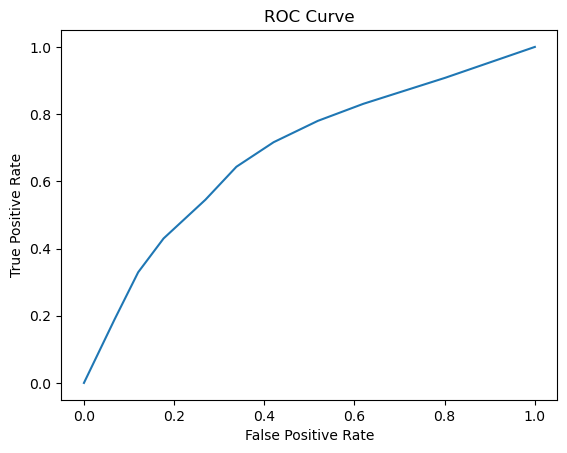

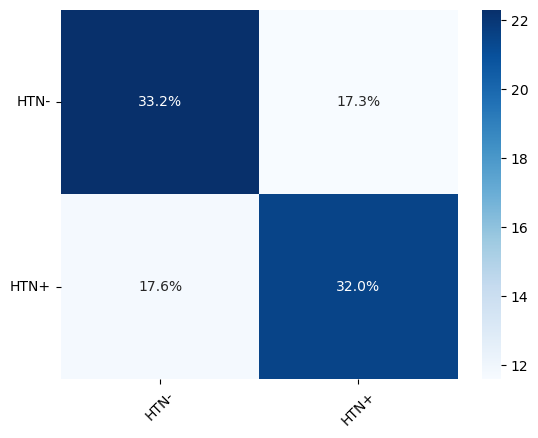

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.69
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


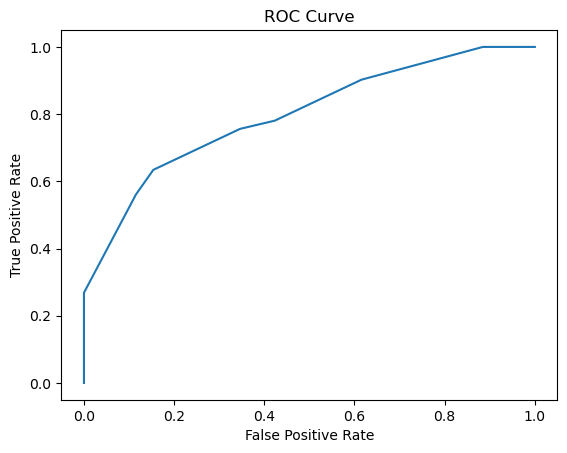

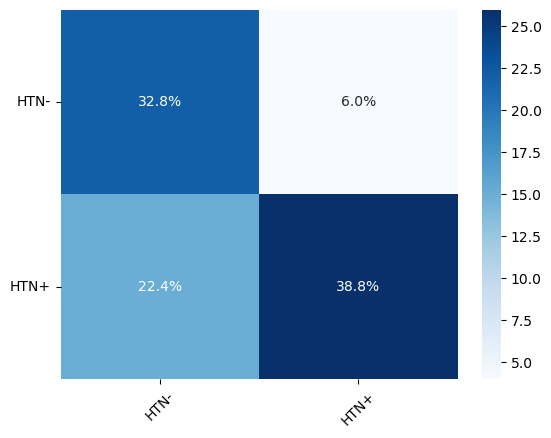

The best Acc 0.72 The best AUC 0.8 The best sensitivity 0.76 The best specificity 0.81
SEED 27 best_accc 0.72 best_aucc 0.8
FOLD enede
28 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


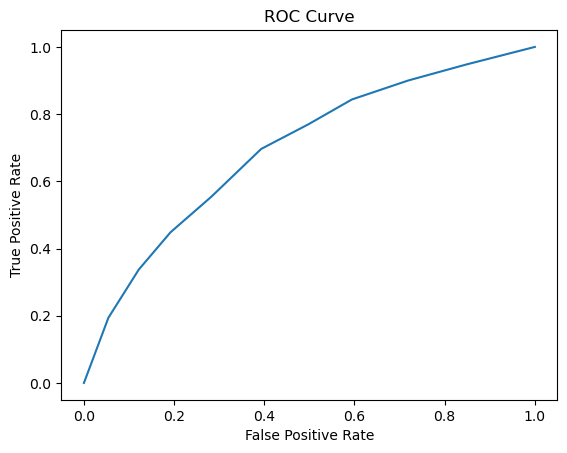

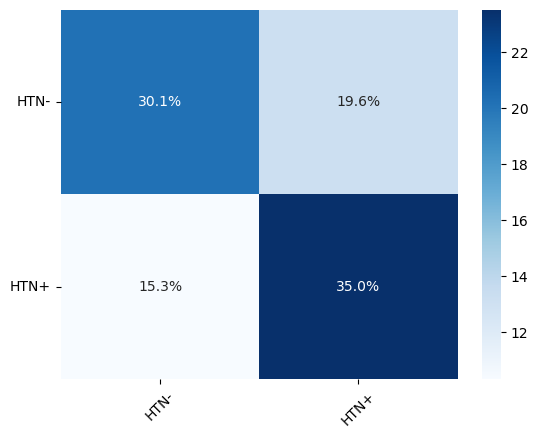

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.67
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


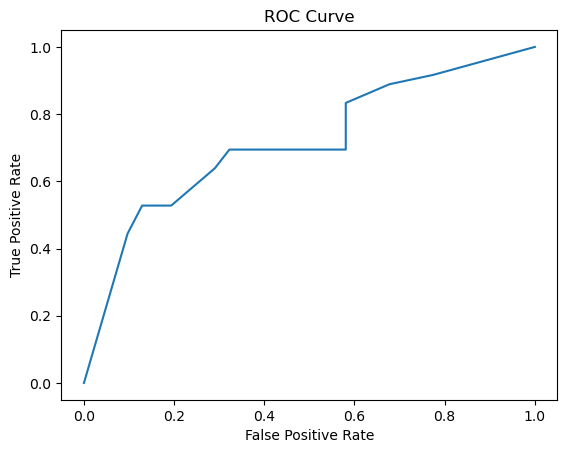

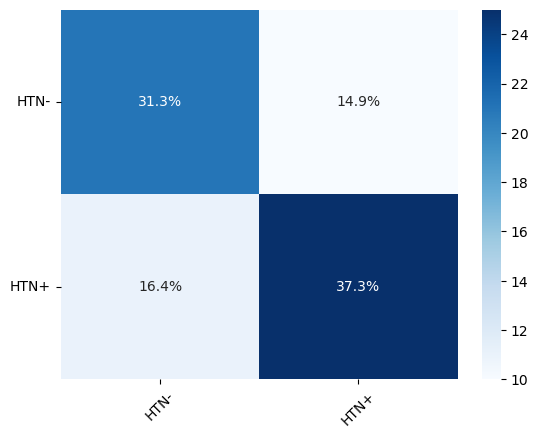

The best Acc 0.69 The best AUC 0.72 The best sensitivity 0.53 The best specificity 0.87
SEED 28 best_accc 0.69 best_aucc 0.72
FOLD enede
29 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


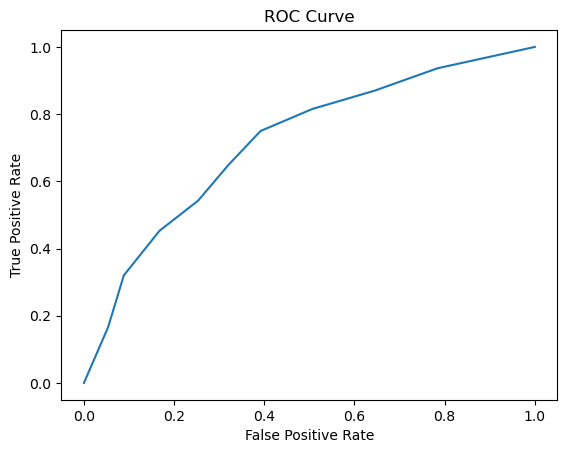

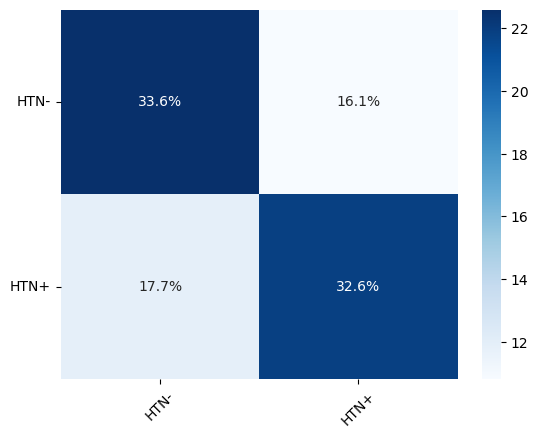

average accuracy : 0.66
average auc : 0.72
average sensitivity : 0.81
average specificity : 0.63
------------------------------
THE BEST IN ENTIRE FOLDS: 


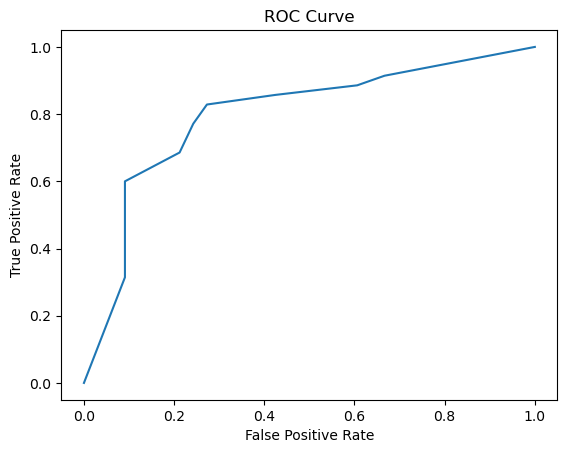

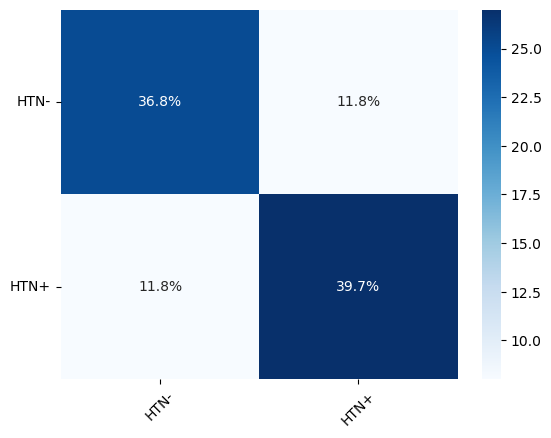

The best Acc 0.76 The best AUC 0.8 The best sensitivity 0.8 The best specificity 0.76
SEED 29 best_accc 0.76 best_aucc 0.8
FOLD enede
time for the deterined epochss min 1193.818894159794


In [17]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500

train = 0
model_type = "efficientnet_b0_aucbased"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in range(30):
                    print(SEED, "<><><><><<><><><><><><><><<><><><><><><><><><><>")
                    
                    ress = []
                    
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                      
                    if dataset_type == "60min":
                        Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")
                     
#                     if dataset_type == "9min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_9min.npy")
#                     if dataset_type == "11min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_11min.npy")
#                     if dataset_type == "12min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_12min.npy")
#                     if dataset_type == "13min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_13min.npy")
#                     if dataset_type == "14min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_14min.npy")
#                     if dataset_type == "15min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_15min.npy")


                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits = num_folds, shuffle = True, random_state = SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)

                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    # Split the remaining data into folds
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
                            fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)



                    for fold in range(num_folds):
                        best_auc  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        loss_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
#                                 print(">>", outputs.shape, outputs.dtype, labels.shape, labels.dtype)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                            loss_list_train.append(loss_epoch)

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)



                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            loss_list_test.append(loss_epoch)
                            accuracy = accuracy_score(y_true, y_pred)


                            
                            auc = roc_auc_score(y_true, y_probs)
#                             print("auc", auc, "acc", accuracy)

                            if auc > best_auc:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_auc = auc
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])




                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    print("SEED",SEED, "best_accc",best_accc, "best_aucc",best_aucc)
                    np.save(location+f"{SEED}", [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)


# converg gr

0 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


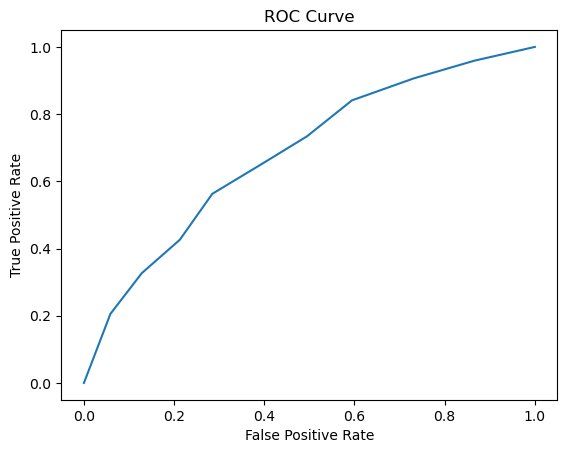

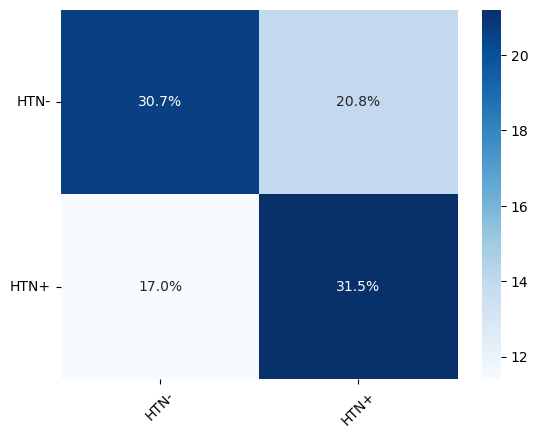

average accuracy : 0.62
average auc : 0.7
average sensitivity : 0.64
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


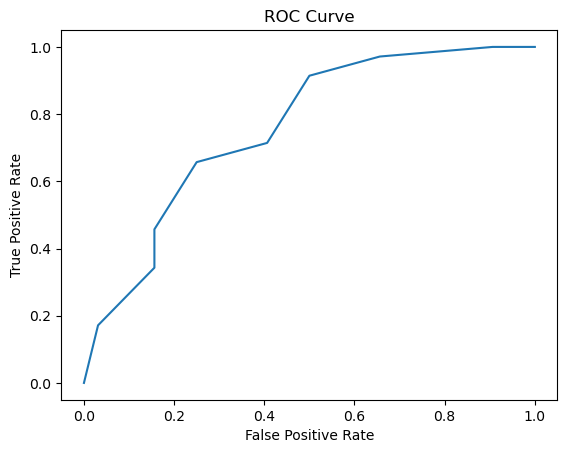

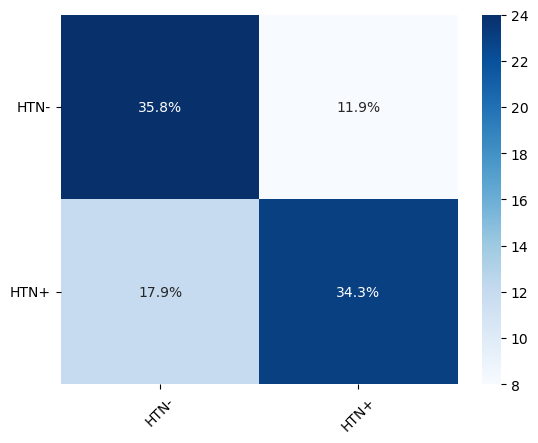

The best Acc 0.7 The best AUC 0.78 The best sensitivity 0.63 The best specificity 0.81
SEED 0 best_accc 0.7 best_aucc 0.78
FOLD enede
1 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


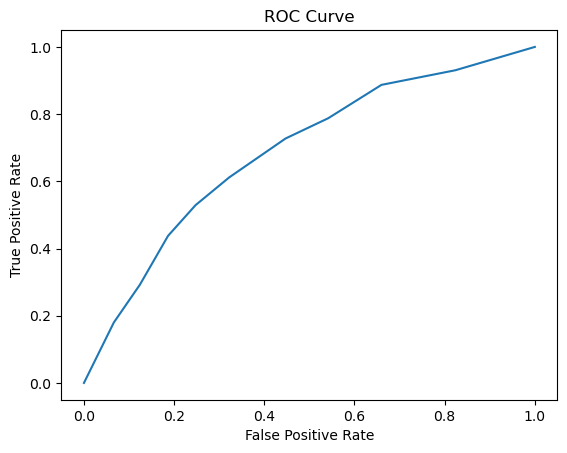

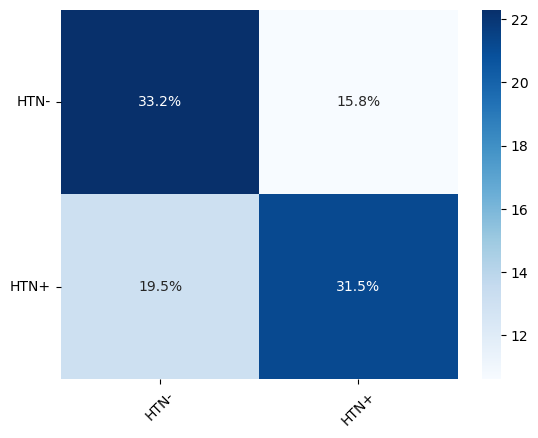

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.69
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


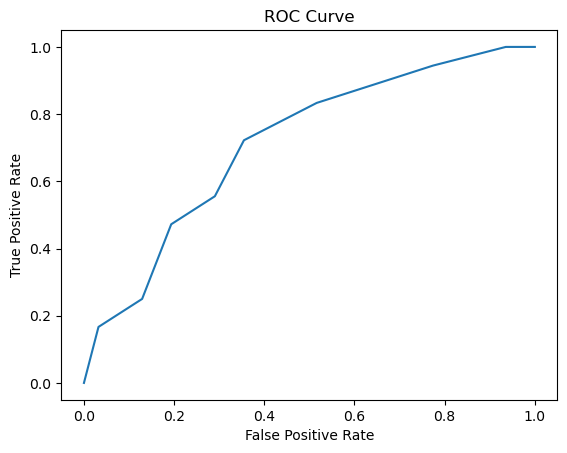

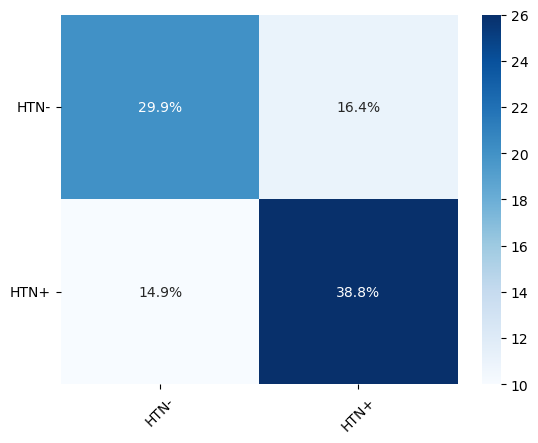

The best Acc 0.69 The best AUC 0.73 The best sensitivity 0.72 The best specificity 0.71
SEED 1 best_accc 0.69 best_aucc 0.73
FOLD enede
2 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


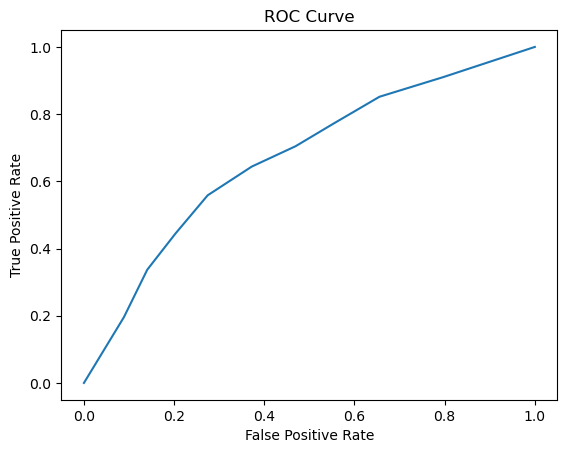

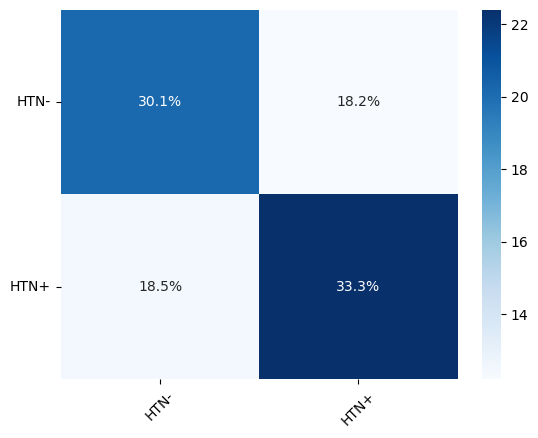

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.66
average specificity : 0.73
------------------------------
THE BEST IN ENTIRE FOLDS: 


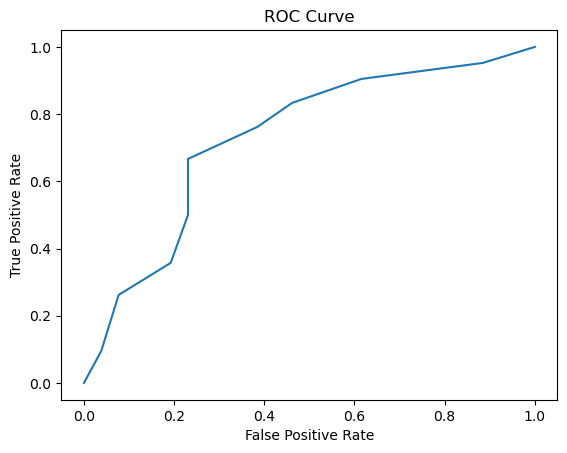

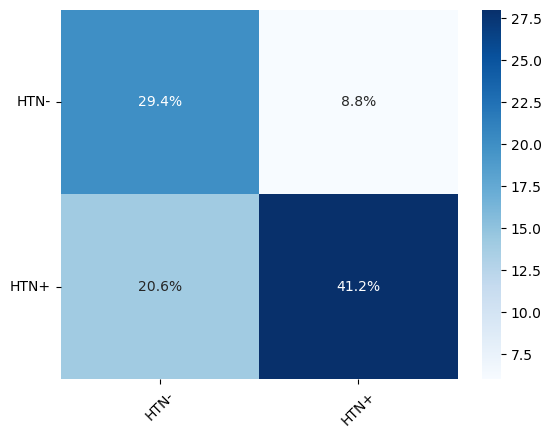

The best Acc 0.71 The best AUC 0.74 The best sensitivity 0.76 The best specificity 0.73
SEED 2 best_accc 0.71 best_aucc 0.74
FOLD enede
3 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


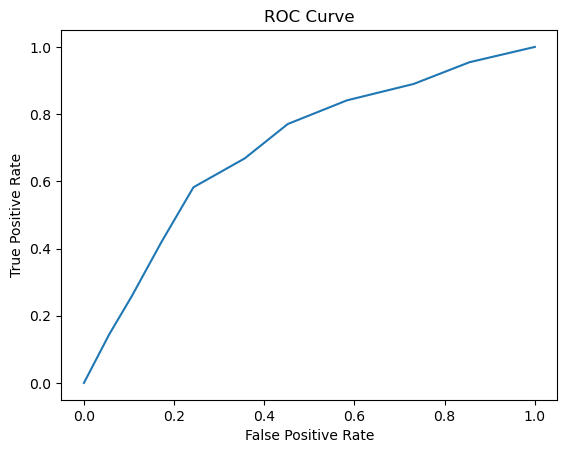

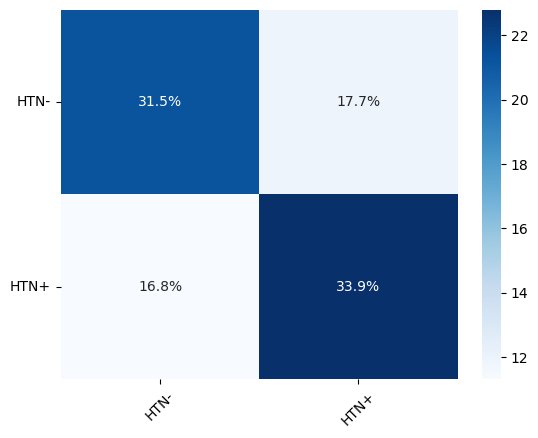

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.66
average specificity : 0.75
------------------------------
THE BEST IN ENTIRE FOLDS: 


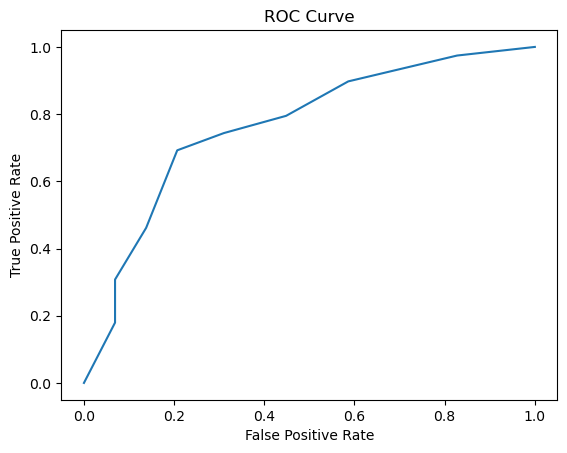

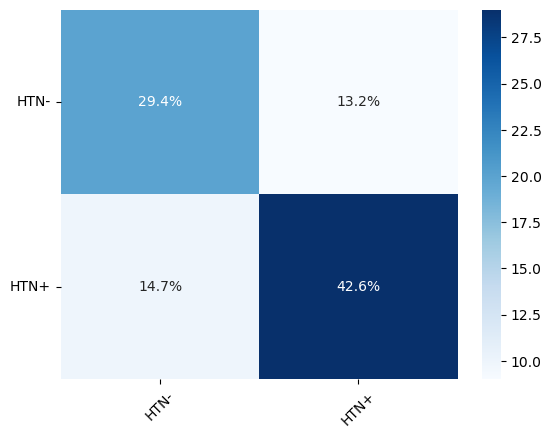

The best Acc 0.72 The best AUC 0.76 The best sensitivity 0.74 The best specificity 0.79
SEED 3 best_accc 0.72 best_aucc 0.76
FOLD enede
4 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


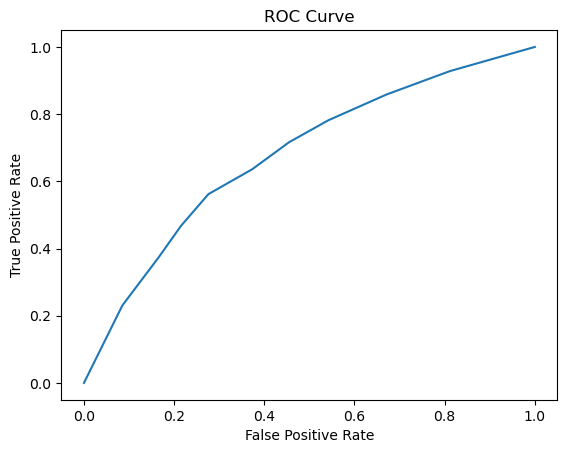

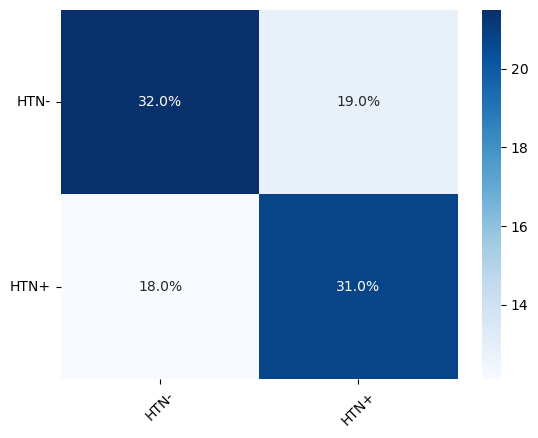

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.68
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


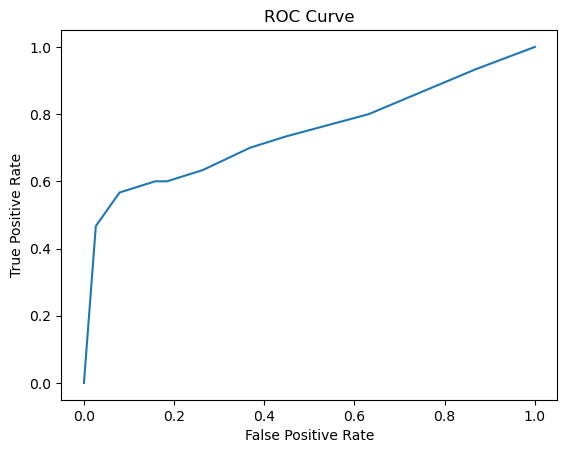

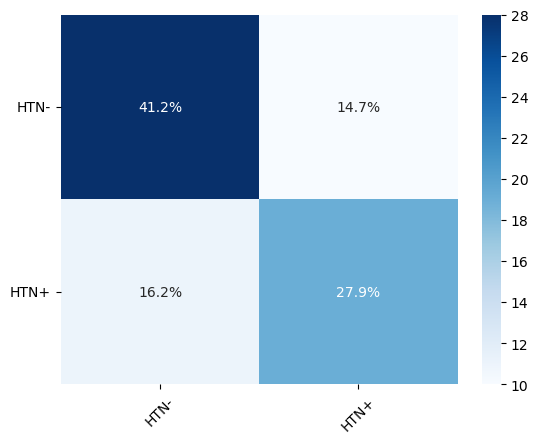

The best Acc 0.69 The best AUC 0.76 The best sensitivity 0.6 The best specificity 0.92
SEED 4 best_accc 0.69 best_aucc 0.76
FOLD enede
5 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


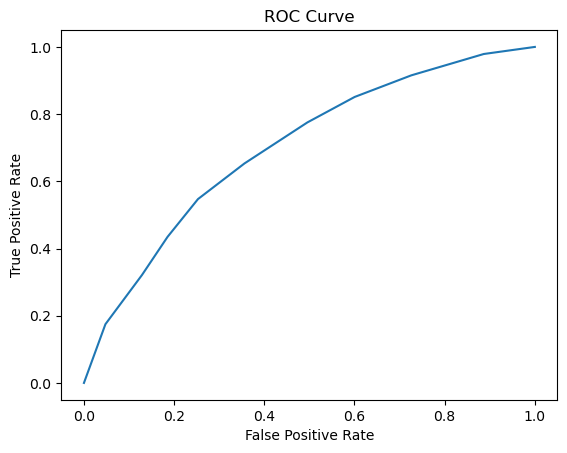

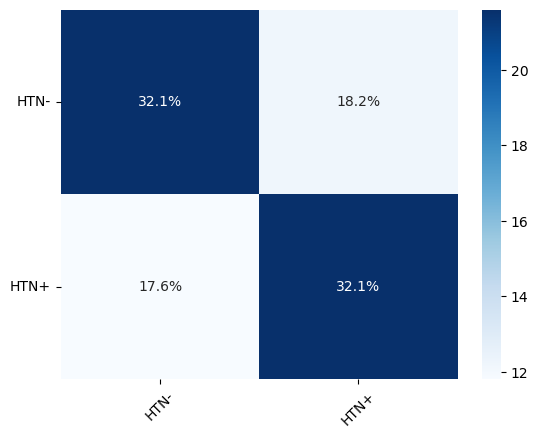

average accuracy : 0.64
average auc : 0.7
average sensitivity : 0.73
average specificity : 0.65
------------------------------
THE BEST IN ENTIRE FOLDS: 


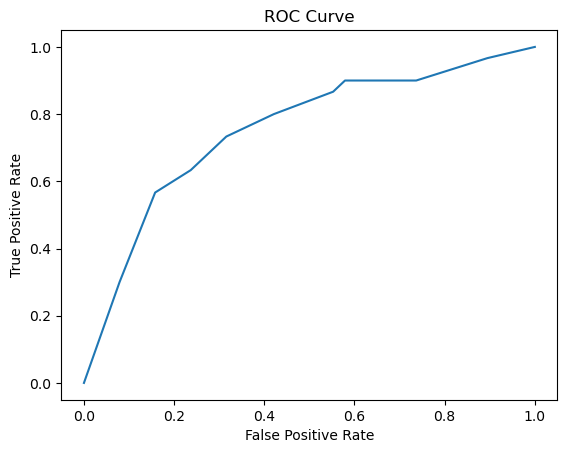

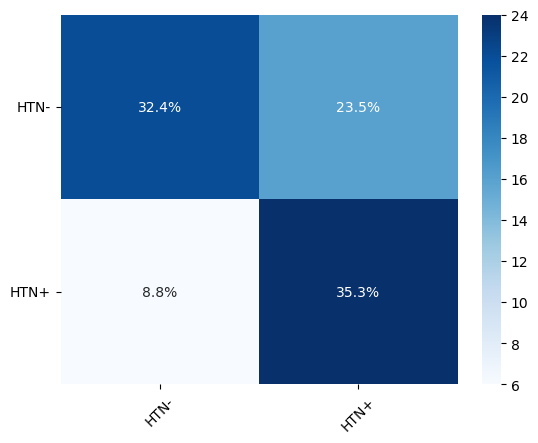

The best Acc 0.68 The best AUC 0.75 The best sensitivity 0.73 The best specificity 0.76
SEED 5 best_accc 0.68 best_aucc 0.75
FOLD enede
6 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


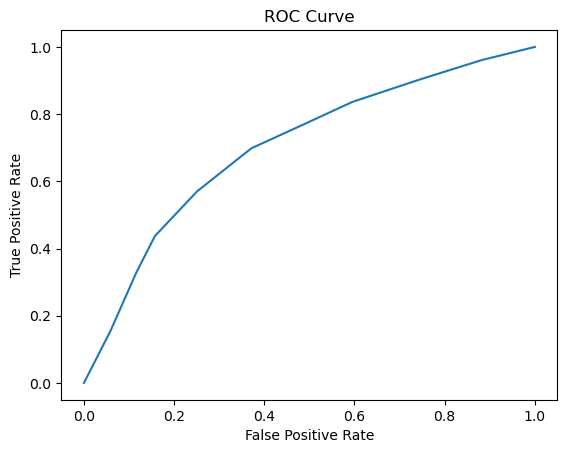

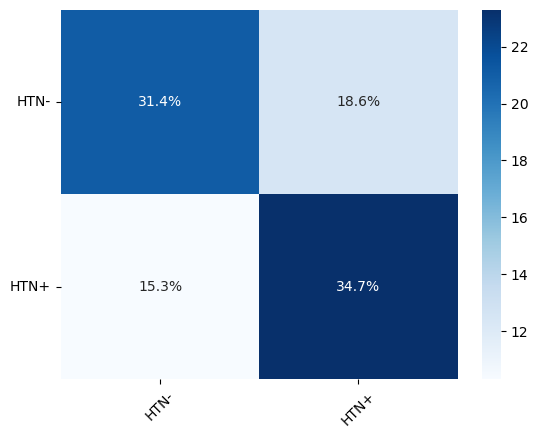

average accuracy : 0.66
average auc : 0.71
average sensitivity : 0.67
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


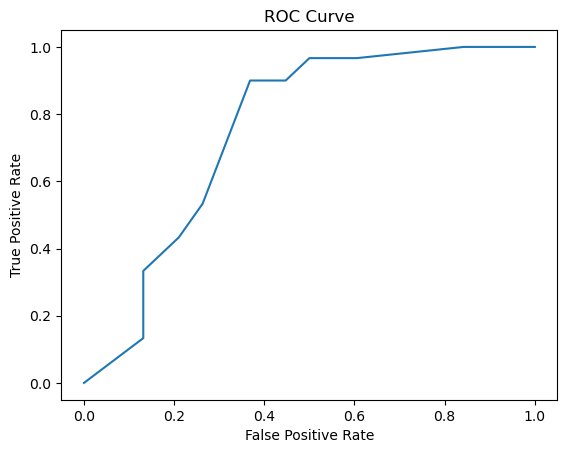

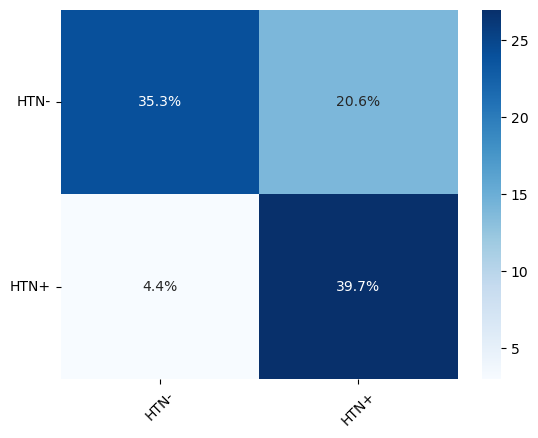

The best Acc 0.75 The best AUC 0.75 The best sensitivity 0.9 The best specificity 0.63
SEED 6 best_accc 0.75 best_aucc 0.75
FOLD enede
7 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


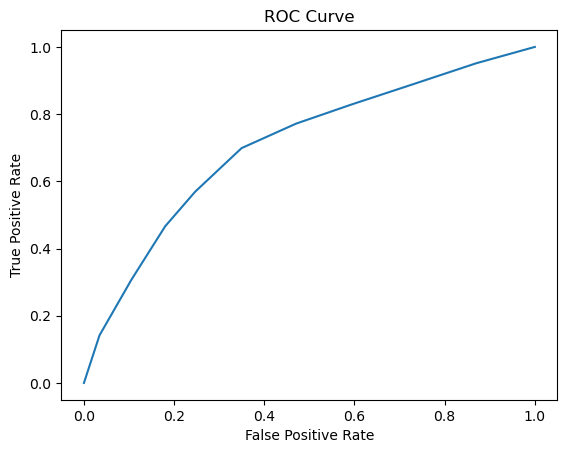

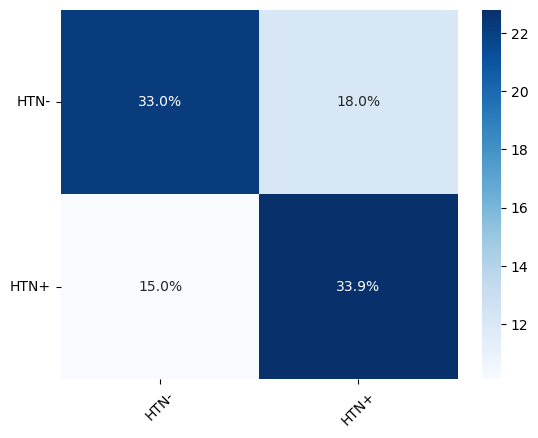

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.67
average specificity : 0.74
------------------------------
THE BEST IN ENTIRE FOLDS: 


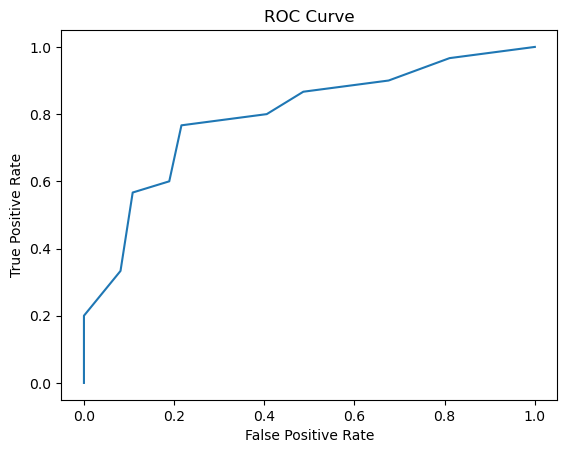

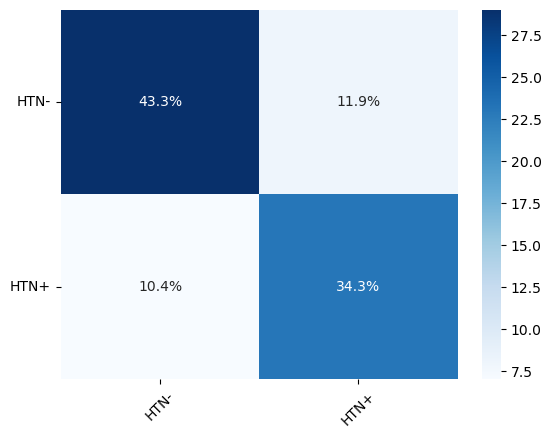

The best Acc 0.78 The best AUC 0.8 The best sensitivity 0.77 The best specificity 0.81
SEED 7 best_accc 0.78 best_aucc 0.8
FOLD enede
8 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


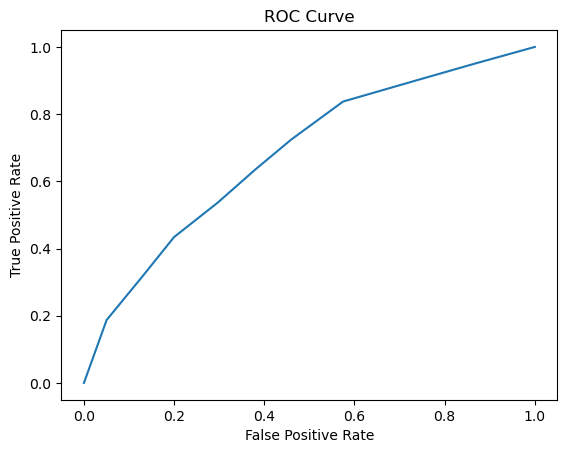

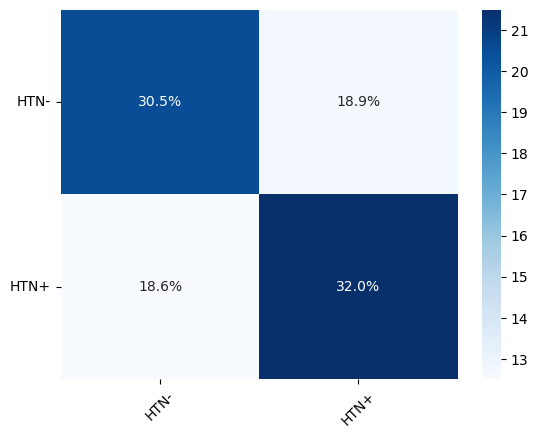

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.65
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


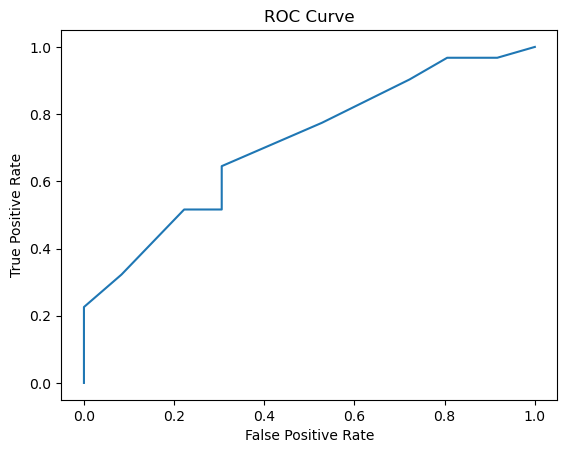

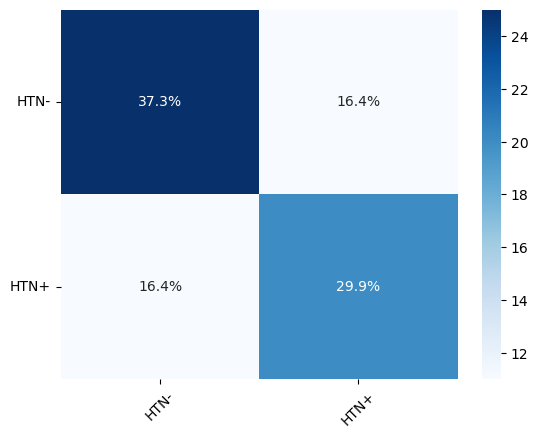

The best Acc 0.67 The best AUC 0.72 The best sensitivity 0.52 The best specificity 0.83
SEED 8 best_accc 0.67 best_aucc 0.72
FOLD enede
9 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


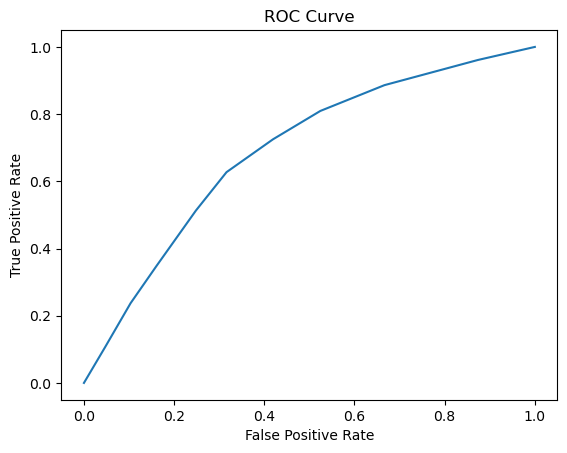

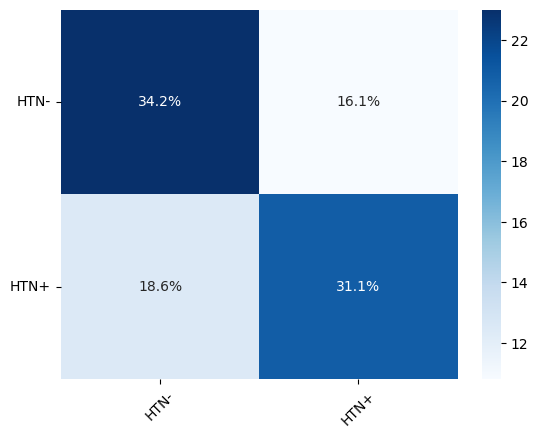

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.78
average specificity : 0.62
------------------------------
THE BEST IN ENTIRE FOLDS: 


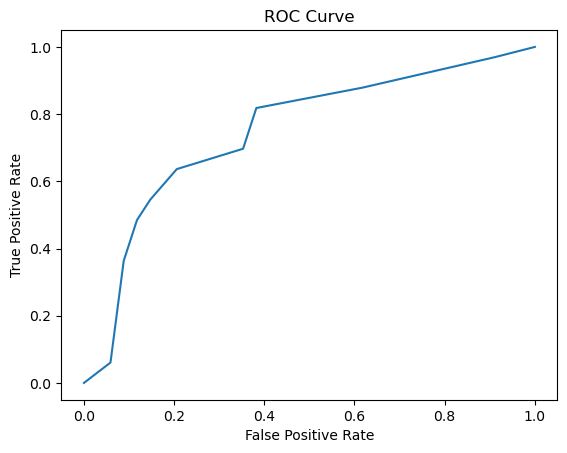

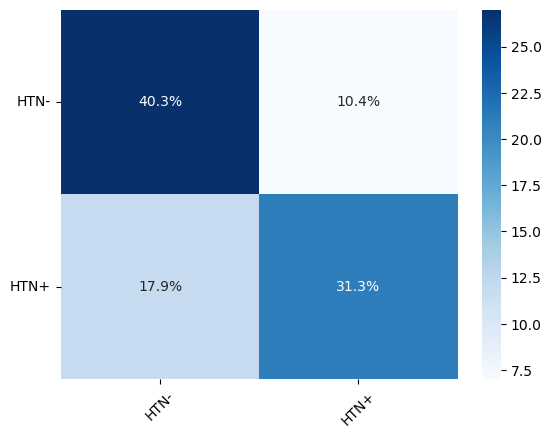

The best Acc 0.72 The best AUC 0.74 The best sensitivity 0.82 The best specificity 0.62
SEED 9 best_accc 0.72 best_aucc 0.74
FOLD enede
10 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


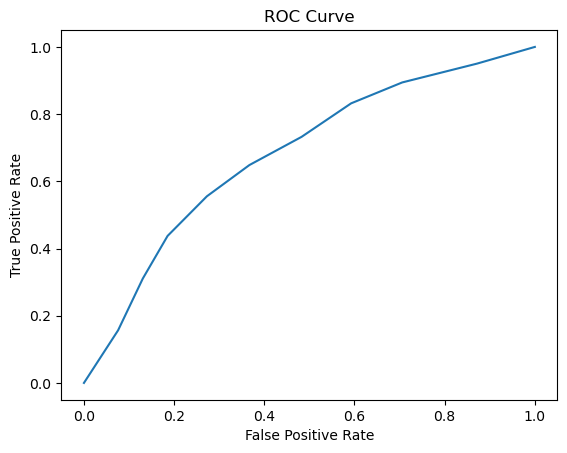

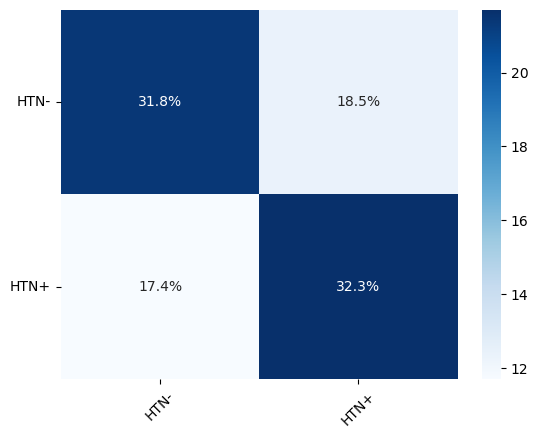

average accuracy : 0.64
average auc : 0.69
average sensitivity : 0.66
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


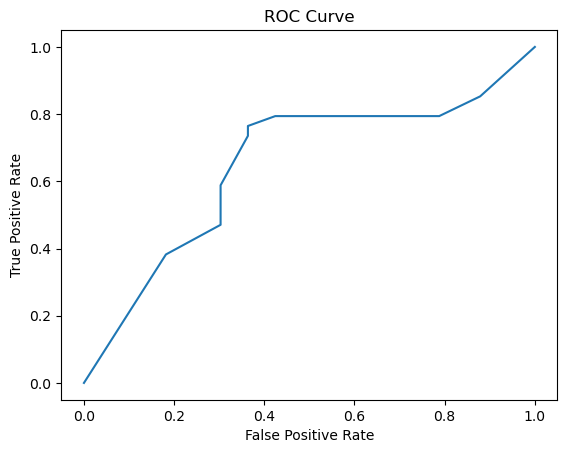

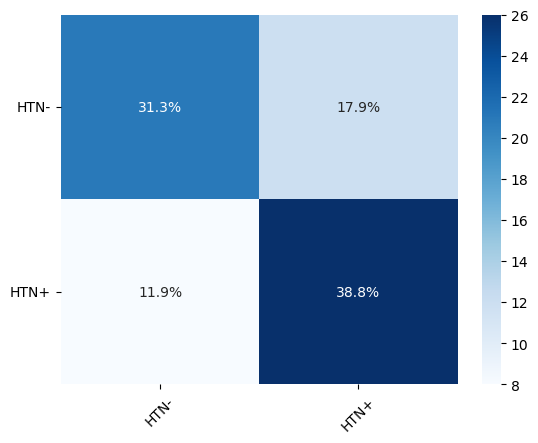

The best Acc 0.7 The best AUC 0.66 The best sensitivity 0.76 The best specificity 0.64
SEED 10 best_accc 0.7 best_aucc 0.66
FOLD enede
11 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


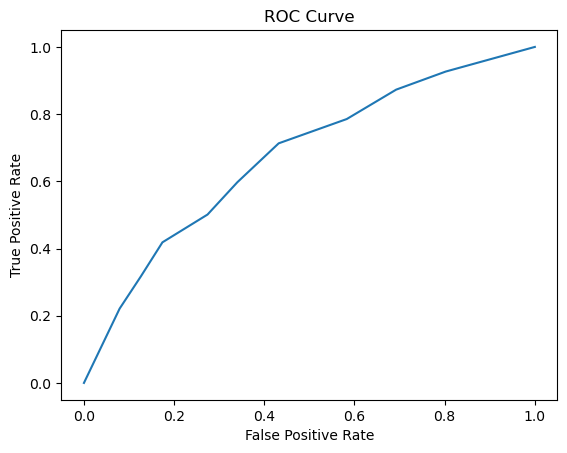

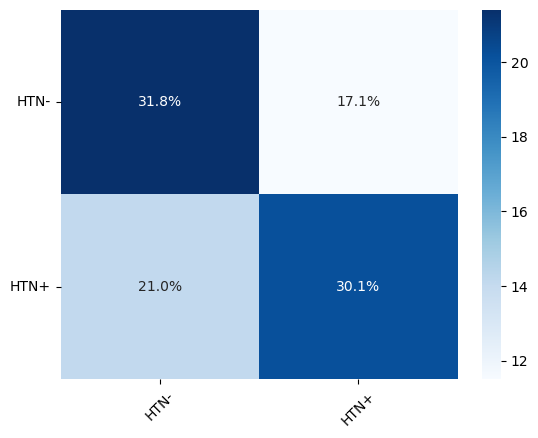

average accuracy : 0.62
average auc : 0.68
average sensitivity : 0.7
average specificity : 0.65
------------------------------
THE BEST IN ENTIRE FOLDS: 


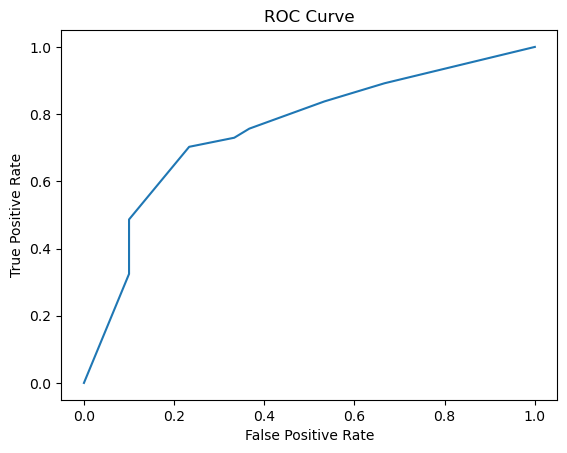

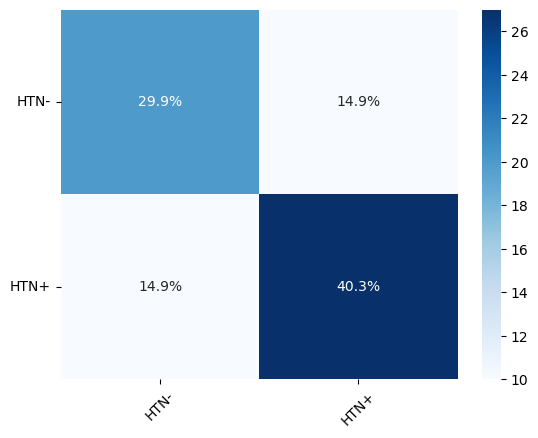

The best Acc 0.7 The best AUC 0.77 The best sensitivity 0.73 The best specificity 0.77
SEED 11 best_accc 0.7 best_aucc 0.77
FOLD enede
12 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


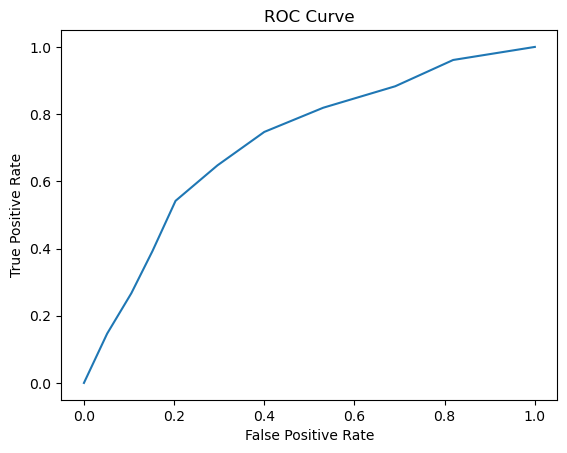

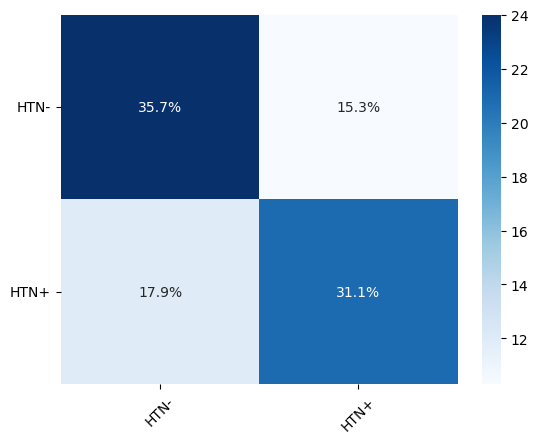

average accuracy : 0.67
average auc : 0.72
average sensitivity : 0.73
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


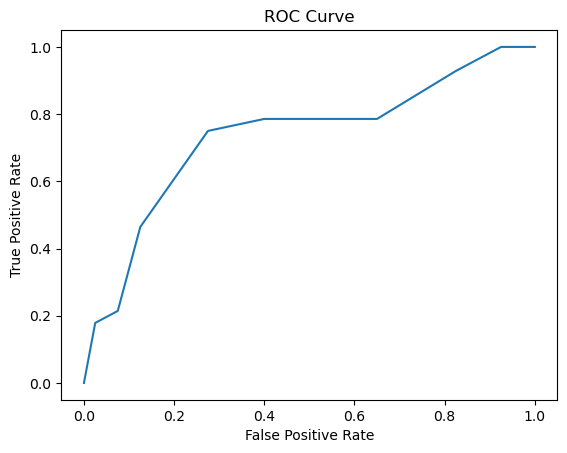

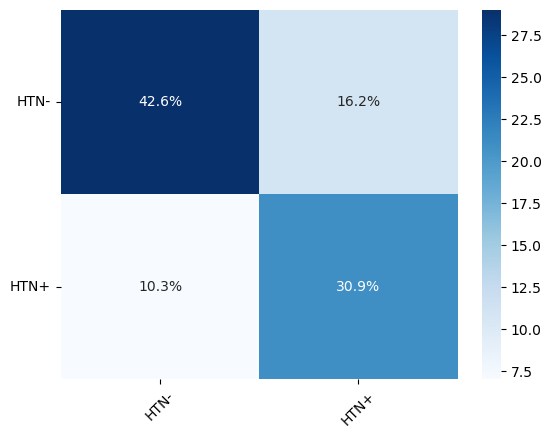

The best Acc 0.74 The best AUC 0.73 The best sensitivity 0.75 The best specificity 0.78
SEED 12 best_accc 0.74 best_aucc 0.73
FOLD enede
13 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


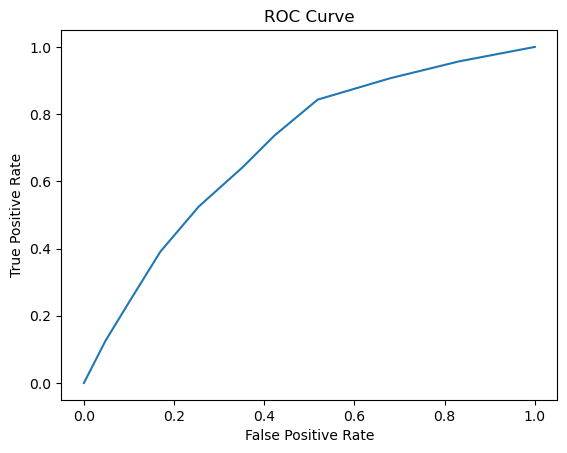

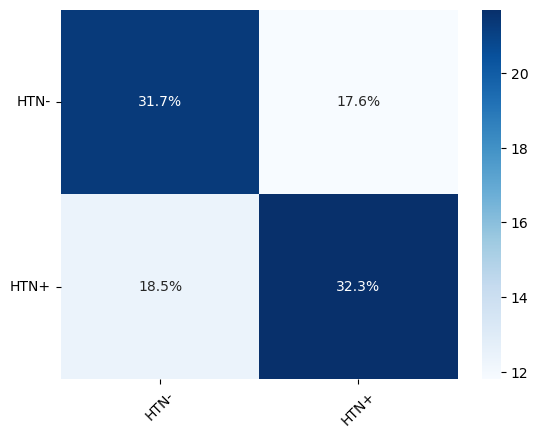

average accuracy : 0.64
average auc : 0.71
average sensitivity : 0.79
average specificity : 0.61
------------------------------
THE BEST IN ENTIRE FOLDS: 


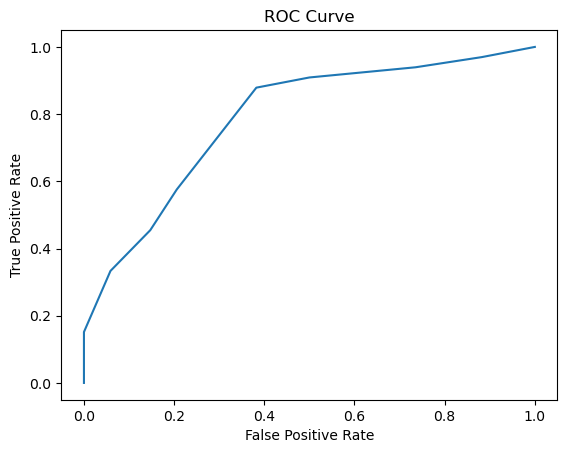

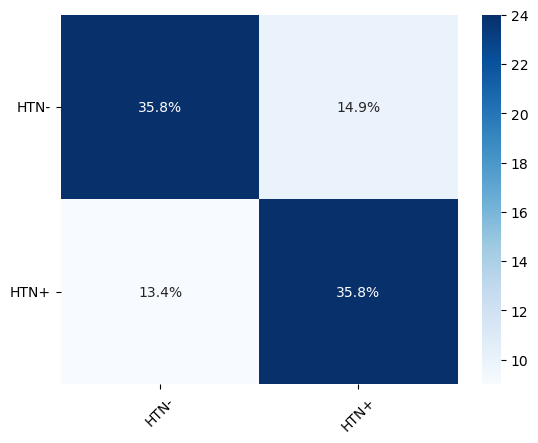

The best Acc 0.72 The best AUC 0.79 The best sensitivity 0.88 The best specificity 0.65
SEED 13 best_accc 0.72 best_aucc 0.79
FOLD enede
14 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


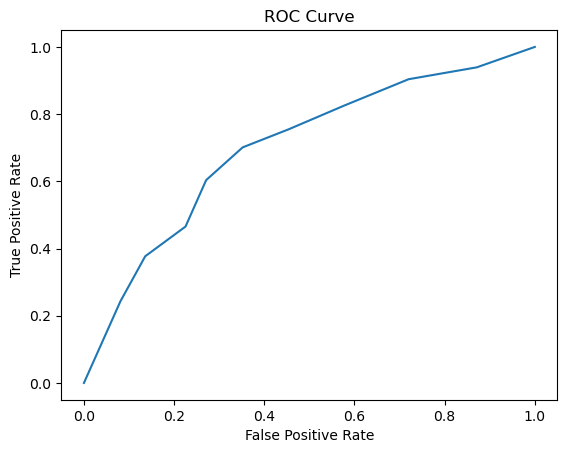

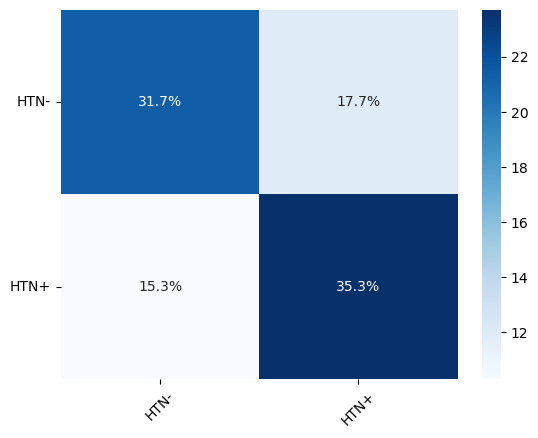

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.74
average specificity : 0.67
------------------------------
THE BEST IN ENTIRE FOLDS: 


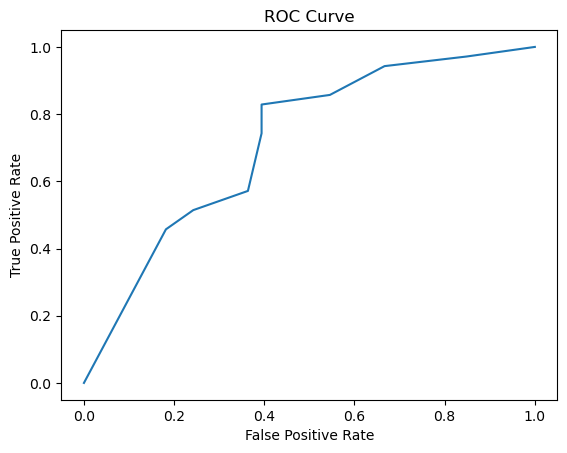

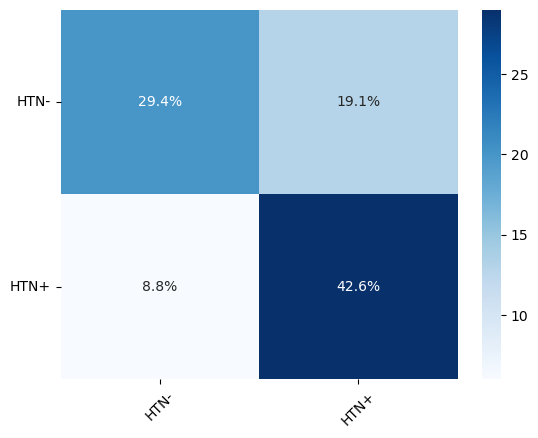

The best Acc 0.72 The best AUC 0.71 The best sensitivity 0.83 The best specificity 0.61
SEED 14 best_accc 0.72 best_aucc 0.71
FOLD enede
15 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


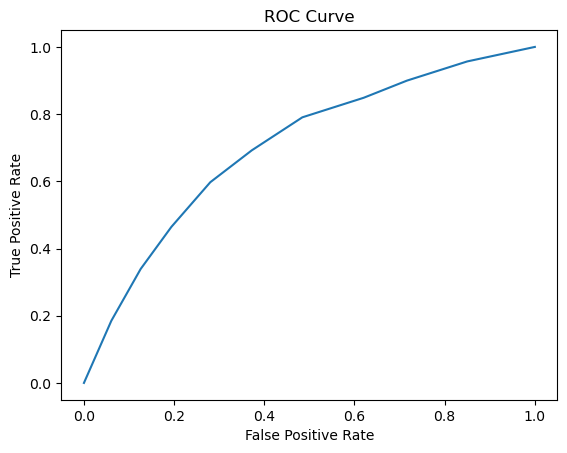

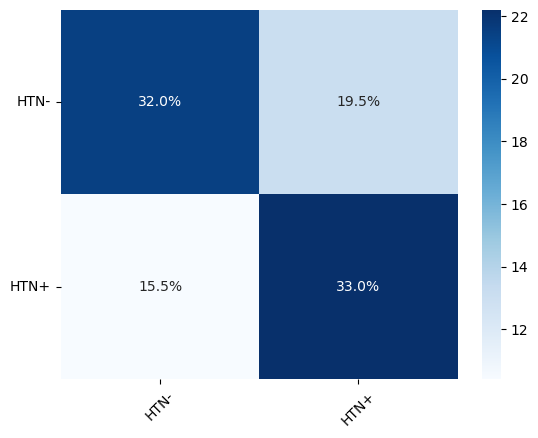

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.74
average specificity : 0.66
------------------------------
THE BEST IN ENTIRE FOLDS: 


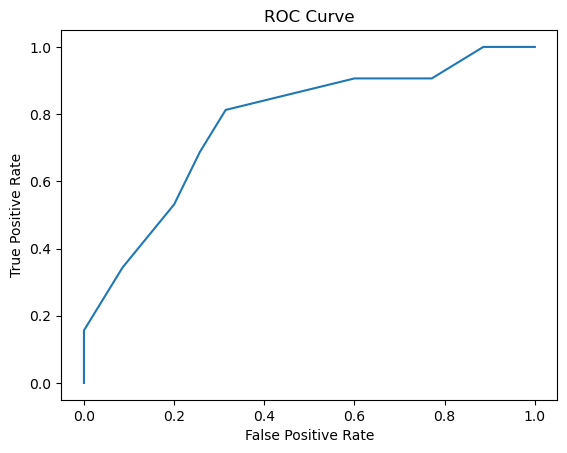

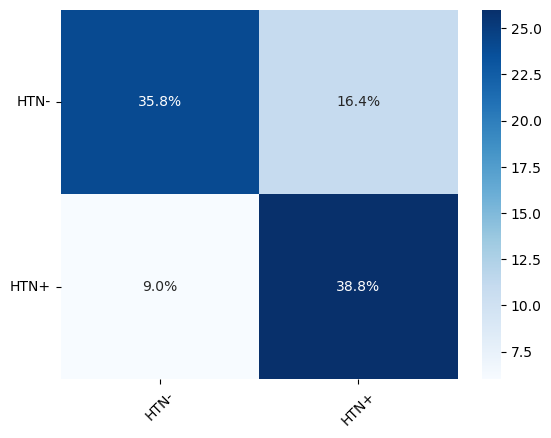

The best Acc 0.75 The best AUC 0.77 The best sensitivity 0.81 The best specificity 0.69
SEED 15 best_accc 0.75 best_aucc 0.77
FOLD enede
16 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


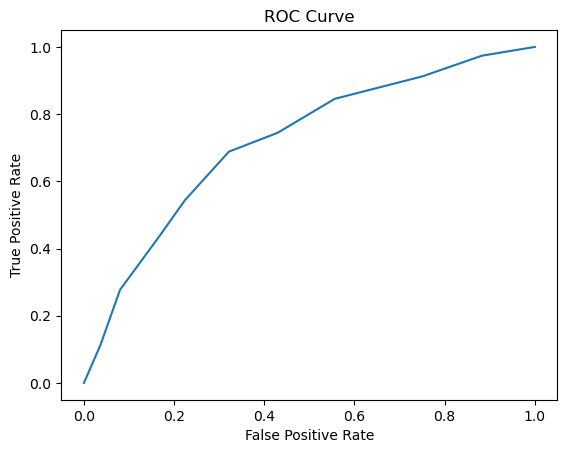

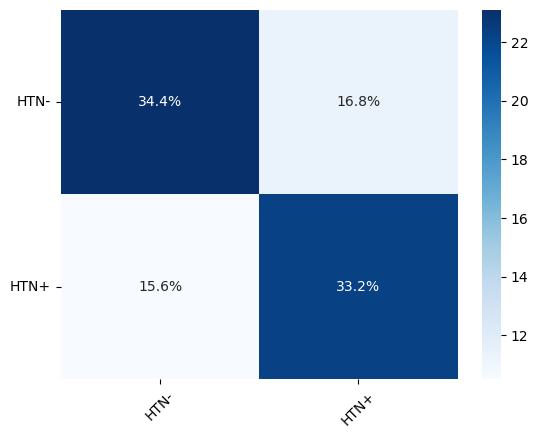

average accuracy : 0.68
average auc : 0.72
average sensitivity : 0.75
average specificity : 0.68
------------------------------
THE BEST IN ENTIRE FOLDS: 


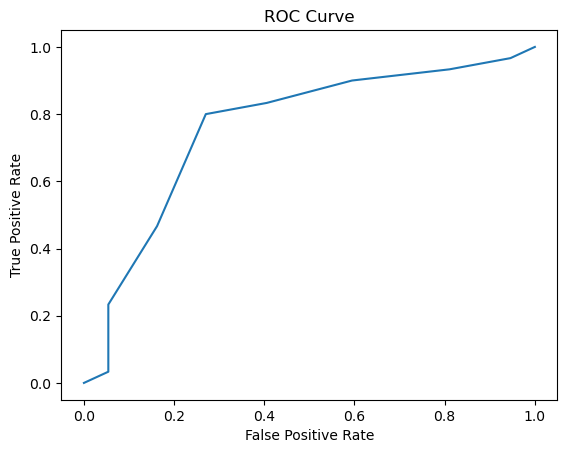

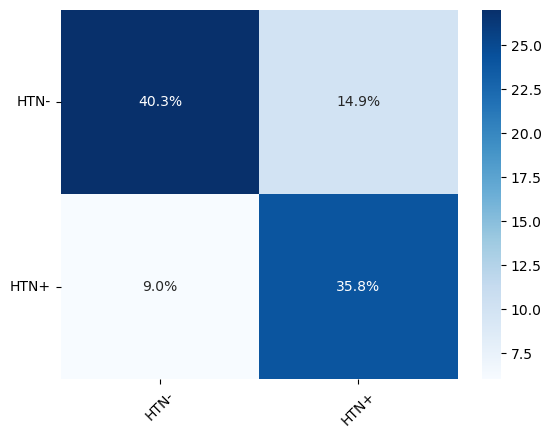

The best Acc 0.76 The best AUC 0.77 The best sensitivity 0.8 The best specificity 0.76
SEED 16 best_accc 0.76 best_aucc 0.77
FOLD enede
17 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


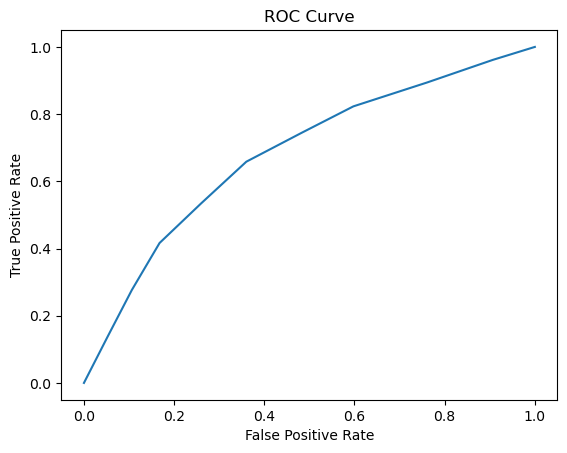

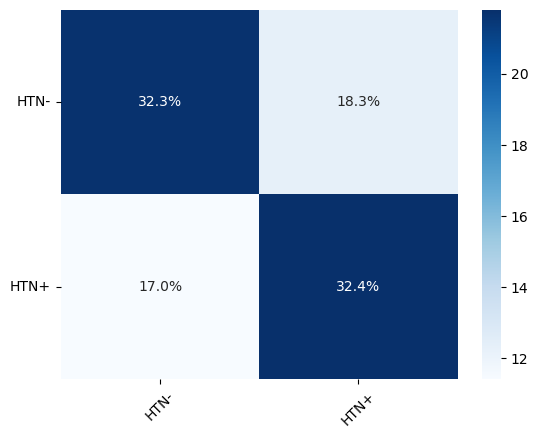

average accuracy : 0.65
average auc : 0.69
average sensitivity : 0.69
average specificity : 0.71
------------------------------
THE BEST IN ENTIRE FOLDS: 


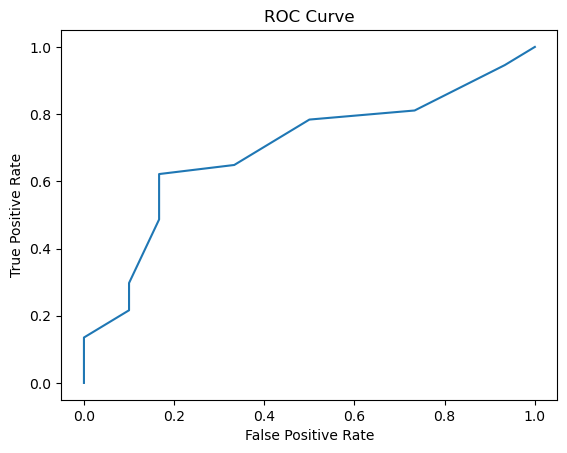

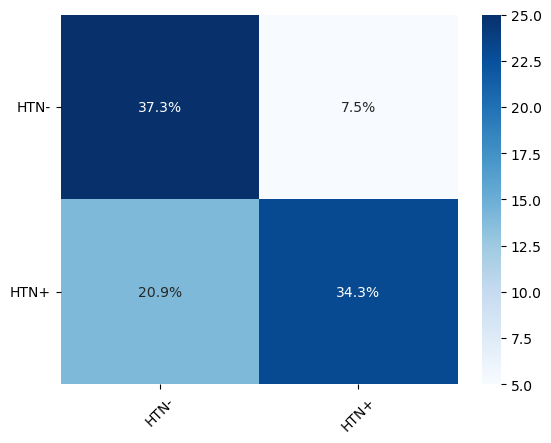

The best Acc 0.72 The best AUC 0.71 The best sensitivity 0.62 The best specificity 0.83
SEED 17 best_accc 0.72 best_aucc 0.71
FOLD enede
18 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


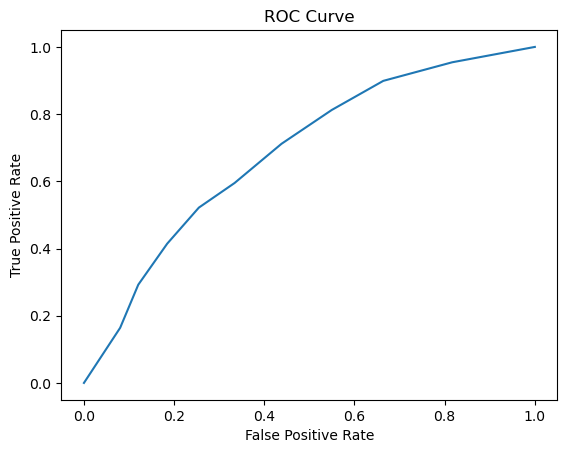

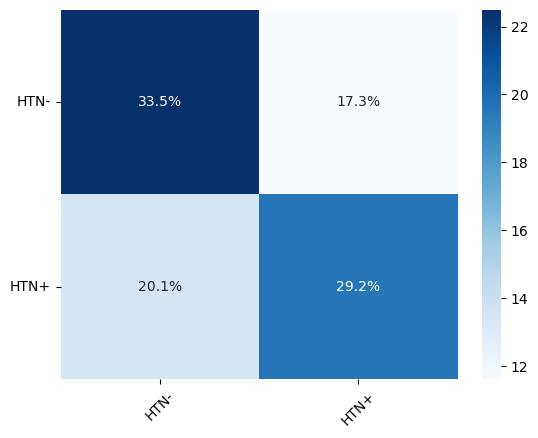

average accuracy : 0.63
average auc : 0.69
average sensitivity : 0.81
average specificity : 0.55
------------------------------
THE BEST IN ENTIRE FOLDS: 


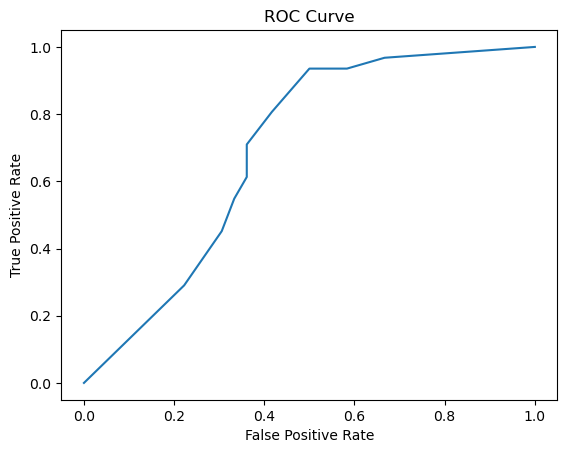

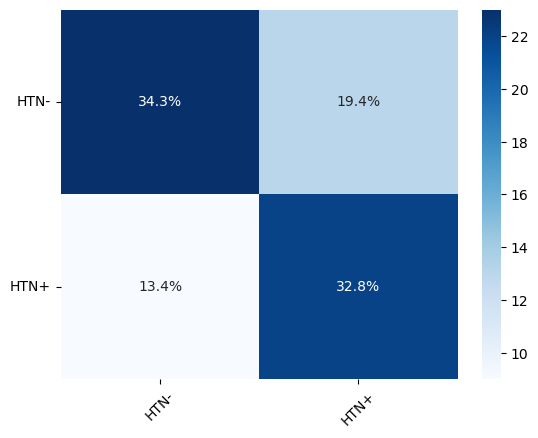

The best Acc 0.67 The best AUC 0.7 The best sensitivity 0.94 The best specificity 0.5
SEED 18 best_accc 0.67 best_aucc 0.7
FOLD enede
19 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


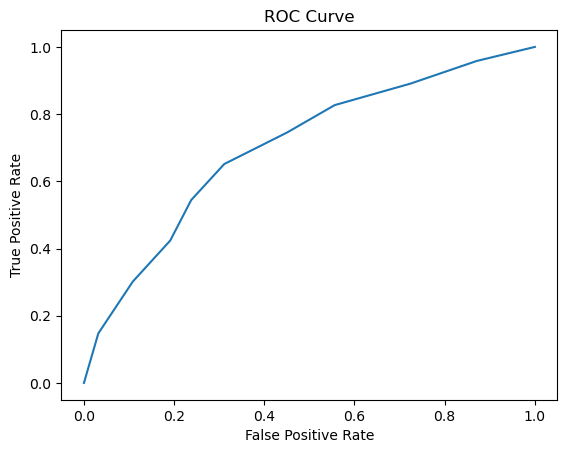

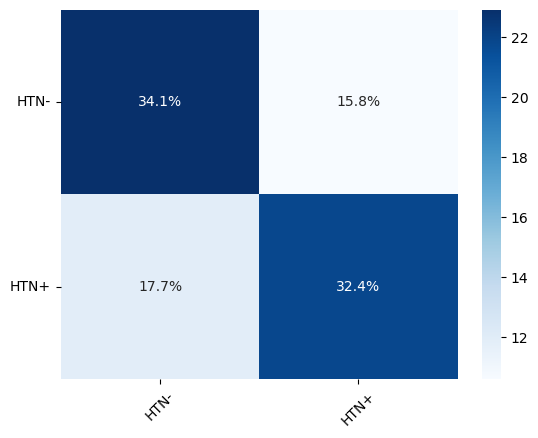

average accuracy : 0.67
average auc : 0.71
average sensitivity : 0.65
average specificity : 0.73
------------------------------
THE BEST IN ENTIRE FOLDS: 


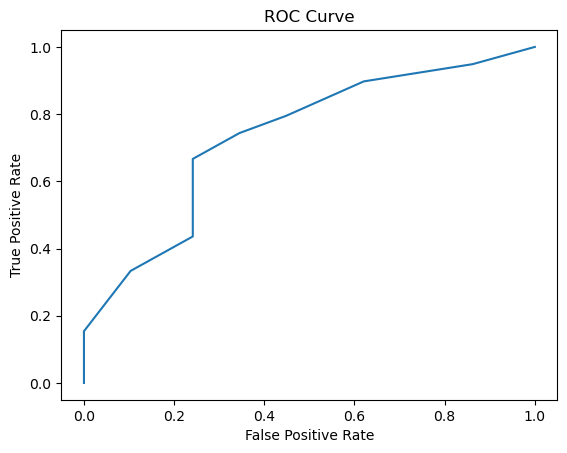

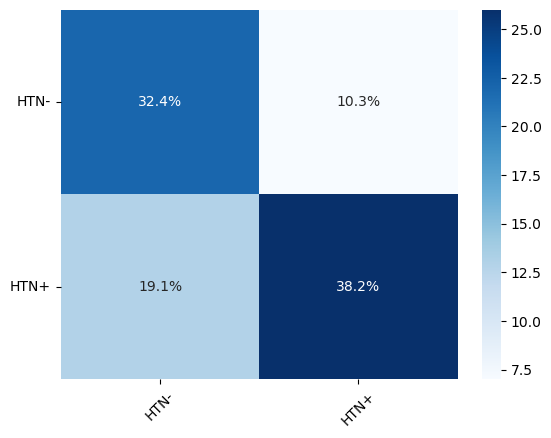

The best Acc 0.71 The best AUC 0.73 The best sensitivity 0.67 The best specificity 0.76
SEED 19 best_accc 0.71 best_aucc 0.73
FOLD enede
20 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


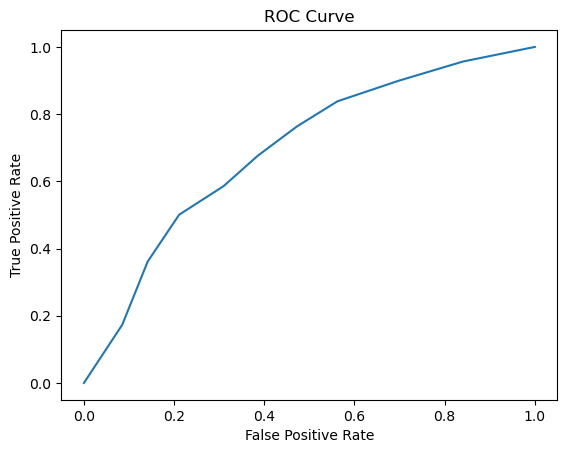

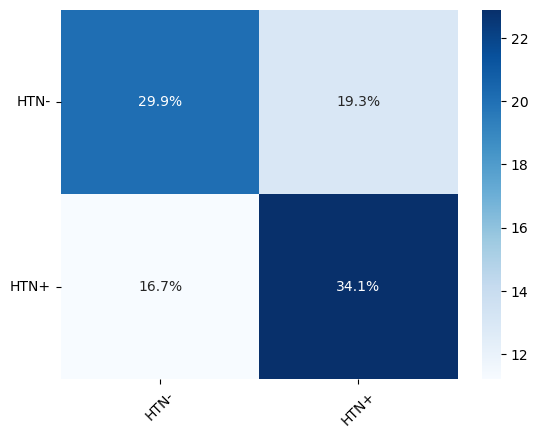

average accuracy : 0.64
average auc : 0.7
average sensitivity : 0.7
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


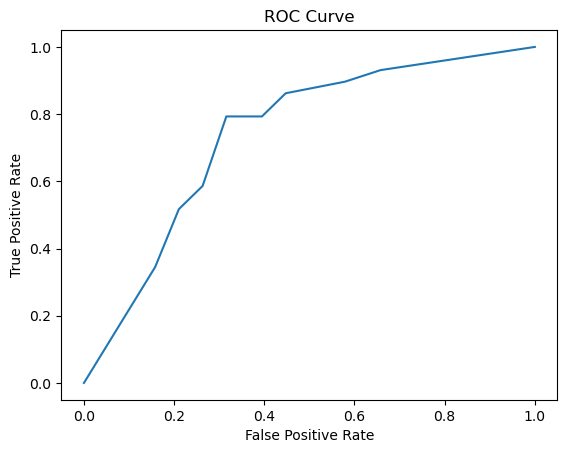

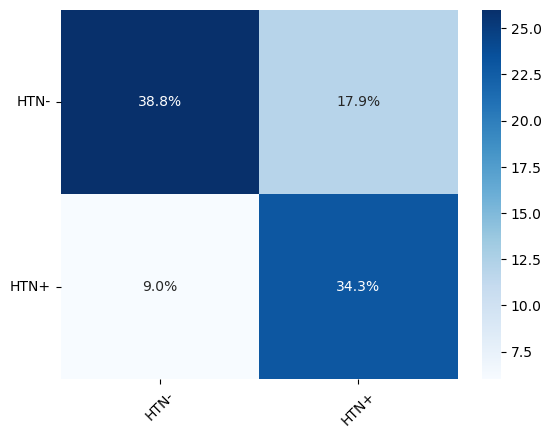

The best Acc 0.73 The best AUC 0.73 The best sensitivity 0.79 The best specificity 0.71
SEED 20 best_accc 0.73 best_aucc 0.73
FOLD enede
21 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


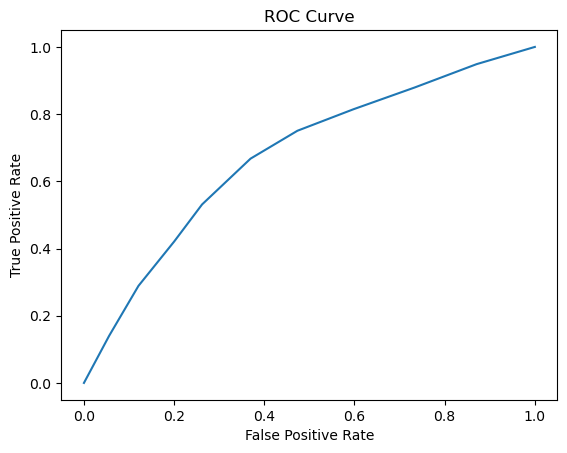

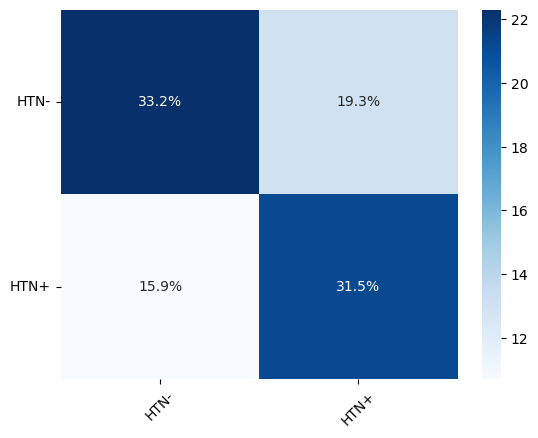

average accuracy : 0.65
average auc : 0.68
average sensitivity : 0.69
average specificity : 0.67
------------------------------
THE BEST IN ENTIRE FOLDS: 


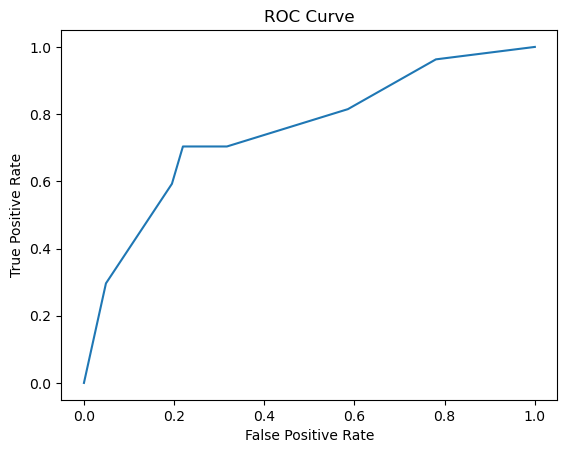

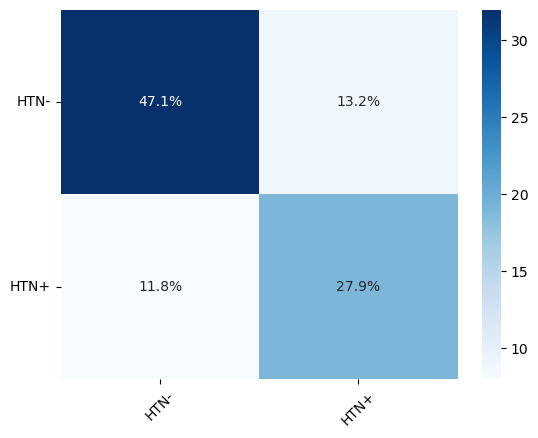

The best Acc 0.75 The best AUC 0.75 The best sensitivity 0.7 The best specificity 0.78
SEED 21 best_accc 0.75 best_aucc 0.75
FOLD enede
22 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


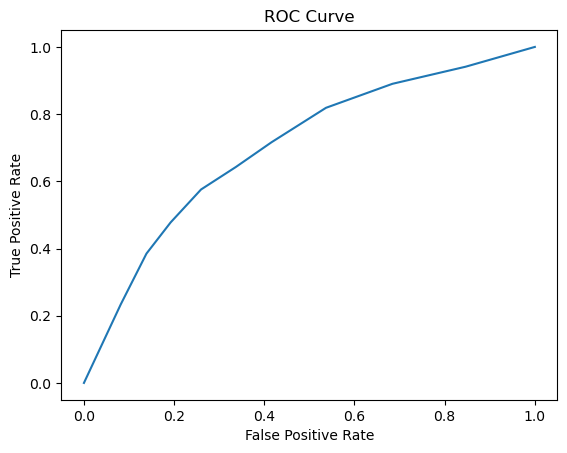

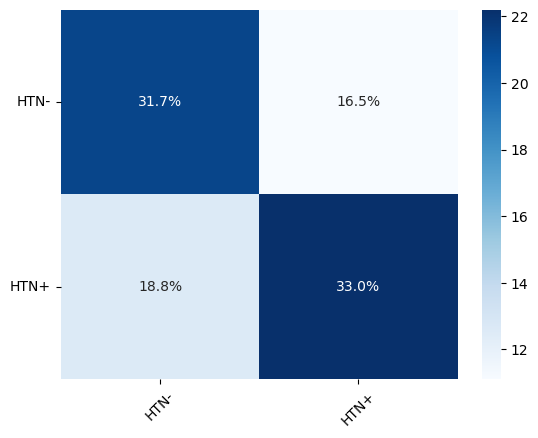

average accuracy : 0.65
average auc : 0.71
average sensitivity : 0.73
average specificity : 0.66
------------------------------
THE BEST IN ENTIRE FOLDS: 


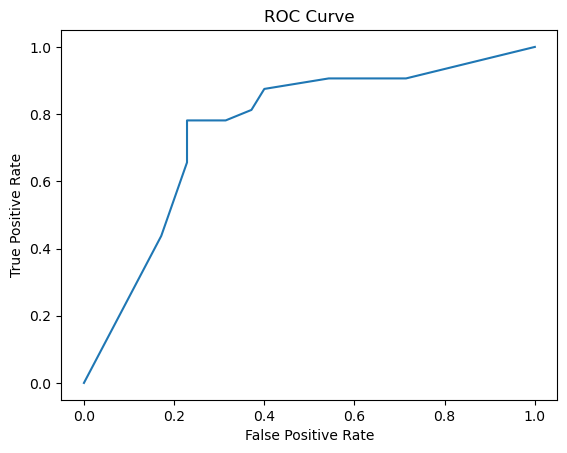

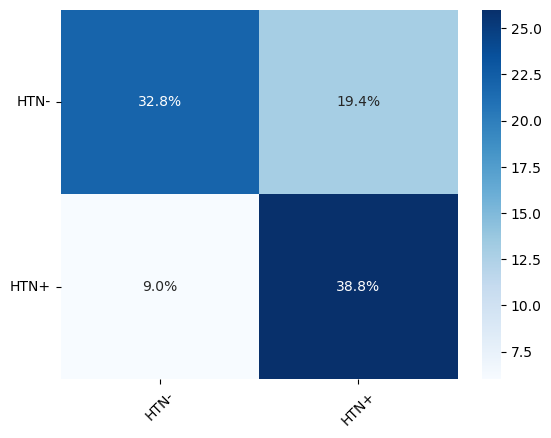

The best Acc 0.72 The best AUC 0.75 The best sensitivity 0.78 The best specificity 0.77
SEED 22 best_accc 0.72 best_aucc 0.75
FOLD enede
23 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


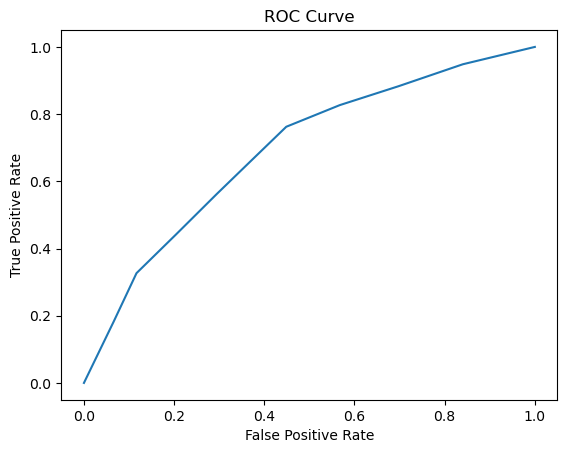

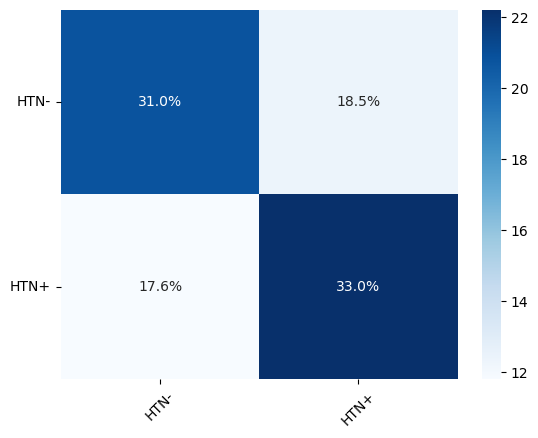

average accuracy : 0.64
average auc : 0.69
average sensitivity : 0.68
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


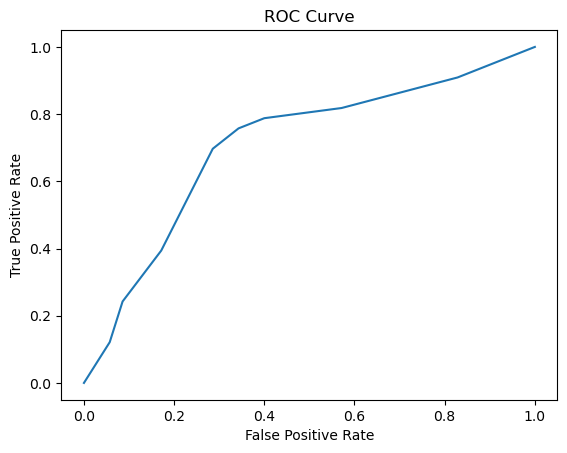

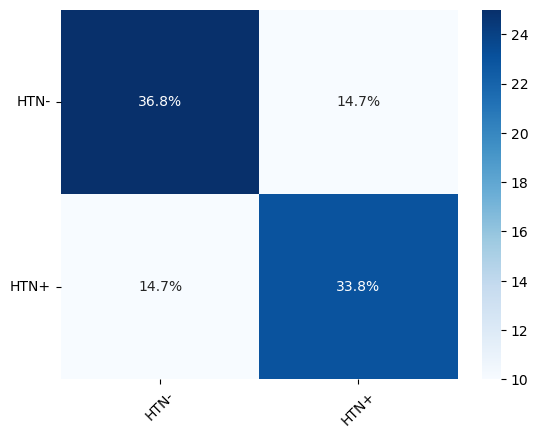

The best Acc 0.71 The best AUC 0.7 The best sensitivity 0.76 The best specificity 0.71
SEED 23 best_accc 0.71 best_aucc 0.7
FOLD enede
24 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


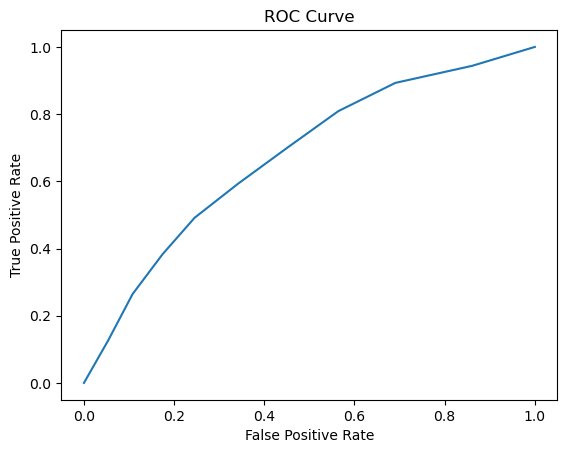

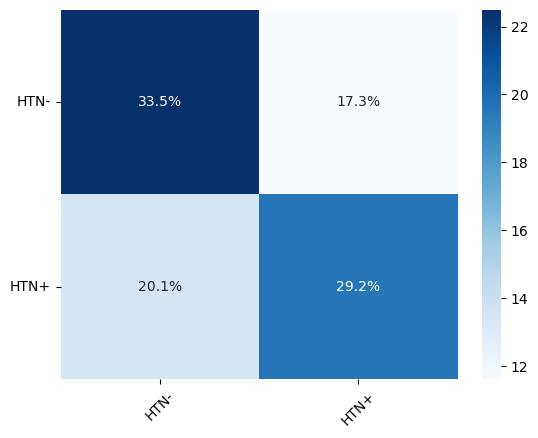

average accuracy : 0.63
average auc : 0.68
average sensitivity : 0.67
average specificity : 0.68
------------------------------
THE BEST IN ENTIRE FOLDS: 


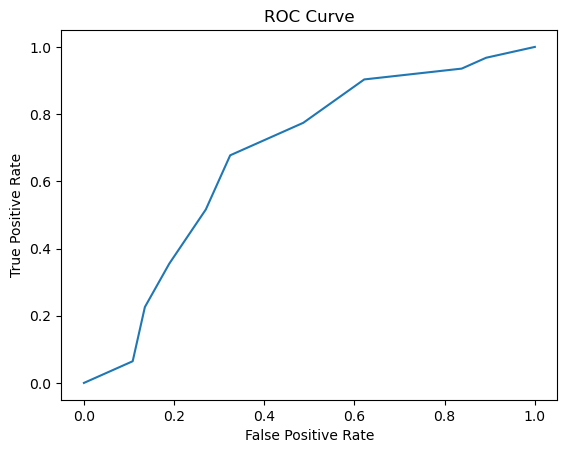

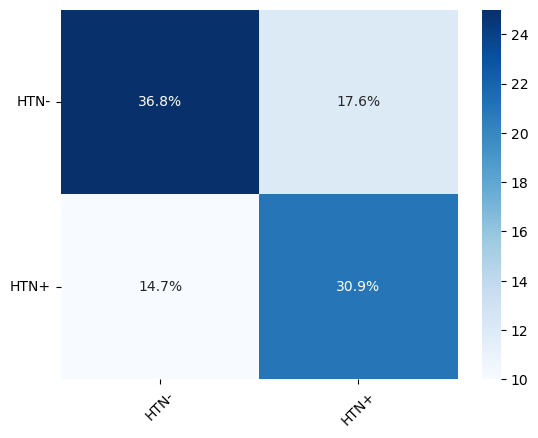

The best Acc 0.68 The best AUC 0.68 The best sensitivity 0.74 The best specificity 0.65
SEED 24 best_accc 0.68 best_aucc 0.68
FOLD enede
25 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


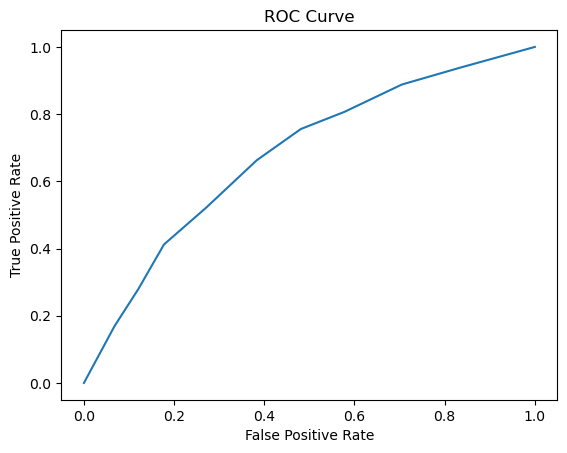

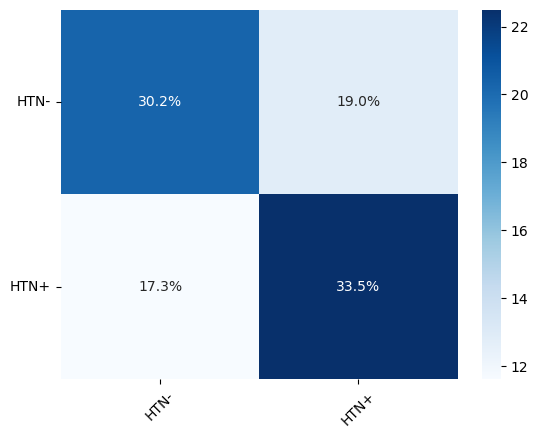

average accuracy : 0.64
average auc : 0.68
average sensitivity : 0.67
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


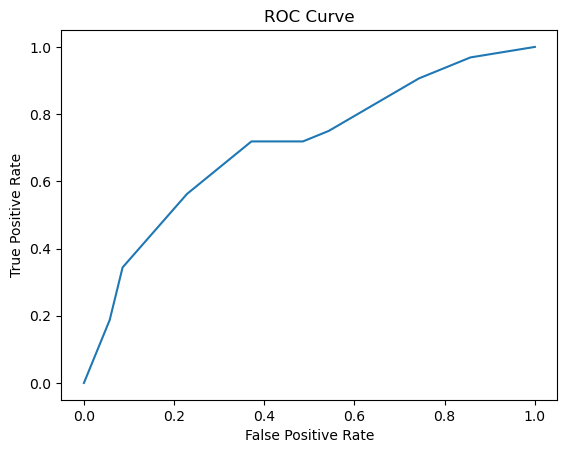

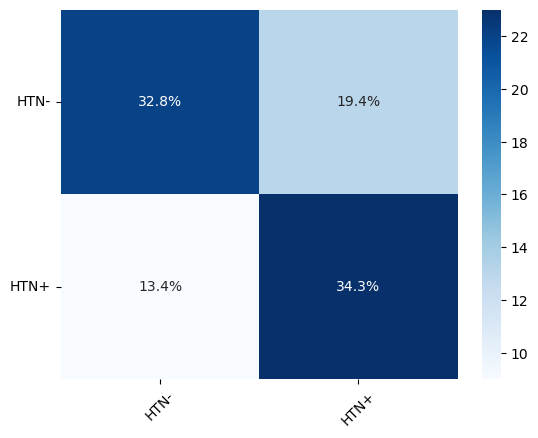

The best Acc 0.67 The best AUC 0.71 The best sensitivity 0.69 The best specificity 0.74
SEED 25 best_accc 0.67 best_aucc 0.71
FOLD enede
26 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


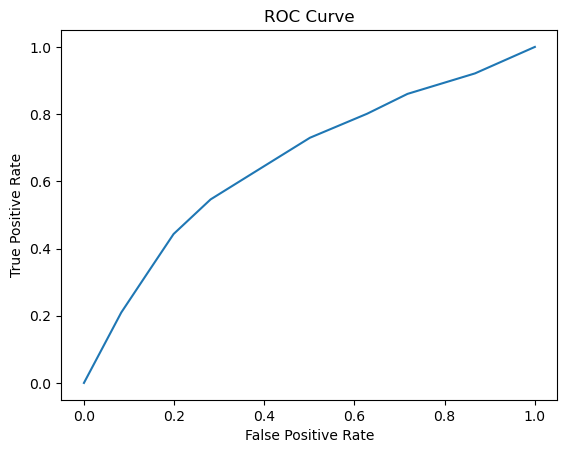

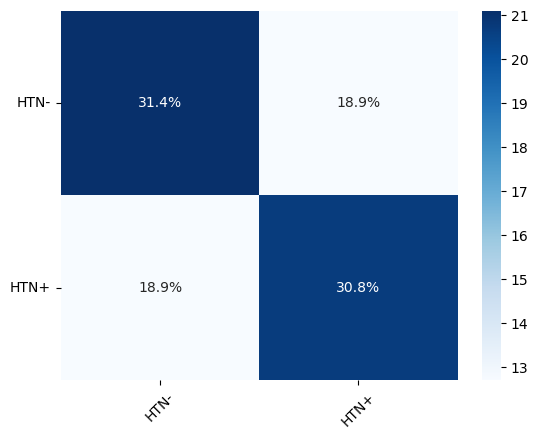

average accuracy : 0.62
average auc : 0.67
average sensitivity : 0.6
average specificity : 0.74
------------------------------
THE BEST IN ENTIRE FOLDS: 


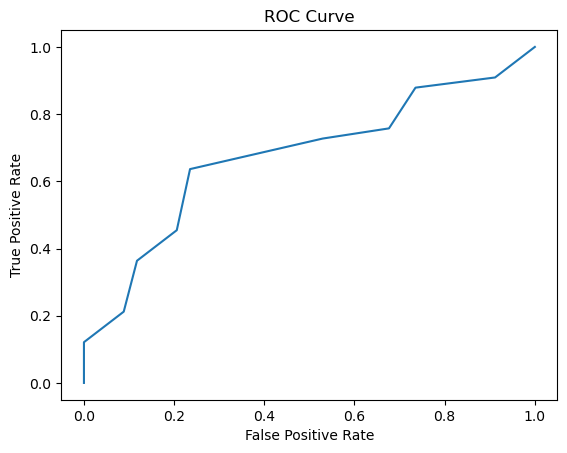

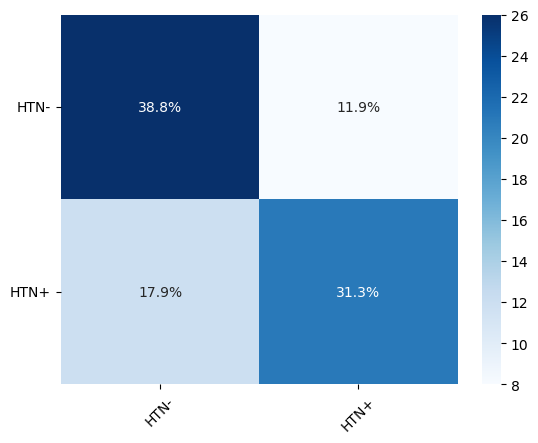

The best Acc 0.7 The best AUC 0.67 The best sensitivity 0.67 The best specificity 0.76
SEED 26 best_accc 0.7 best_aucc 0.67
FOLD enede
27 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


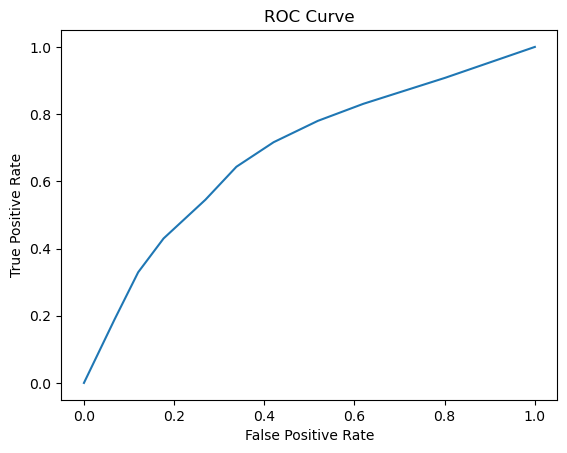

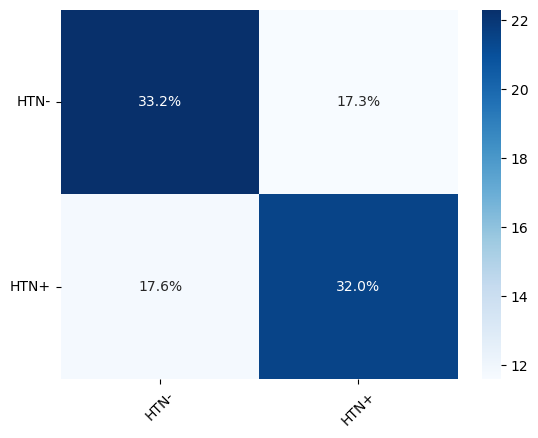

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.69
average specificity : 0.69
------------------------------
THE BEST IN ENTIRE FOLDS: 


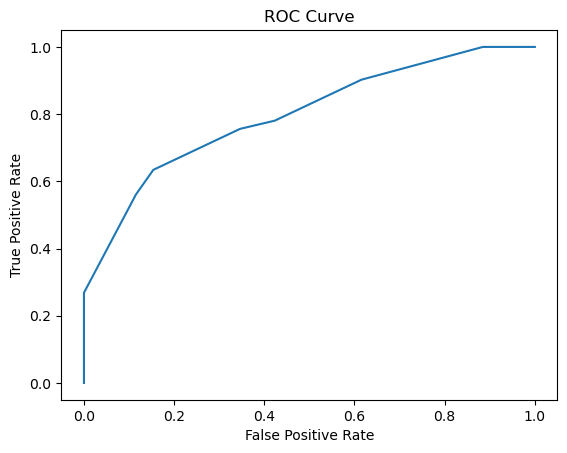

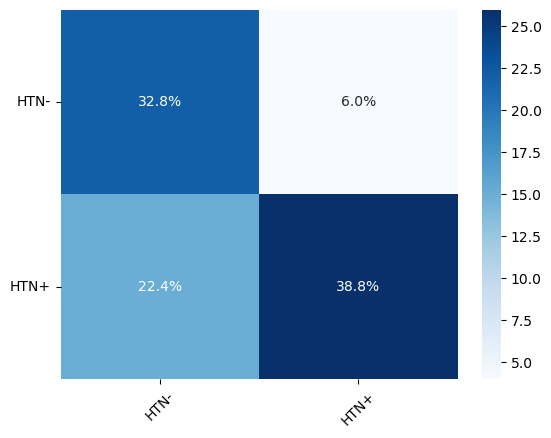

The best Acc 0.72 The best AUC 0.8 The best sensitivity 0.76 The best specificity 0.81
SEED 27 best_accc 0.72 best_aucc 0.8
FOLD enede
28 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


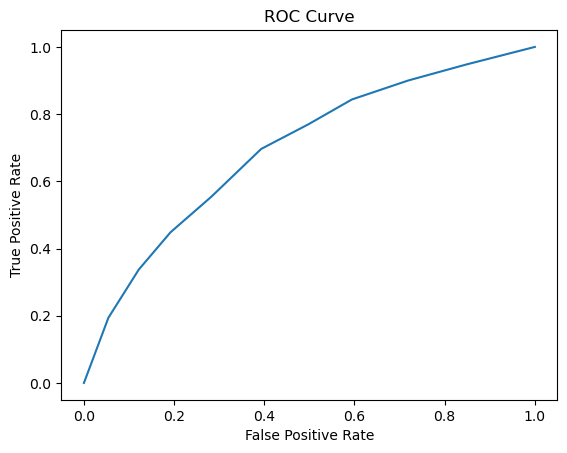

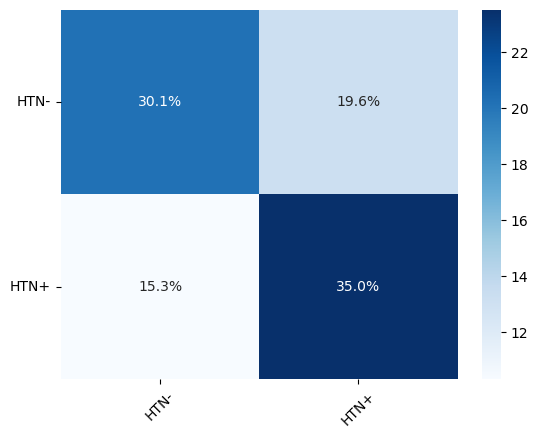

average accuracy : 0.65
average auc : 0.7
average sensitivity : 0.67
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


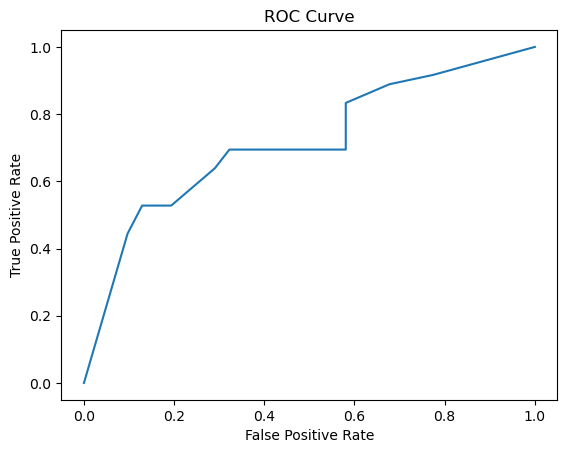

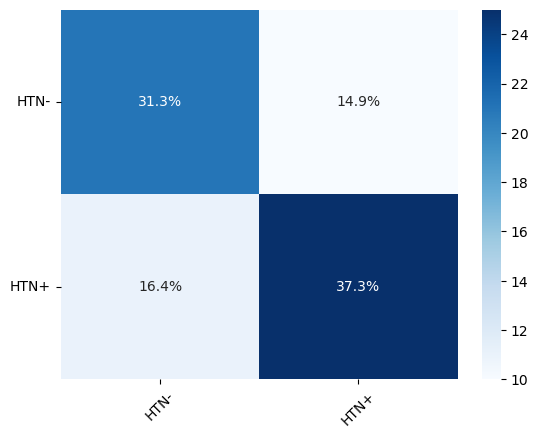

The best Acc 0.69 The best AUC 0.72 The best sensitivity 0.53 The best specificity 0.87
SEED 28 best_accc 0.69 best_aucc 0.72
FOLD enede
29 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


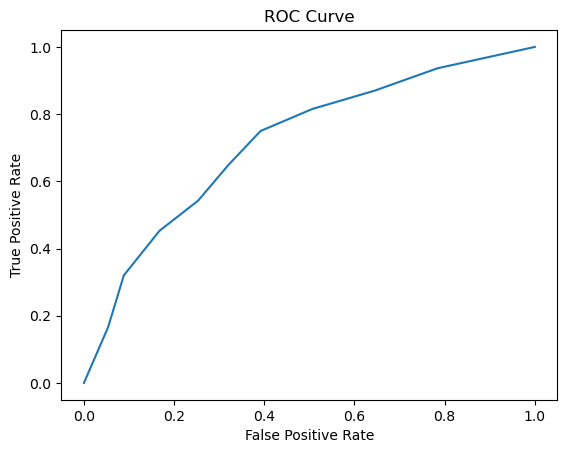

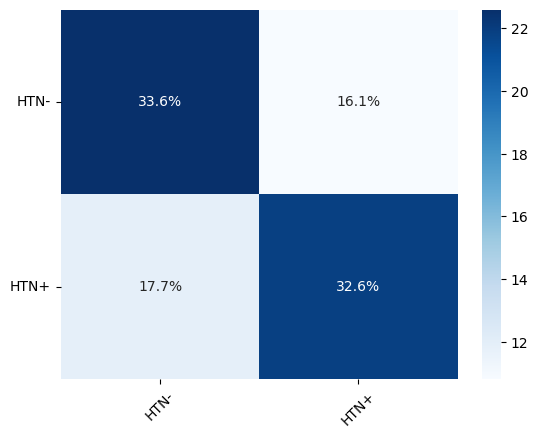

average accuracy : 0.66
average auc : 0.72
average sensitivity : 0.81
average specificity : 0.63
------------------------------
THE BEST IN ENTIRE FOLDS: 


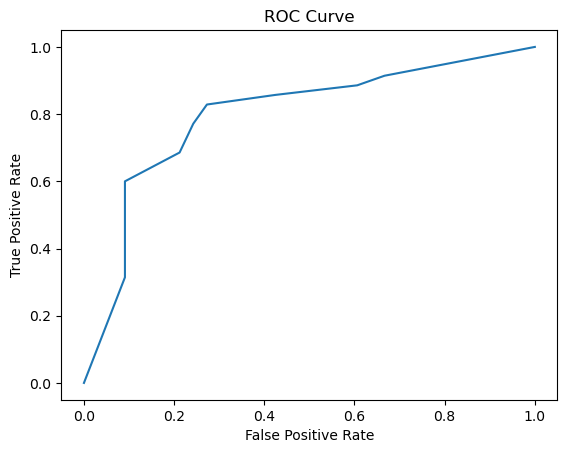

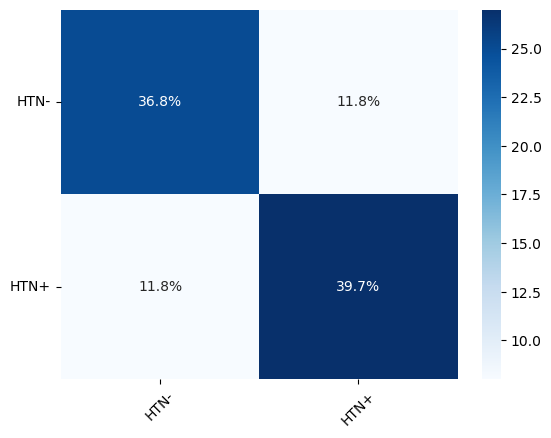

The best Acc 0.76 The best AUC 0.8 The best sensitivity 0.8 The best specificity 0.76
SEED 29 best_accc 0.76 best_aucc 0.8
FOLD enede
time for the deterined epochss min 2256.803710921605


In [35]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500

train = 0
model_type = "efficientnet_b0_aucbased"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in range(30):
                    print(SEED, "<><><><><<><><><><><><><><<><><><><><><><><><><>")
                    
                    ress = []
                    
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                      
                    if dataset_type == "60min":
                        Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")
                     
#                     if dataset_type == "9min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_9min.npy")
#                     if dataset_type == "11min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_11min.npy")
#                     if dataset_type == "12min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_12min.npy")
#                     if dataset_type == "13min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_13min.npy")
#                     if dataset_type == "14min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_14min.npy")
#                     if dataset_type == "15min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_15min.npy")


                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits = num_folds, shuffle = True, random_state = SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)

                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    # Split the remaining data into folds
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
                            fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)



                    
                    loss_list_train_folds = []
                    acc_list_train_folds = []
                    auc_list_train_folds = []

                    loss_list_test_folds = []
                    acc_list_test_folds = []
                    auc_list_test_folds = []
                            
                    for fold in range(num_folds):
                        
                        
                        save_dir = "./saved_graphs/" + model_type + "/" + dataset_type + "/" + optimzer 
                        if not os.path.exists(save_dir):
                            os.makedirs(save_dir, exist_ok=True)
                        
                        
                        
                        best_auc  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        acc_list_train = []
                        auc_list_train = []
                        
                        loss_list_test = []
                        acc_list_test = []
                        auc_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
#                                 print(">>", outputs.shape, outputs.dtype, labels.shape, labels.dtype)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                    

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)

                            new_fpr, new_tpr, auc_train, best_threshold, sensitivity, specificity = Custom_ROC(y_probs_train, y_true_train)
                            
                            loss_list_train.append(loss_epoch)
                            acc_list_train.append(accuracy_train)
                            auc_list_train.append(auc_train)

                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            
                            accuracy = accuracy_score(y_true, y_pred)


                            
                            auc = roc_auc_score(y_true, y_probs)
#                             print("auc", auc, "acc", accuracy)
                            new_fpr, new_tpr, auc_train, best_threshold, sensitivity, specificity = Custom_ROC(y_probs, y_true)
                            
                            loss_list_test.append(loss_epoch)
                            acc_list_test.append(accuracy)
                            auc_list_test.append(auc_train)
                    
                            if auc > best_auc:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_auc = auc
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])

                        loss_list_train_folds.append(loss_list_train)
                        acc_list_train_folds.append(acc_list_train)
                        auc_list_train_folds.append(auc_list_train)

                        loss_list_test_folds.append(loss_list_test)
                        acc_list_test_folds.append(acc_list_test)
                        auc_list_test_folds.append(auc_list_test)

                    print("len(loss_list_test_folds)", len(loss_list_test_folds))
#                     loss_list_train_folds = np.array(loss_list_train_folds)
                    np.save(os.path.join(save_dir, 'loss_list_train_folds.npy'), loss_list_train_folds)
#                     acc_list_train_folds = np.array(acc_list_train_folds)
                    np.save(os.path.join(save_dir, 'acc_list_train_folds.npy'), acc_list_train_folds)
#                     auc_list_train_folds = np.array(auc_list_train_folds)
                    np.save(os.path.join(save_dir, 'auc_list_train_folds.npy'), auc_list_train_folds)
#                     loss_list_test_folds = np.array(loss_list_test_folds)
                    np.save(os.path.join(save_dir, 'loss_list_test_folds.npy'), loss_list_test_folds)
#                     acc_list_test_folds = np.array(acc_list_test_folds)
                    np.save(os.path.join(save_dir, 'acc_list_test_folds.npy'), acc_list_test_folds)
#                     auc_list_test_folds = np.array(auc_list_test_folds)
                    np.save(os.path.join(save_dir, 'auc_list_test_folds.npy'), auc_list_test_folds)


                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    print("SEED",SEED, "best_accc",best_accc, "best_aucc",best_aucc)
                    np.save(location+f"{SEED}", [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)


converge test laptob

12 <><><><><<><><><><><><><><<><><><><><><><><><><>
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_aucbased_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------
len(loss_list_test_folds) 10


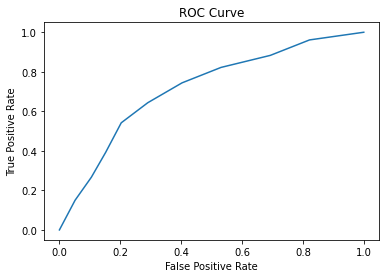

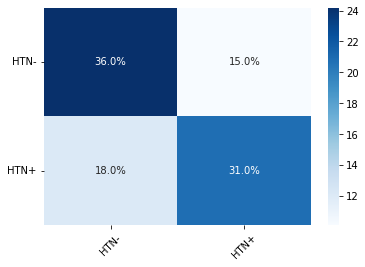

average accuracy : 0.67
average auc : 0.72
average sensitivity : 0.72
average specificity : 0.72
------------------------------
THE BEST IN ENTIRE FOLDS: 


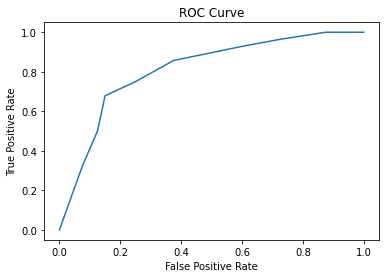

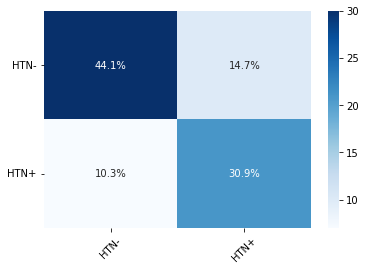

The best Acc 0.75 The best AUC 0.8 The best sensitivity 0.86 The best specificity 0.7
SEED 12 best_accc 0.75 best_aucc 0.8
FOLD enede
time for the deterined epochss min 55.670899256070456


In [15]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500

train = 0
model_type = "efficientnet_b0_aucbased"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in [12]:
                    print(SEED, "<><><><><<><><><><><><><><<><><><><><><><><><><>")
                    
                    ress = []
                    
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                      
                    if dataset_type == "60min":
                        Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")
                     
#                     if dataset_type == "9min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_9min.npy")
#                     if dataset_type == "11min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_11min.npy")
#                     if dataset_type == "12min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_12min.npy")
#                     if dataset_type == "13min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_13min.npy")
#                     if dataset_type == "14min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_14min.npy")
#                     if dataset_type == "15min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_15min.npy")


                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits = num_folds, shuffle = True, random_state = SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)

                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    # Split the remaining data into folds
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
                            fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)



                    
                    loss_list_train_folds = []
                    acc_list_train_folds = []
                    auc_list_train_folds = []

                    loss_list_test_folds = []
                    acc_list_test_folds = []
                    auc_list_test_folds = []
                            
                    for fold in range(num_folds):
                        
                        
                        save_dir = "./saved_graphs/" + model_type + "/" + dataset_type + "/" + optimzer 
                        if not os.path.exists(save_dir):
                            os.makedirs(save_dir, exist_ok=True)
                        
                        
                        
                        best_auc  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        acc_list_train = []
                        auc_list_train = []
                        
                        loss_list_test = []
                        acc_list_test = []
                        auc_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
#                                 print(">>", outputs.shape, outputs.dtype, labels.shape, labels.dtype)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                    

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)

                            new_fpr, new_tpr, auc_train, best_threshold, sensitivity, specificity = Custom_ROC(y_probs_train, y_true_train)
                            
                            loss_list_train.append(loss_epoch)
                            acc_list_train.append(accuracy_train)
                            auc_list_train.append(auc_train)

                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            
                            accuracy = accuracy_score(y_true, y_pred)


                            
                            auc = roc_auc_score(y_true, y_probs)
#                             print("auc", auc, "acc", accuracy)
                            new_fpr, new_tpr, auc_train, best_threshold, sensitivity, specificity = Custom_ROC(y_probs, y_true)
                            
                            loss_list_test.append(loss_epoch)
                            acc_list_test.append(accuracy)
                            auc_list_test.append(auc_train)
                    
                            if auc > best_auc:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_auc = auc
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])

                        loss_list_train_folds.append(loss_list_train)
                        acc_list_train_folds.append(acc_list_train)
                        auc_list_train_folds.append(auc_list_train)

                        loss_list_test_folds.append(loss_list_test)
                        acc_list_test_folds.append(acc_list_test)
                        auc_list_test_folds.append(auc_list_test)

                    print("len(loss_list_test_folds)", len(loss_list_test_folds))
#                     loss_list_train_folds = np.array(loss_list_train_folds)
                    np.save(os.path.join(save_dir, 'loss_list_train_folds.npy'), loss_list_train_folds)
#                     acc_list_train_folds = np.array(acc_list_train_folds)
                    np.save(os.path.join(save_dir, 'acc_list_train_folds.npy'), acc_list_train_folds)
#                     auc_list_train_folds = np.array(auc_list_train_folds)
                    np.save(os.path.join(save_dir, 'auc_list_train_folds.npy'), auc_list_train_folds)
#                     loss_list_test_folds = np.array(loss_list_test_folds)
                    np.save(os.path.join(save_dir, 'loss_list_test_folds.npy'), loss_list_test_folds)
#                     acc_list_test_folds = np.array(acc_list_test_folds)
                    np.save(os.path.join(save_dir, 'acc_list_test_folds.npy'), acc_list_test_folds)
#                     auc_list_test_folds = np.array(auc_list_test_folds)
                    np.save(os.path.join(save_dir, 'auc_list_test_folds.npy'), auc_list_test_folds)


                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    print("SEED",SEED, "best_accc",best_accc, "best_aucc",best_aucc)
                    np.save(location+f"{SEED}", [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)


AttributeError: 'list' object has no attribute 'shape'

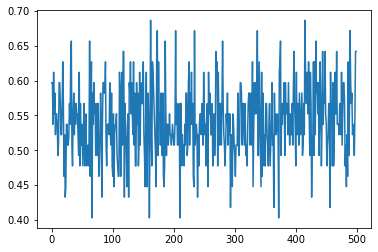

In [24]:
plt.plot(np.array(acc_list_test_folds)[9,:]).shape

In [15]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500
ress = []
train = 0
model_type = "efficientnet_b0_NO_resp_Arousal"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in range(30):
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                        Images_ = np.delete(Images_, np.s_[:2],axis=1)
                    if dataset_type == "60min":
                        Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")
                        Images_ = np.delete(Images_, np.s_[:2],axis=1)
#                     if dataset_type == "9min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_9min.npy")
#                     if dataset_type == "11min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_11min.npy")
#                     if dataset_type == "12min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_12min.npy")
#                     if dataset_type == "13min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_13min.npy")
#                     if dataset_type == "14min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_14min.npy")
#                     if dataset_type == "15min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_15min.npy")


                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)

                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    # Split the remaining data into folds
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
                            fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)



                    for fold in range(num_folds):
                        best  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        loss_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
                                print(">>", outputs.shape, outputs.dtype, labels.shape, labels.dtype)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                            loss_list_train.append(loss_epoch)

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)



                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            loss_list_test.append(loss_epoch)
                            accuracy = accuracy_score(y_true, y_pred)



                            if accuracy > best:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])




                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    np.save(location, [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)


old monto iteration

In [32]:
# log = []
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc,roc_auc_score
# from sklearn.model_selection import train_test_split
# from itertools import product

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Define the number of iterations for Monte Carlo Cross-Validation
# num_iterations = 10  # Adjust as needed

# lrr = [.01]
# milestones_list = [[70, 130, 160]]
# gamma_list = [.3]
# num_epochs = 500
# ress = []
# train = 0
# model_type = "efficientnet_b0_test"
# fold = 1

# iteration = 9

# for dataset_type in ["10min"]:
#     for optimzer in ["adam"]:
#         for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
#             t1 = time.time()
#             for perc in [10]:
#                 for SEED in np.arange(100):
#                     best = -1
#                     print("________________________________________________________")
#                     print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
#                     location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
#                     torch.manual_seed(SEED)
#                     np.random.seed(SEED)
#                     random.seed(SEED)
#                     ### data ###############################################################################################
#                     lbl = copy.deepcopy(np.array(label_nn))
#                     if dataset_type == "10min":
#                         Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
#                     if dataset_type == "60min":
#                         Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")

#                     LOW_AHI, High_AHI = 6 , 21
#                     Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

#                     lbl = lbl[Consider]
#                     Images_ = Images_[Consider]

#                     ###############################################################################

# #                     for iteration in range(num_iterations):
#                     best = -1
#                     print(f"Iteration {iteration + 1}/{num_iterations}")

#                     # Randomly split the data into train and test sets
#                     custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
#                         Images_, lbl, test_size=perc/100, random_state=SEED)

#                     Image_train, label_train = transform_array_image(custom_images_train, custom_labels_train)
#                     Image_test, label_test = transform_array_image(custom_images_test, custom_labels_test) 

#                     dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
#                     dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
#                     train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
#                     test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)

#                     model = model_load(0).to(device)

#                     criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)

#                     loss_list_train = []
#                     loss_list_test = []

#                     for epoch in range(num_epochs):
#                         loss_epoch = 0
#                         y_probs_train = []
#                         y_true_train = []
#                         y_pred_train = []


#                         ###################
#                         for images, labels in train_loader:
#                             images = images.to(device)
#                             labels = labels.float().to(device)

#                             optimizer.zero_grad()
#                             outputs = model(images)

#                             loss = criterion(outputs.squeeze(-1), labels)

#                             loss_epoch += loss.item()

#                             loss.backward()
#                             optimizer.step()

#                             predicted = (outputs.data>.5).float()
#                             y_probs_train.extend(outputs.data.cpu().numpy()) 
#                             y_true_train.extend(labels.cpu().numpy())
#                             y_pred_train.extend(predicted.cpu().numpy())


#                         loss_epoch /= len(train_loader)
#                         loss_list_train.append(loss_epoch)

#                         accuracy_train = accuracy_score(y_true_train, y_pred_train)



#                         scheduler.step()


#                         ################

#                         y_true = []
#                         y_pred = []
#                         y_probs = []

#                         loss_epoch = 0

#                         with torch.no_grad():
#                             for images, labels in test_loader:
#                                 images = images.to(device)
#                                 labels = labels.type(torch.float).to(device)


#                                 outputs = model(images)
#                                 loss = criterion(outputs.squeeze(-1), labels)
#                                 loss_epoch += loss.item()

#                                 predicted = (outputs.data > 0.5).float()
#                                 y_probs.extend(outputs.data.cpu().numpy()) 
#                                 y_true.extend(labels.cpu().numpy())
#                                 y_pred.extend(predicted.cpu().numpy())

#                         loss_epoch /= len(test_loader)
#                         loss_list_test.append(loss_epoch)
#                         accuracy = accuracy_score(y_true, y_pred)

#                         if accuracy > best:
#                             y_true_best = y_true
#                             y_pred_best = y_pred
#                             y_probs_best = y_probs

#                             best = accuracy
#                             best_SEED = SEED
#                             best_epoch = epoch
#                             best_fold = fold
                            
#                             best_s = SEED

# #                     # Evaluate misclassified data points
# #                     misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true_best, y_pred_best)) if true != pred]

# #                     # Move misclassified data points from test to train
# #                     custom_images_train = np.concatenate([custom_images_train, custom_images_test[misclassified_indices]])
# #                     custom_labels_train = np.concatenate([custom_labels_train, custom_labels_test[misclassified_indices]])

# #                     # Remove misclassified data points from test
# #                     custom_images_test = np.delete(custom_images_test, misclassified_indices, axis=0)
# #                     custom_labels_test = np.delete(custom_labels_test, misclassified_indices)


#                     print(SEED, best)
#                     new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
#                     ress.append([best_s, new_fpr, new_tpr, cf1, best, auc, best_threshold, sensitivity, specificity])

# #                 average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
# #                 np.save(location, [average_dic, best_accc, best_aucc, best_sensivity, best_specifity])

# #                 print("FOLD enede")

# #             print("time for the determined epochs min", (time.time()-t1)/60)


monto iteration

In [33]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the number of iterations for Monte Carlo Cross-Validation
num_iterations = 10  # Adjust as needed

lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500
ress = []
train = 0
model_type = "efficientnet_b0_test"
fold = 1



for dataset_type in ["10min"]:
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in np.arange(100):
                    best = -1
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                    if dataset_type == "60min":
                        Images_ = np.load("HRV_RESP_AROUSAL_ETC_60min.npy")

                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    ###############################################################################

#                     for iteration in range(num_iterations):
#                     best = -1
#                     print(f"Iteration {iteration + 1}/{num_iterations}")

                    # Randomly split the data into train and test sets
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)

                    Image_train, label_train = transform_array_image(custom_images_train, custom_labels_train)
                    Image_test, label_test = transform_array_image(custom_images_test, custom_labels_test) 

                    dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                    dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                    train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                    test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)

                    model = model_load(0).to(device)

                    criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)

                    loss_list_train = []
                    loss_list_test = []

                    for epoch in range(num_epochs):
                        loss_epoch = 0
                        y_probs_train = []
                        y_true_train = []
                        y_pred_train = []


                        ###################
                        for images, labels in train_loader:
                            images = images.to(device)
                            labels = labels.float().to(device)

                            optimizer.zero_grad()
                            outputs = model(images)

                            loss = criterion(outputs.squeeze(-1), labels)

                            loss_epoch += loss.item()

                            loss.backward()
                            optimizer.step()

                            predicted = (outputs.data>.5).float()
                            y_probs_train.extend(outputs.data.cpu().numpy()) 
                            y_true_train.extend(labels.cpu().numpy())
                            y_pred_train.extend(predicted.cpu().numpy())


                        loss_epoch /= len(train_loader)
                        loss_list_train.append(loss_epoch)

                        accuracy_train = accuracy_score(y_true_train, y_pred_train)



                        scheduler.step()


                        ################

                        y_true = []
                        y_pred = []
                        y_probs = []

                        loss_epoch = 0

                        with torch.no_grad():
                            for images, labels in test_loader:
                                images = images.to(device)
                                labels = labels.type(torch.float).to(device)


                                outputs = model(images)
                                loss = criterion(outputs.squeeze(-1), labels)
                                loss_epoch += loss.item()

                                predicted = (outputs.data > 0.5).float()
                                y_probs.extend(outputs.data.cpu().numpy()) 
                                y_true.extend(labels.cpu().numpy())
                                y_pred.extend(predicted.cpu().numpy())

                        loss_epoch /= len(test_loader)
                        loss_list_test.append(loss_epoch)
                        accuracy = accuracy_score(y_true, y_pred)

                        if accuracy > best:
                            y_true_best = y_true
                            y_pred_best = y_pred
                            y_probs_best = y_probs

                            best = accuracy
                            best_SEED = SEED
                            best_epoch = epoch
                            best_fold = fold

                            best_s = SEED


                    print(SEED, best)
                    new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                    ress.append([best_s, new_fpr, new_tpr, cf1, best, auc, best_threshold, sensitivity, specificity])
                    np.save("ress_eff_non", ress)

________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_test_10min_adam
0 0.6176470588235294
________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_test_10min_adam


KeyboardInterrupt: 

ONLY FIR augmentation  and origional data

________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_FIR_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


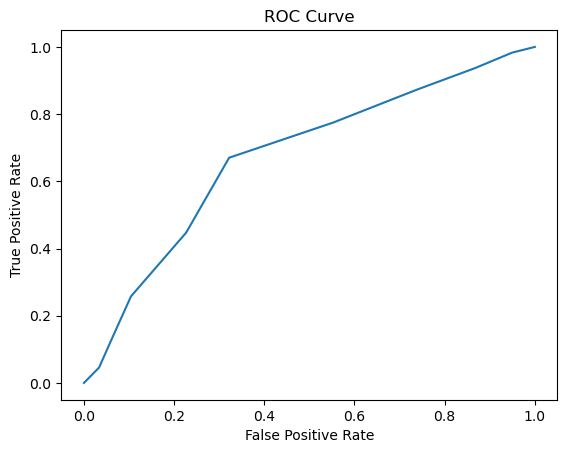

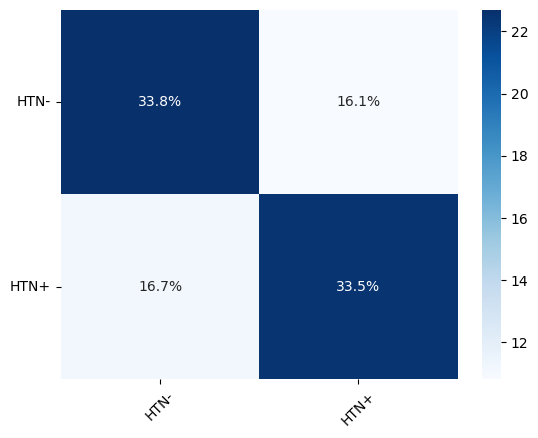

average accuracy : 0.67
average auc : 0.67
average sensitivity : 0.7
average specificity : 0.66
------------------------------
THE BEST IN ENTIRE FOLDS: 


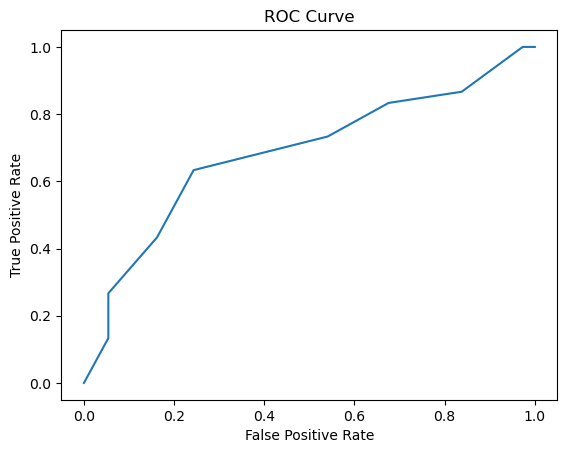

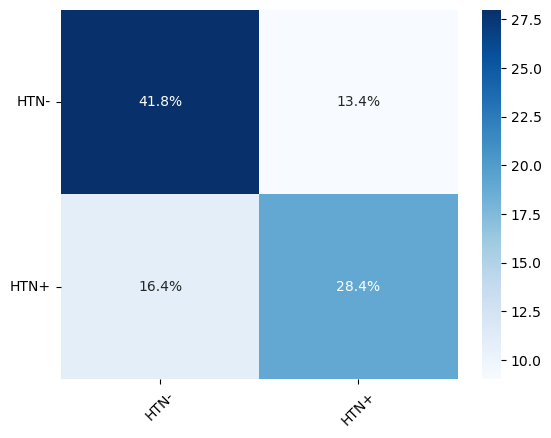

The best Acc 0.7 The best AUC 0.69 The best sensitivity 0.57 The best specificity 0.84
FOLD enede
time for the deterined epochss min 204.76702072620392


In [22]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500
ress = []
train = 0
model_type = "efficientnet_b0_FIR"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in [19]:
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                           
                    Images_FIR_1 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_18.npy")
                    Images_FIR_2 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_20.npy")
                    Images_FIR_3 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_22.npy")

                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]

                    
                    Images_FIR_1 = Images_FIR_1[Consider]
                    Images_FIR_2 = Images_FIR_2[Consider]
                    Images_FIR_3 = Images_FIR_3[Consider]
                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)
                    

                    
                    custom_images_train_FIR_1, c, custom_labels_train_FIR_1, c = train_test_split(
                        Images_FIR_1, lbl, test_size=perc/100, random_state=SEED)
                    custom_images_train_FIR_2, c, custom_labels_train_FIR_2, c = train_test_split(
                        Images_FIR_2, lbl, test_size=perc/100, random_state=SEED)
                    custom_images_train_FIR_3, c, custom_labels_train_FIR_3, c = train_test_split(
                        Images_FIR_3, lbl, test_size=perc/100, random_state=SEED)
                    
                    # Combine the custom_images_train and custom_images_train_IIR_1, IIR_2, IIR_3
                    custom_images_train = np.concatenate(
                        (custom_images_train,custom_images_train_FIR_1, custom_images_train_FIR_2, custom_images_train_FIR_3), axis=0)

                    # Combine the custom_labels_train and custom_labels_train_IIR_1, IIR_2, IIR_3
                    custom_labels_train = np.concatenate(
                        (custom_labels_train,custom_labels_train_FIR_1, custom_labels_train_FIR_2, custom_labels_train_FIR_3), axis=0)

                    
                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    
                    # Split the remaining data into folds
                    rti = []
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            rti.append(train_index)
#                             fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
#                             fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)
    
                    for kfff in range(num_folds-1):
                        fold_images_train.append(np.concatenate(
                            (Images_[rti[kfff]], Images_FIR_1[rti[kfff]], Images_FIR_2[rti[kfff]], Images_FIR_3[rti[kfff]]), axis=0))
                        fold_labels_train.append(np.concatenate(
                                    ( lbl[rti[kfff]], lbl[rti[kfff]], lbl[rti[kfff]], lbl[rti[kfff]]), axis=0))

                    



                    for fold in range(num_folds):
                        best  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        loss_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                            loss_list_train.append(loss_epoch)

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)



                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            loss_list_test.append(loss_epoch)
                            accuracy = accuracy_score(y_true, y_pred)



                            if accuracy > best:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])




                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    np.save(location, [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)


only IIR with origional data

________________________________________________________
>>>>>>>>>> EXPERIMENT efficientnet_b0_IIR_FIR_10min_adam
fold 0 -----------------------------------
fold 1 -----------------------------------
fold 2 -----------------------------------
fold 3 -----------------------------------
fold 4 -----------------------------------
fold 5 -----------------------------------
fold 6 -----------------------------------
fold 7 -----------------------------------
fold 8 -----------------------------------
fold 9 -----------------------------------


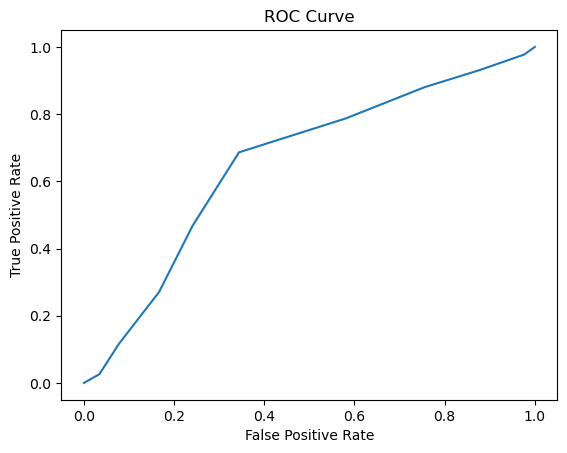

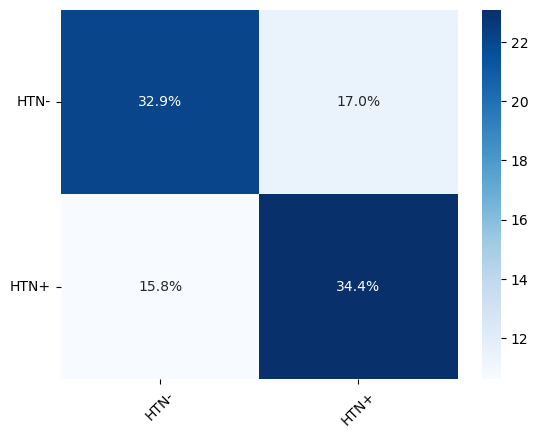

average accuracy : 0.67
average auc : 0.66
average sensitivity : 0.66
average specificity : 0.7
------------------------------
THE BEST IN ENTIRE FOLDS: 


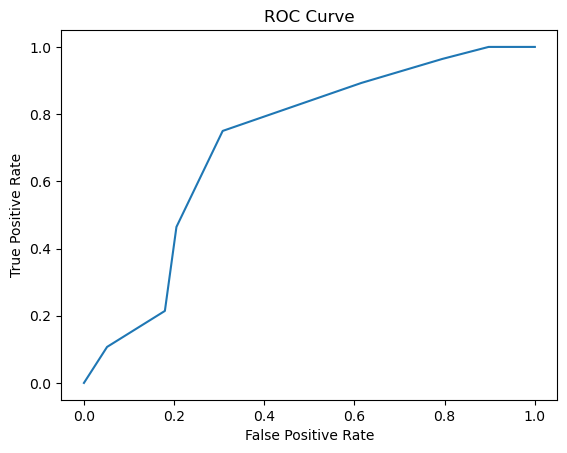

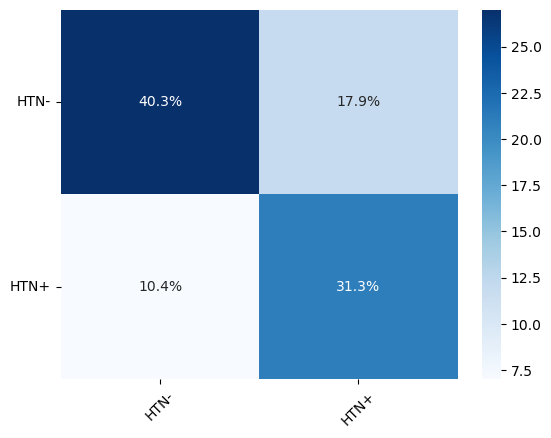

The best Acc 0.72 The best AUC 0.72 The best sensitivity 0.75 The best specificity 0.72
FOLD enede
time for the deterined epochss min 204.81118650833767


In [23]:
log = []
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from itertools import product

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define the numer of folds
num_folds = 10
lrr = [.01]
milestones_list = [[70, 130, 160]]
gamma_list = [.3]
num_epochs = 500
ress = []
train = 0
model_type = "efficientnet_b0_IIR_FIR"

for dataset_type in ["10min"]:#["9min","11min","12min","13min","14min","15min"]:#
    for optimzer in ["adam"]:
        for milestones, gamma, lr in product(milestones_list, gamma_list, lrr):
            t1 = time.time()
            for perc in [10]:
                for SEED in [19]:
                    print("________________________________________________________")
                    print(">>>>>>>>>> EXPERIMENT", model_type+"_"+dataset_type+"_"+optimzer)
                    location = "Final_experiments_models_shhs/"+ model_type+"_"+dataset_type+"_"+optimzer
                    torch.manual_seed(SEED)
                    np.random.seed(SEED)
                    random.seed(SEED)
                    ### data ###############################################################################################
                    lbl = copy.deepcopy(np.array(label_nn))
                    if dataset_type == "10min":
                        Images_ = np.load("image maker-Image_only_resp_arousal_HRV_features_10min.npy")
                        
                    Images_IIR_1 = np.load("HRV_RESP_AROUSAL_ETC_10min_IIR_order_4.npy")
                    Images_IIR_2 = np.load("HRV_RESP_AROUSAL_ETC_10min_IIR_order_6.npy")
                    Images_IIR_3 = np.load("HRV_RESP_AROUSAL_ETC_10min_IIR_order_8.npy")
                    
                    Images_FIR_1 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_18.npy")
                    Images_FIR_2 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_20.npy")
                    Images_FIR_3 = np.load("HRV_RESP_AROUSAL_ETC_10min_FIR_order_22.npy")

                    LOW_AHI, High_AHI = 6 , 21
                    Consider = Considered_AHI_restriction_2(LOW_AHI, High_AHI)

                    lbl = lbl[Consider]
                    Images_ = Images_[Consider]
                    Images_IIR_1 = Images_IIR_1[Consider]
                    Images_IIR_2 = Images_IIR_2[Consider]
                    Images_IIR_3 = Images_IIR_3[Consider]

                    ###############################################################################

                    # Crate the K__Fold object
                    kf = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

                    # Initialize lts to store the dta
                    fold_images_train = []
                    fold_images_test = []
                    fold_labels_train = []
                    fold_labels_test = []


                    # Define the custom combination for the first fold
                    custom_images_train, custom_images_test, custom_labels_train, custom_labels_test = train_test_split(
                        Images_, lbl, test_size=perc/100, random_state=SEED)
                    
                    custom_images_train_IIR_1, c, custom_labels_train_IIR_1, c = train_test_split(
                        Images_IIR_1, lbl, test_size=perc/100, random_state=SEED)
                    custom_images_train_IIR_2, c, custom_labels_train_IIR_2, c = train_test_split(
                        Images_IIR_2, lbl, test_size=perc/100, random_state=SEED)
                    custom_images_train_IIR_3, c, custom_labels_train_IIR_3, c = train_test_split(
                        Images_IIR_3, lbl, test_size=perc/100, random_state=SEED)
                    

                    
                    # Combine the custom_images_train and custom_images_train_IIR_1, IIR_2, IIR_3
                    custom_images_train = np.concatenate(
                        (custom_images_train, custom_images_train_IIR_1, custom_images_train_IIR_2, custom_images_train_IIR_3), axis=0)

                    # Combine the custom_labels_train and custom_labels_train_IIR_1, IIR_2, IIR_3
                    custom_labels_train = np.concatenate(
                        (custom_labels_train, custom_labels_train_IIR_1, custom_labels_train_IIR_2, custom_labels_train_IIR_3), axis=0)

                    
                    # Append the custom combination to the first fold
                    fold_images_train.append(custom_images_train)
                    fold_images_test.append(custom_images_test)
                    fold_labels_train.append(custom_labels_train)
                    fold_labels_test.append(custom_labels_test)


                    
                    # Split the remaining data into folds
                    rti = []
                    for train_index, test_index in kf.split(Images_):
                        if len(fold_images_train) < num_folds:
                            images_train, images_test  = Images_[train_index], Images_[test_index]
                            labels_train, labels_test  = lbl[train_index], lbl[test_index]
                            rti.append(train_index)
#                             fold_images_train.append(images_train)
                            fold_images_test.append(images_test)
#                             fold_labels_train.append(labels_train)
                            fold_labels_test.append(labels_test)
    
                    for kfff in range(num_folds-1):
                        fold_images_train.append(np.concatenate(
                            (Images_[rti[kfff]], Images_IIR_1[rti[kfff]], Images_IIR_2[rti[kfff]], Images_IIR_3[rti[kfff]]), axis=0))
                        fold_labels_train.append(np.concatenate(
                                    (lbl[rti[kfff]], lbl[rti[kfff]], lbl[rti[kfff]], lbl[rti[kfff]]), axis=0))

                    



                    for fold in range(num_folds):
                        best  = -1
                        print("fold", fold, "-----------------------------------")
                        # Accessing a specific fold
                        images_train = np.array(fold_images_train[fold])
                        images_test = np.array(fold_images_test[fold])
                        labels_train = np.array(fold_labels_train[fold])
                        labels_test = np.array(fold_labels_test[fold])


                        Image_train, label_train = transform_array_image(images_train, labels_train)
                        Image_test, label_test = transform_array_image(images_test, labels_test) 

                        # Convert the list of images and labels to a Pytorch dataset
                        dataset_train = torch.utils.data.TensorDataset(torch.stack(Image_train), torch.LongTensor(label_train))
                        dataset_test = torch.utils.data.TensorDataset(torch.stack(Image_test), torch.LongTensor(label_test))
                        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False)
                        ########################
                        model = model_load(train)
            #           ########################


                        criterion, optimizer, scheduler = criterian_optimizer(lr, milestones, gamma, optimzer)


                        loss_list_train = []
                        loss_list_test = []

                        # accuracy test:
                        for epoch in range(num_epochs):
                            loss_epoch = 0
                            y_probs_train = []
                            y_true_train = []
                            y_pred_train = []
        #                         model.train()
                            for images, labels in train_loader:
                                images = images.to(device)
                                labels = labels.float().to(device)

                                optimizer.zero_grad()
                                outputs = model(images)
                                loss = criterion(outputs.squeeze(-1), labels)

                                loss_epoch += loss.item()

                                loss.backward()
                                optimizer.step()

                                predicted = (outputs.data>.5).float()
                                y_probs_train.extend(outputs.data.cpu().numpy()) 
                                y_true_train.extend(labels.cpu().numpy())
                                y_pred_train.extend(predicted.cpu().numpy())


                            loss_epoch /= len(train_loader)
                            loss_list_train.append(loss_epoch)

                            accuracy_train = accuracy_score(y_true_train, y_pred_train)



                            scheduler.step()


                            y_true = []
                            y_pred = []
                            y_probs = []

                            loss_epoch = 0
        #                         model.eval()
                            with torch.no_grad():
                                for images, labels in test_loader:
                                    images = images.to(device)
                                    labels = labels.float().to(device)

                                    outputs = model(images)
                                    loss = criterion(outputs.squeeze(-1), labels)
                                    loss_epoch += loss.item()

                                    predicted = (outputs.data>.5).float()
                                    y_probs.extend(outputs.data.cpu().numpy()) 
                                    y_true.extend(labels.cpu().numpy())
                                    y_pred.extend(predicted.cpu().numpy())


                            loss_epoch /= len(test_loader)
                            loss_list_test.append(loss_epoch)
                            accuracy = accuracy_score(y_true, y_pred)



                            if accuracy > best:

                                y_true_best = y_true
                                y_pred_best = y_pred
                                y_probs_best = y_probs

                                best = accuracy
                                best_SEED = SEED
                                best_epoch = epoch
                                best_fold = fold

                        new_fpr, new_tpr, cf1, auc, best_threshold, sensitivity, specificity = Confusion_pic(y_true_best, y_pred_best, y_probs_best)
                        ress.append([new_fpr, new_tpr, cf1 , best, auc, best_threshold, sensitivity, specificity])




                    average_dic, best_accc, best_aucc, best_sensivity, best_specifity = ress_averaging(ress, location)
                    np.save(location, [average_dic, best_accc, best_aucc,best_sensivity, best_specifity])

                    print("FOLD enede")

            print("time for the deterined epochss min", (time.time()-t1)/60)
